# Exploratory Data Analysis

A company can experience rapid growth by understanding its customers' personalities, allowing it to provide better services and benefits to potential loyal customers. By analyzing historical marketing campaign data, the company can enhance its performance and **target the right customers** to encourage transactions on its platform. The focus of this data insight is to **create a predictive clustering model**, which will assist the company in making informed decisions.

# Data

Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

This dataset consist of customer's information, number of products brought in last 2 years, customer's respond on campaigns, and where they purchase the products.

Variable Information:
1. Customer's Information:
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income 
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - DT_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

2. Products:
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spnt on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years

3. Promotion:
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
    - AcceptedCmp2: 1 if customer acceptedthe offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Place:
    - NumwebPurchases: Number of purchases made through the company's website
    - NumCatalogPurchases: Number of purchases made using a catalogue (e.g. order directly from the catalogue via email or phone)
    - NumeStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company's website in the last month

**Target:** <br>
Need to perform clustering to summarize customer segments.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'C:\Users\aldiv\Downloads\CV\CV\Portofolio Data Science\Mini Project 3 Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning\marketing_campaign_data.csv')
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.head()


ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
tanggal_terbaru = max(df['Dt_Customer'])
tanggal_terlama = min(df['Dt_Customer'])
print(f"The newest customer's enrollment date: {tanggal_terbaru}")
print(f"The oldest customer's enrollment date: {tanggal_terlama}")

The newest customer's enrollment date: 2014-06-29 00:00:00
The oldest customer's enrollment date: 2012-07-30 00:00:00


In [5]:
# Change Dt_Customer to datetime
def feat_to_datetime(df):
    df['Enroll_day'] = df['Dt_Customer'].dt.day
    df['Enroll_month'] = df['Dt_Customer'].dt.month
    df['Enroll_year'] = df['Dt_Customer'].dt.year
    max_enrollment_date = df['Dt_Customer'].max()
    df['Enroll_tenure (days)'] = (max_enrollment_date - df['Dt_Customer']).dt.days

    return df
df = feat_to_datetime(df)

# Statistical Analysis

In [6]:
df.describe(include='all')

ID   Year_Birth Education Marital_Status        Income  \
count    2240.000000  2240.000000      2240           2240  2.216000e+03   
unique           NaN          NaN         5              6           NaN   
top              NaN          NaN        S1        Menikah           NaN   
freq             NaN          NaN      1127            864           NaN   
mean     5592.159821  1968.805804       NaN            NaN  5.224725e+07   
min         0.000000  1893.000000       NaN            NaN  1.730000e+06   
25%      2828.250000  1959.000000       NaN            NaN  3.530300e+07   
50%      5458.500000  1970.000000       NaN            NaN  5.138150e+07   
75%      8427.750000  1977.000000       NaN            NaN  6.852200e+07   
max     11191.000000  1996.000000       NaN            NaN  6.666660e+08   
std      3246.662198    11.984069       NaN            NaN  2.517308e+07   

            Kidhome     Teenhome                    Dt_Customer      Recency  \
count   2240.000000  2240.000000                           2240  2240.000000   
unique          NaN          NaN                            NaN          NaN   
top             NaN          NaN                            NaN          NaN   
freq            NaN          NaN                            NaN          NaN   
mean       0.444196     0.506250  2013-07-10 10:01:42.857142784    49.109375   
min        0.000000     0.000000            2012-07-30 00:00:00     0.000000   
25%        0.000000     0.000000            2013-01-16 00:00:00    24.000000   
50%        0.000000     0.000000            2013-07-08 12:00:00    49.000000   
75%        1.000000     1.000000            2013-12-30 06:00:00    74.000000   
max        2.000000     2.000000            2014-06-29 00:00:00    99.000000   
std        0.538398     0.544538                            NaN    28.962453   

             MntCoke      MntFruits  MntMeatProducts  MntFishProducts  \
count   2.240000e+03    2240.000000     2.240000e+03      2240.000000   
unique           NaN            NaN              NaN              NaN   
top              NaN            NaN              NaN              NaN   
freq             NaN            NaN              NaN              NaN   
mean    3.039357e+05   26302.232143     1.669500e+05     37525.446429   
min     0.000000e+00       0.000000     0.000000e+00         0.000000   
25%     2.375000e+04    1000.000000     1.600000e+04      3000.000000   
50%     1.735000e+05    8000.000000     6.700000e+04     12000.000000   
75%     5.042500e+05   33000.000000     2.320000e+05     50000.000000   
max     1.493000e+06  199000.000000     1.725000e+06    259000.000000   
std     3.365974e+05   39773.433765     2.257154e+05     54628.979403   

        MntSweetProducts   MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count        2240.000000    2240.000000        2240.000000      2240.000000   
unique               NaN            NaN                NaN              NaN   
top                  NaN            NaN                NaN              NaN   
freq                 NaN            NaN                NaN              NaN   
mean        27062.946429   44021.875000           2.325000         4.084821   
min             0.000000       0.000000           0.000000         0.000000   
25%          1000.000000    9000.000000           1.000000         2.000000   
50%          8000.000000   24000.000000           2.000000         4.000000   
75%         33000.000000   56000.000000           3.000000         6.000000   
max        263000.000000  362000.000000          15.000000        27.000000   
std         41280.498488   52167.438915           1.932238         2.778714   

        NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count           2240.000000        2240.000000        2240.000000   
unique                  NaN                NaN                NaN   
top                     NaN                NaN                NaN   
freq                    NaN               

In [7]:
print(df['Z_CostContact'].value_counts())
print(df['Z_Revenue'].value_counts())

Z_CostContact
3    2240
Name: count, dtype: int64
Z_Revenue
11    2240
Name: count, dtype: int64


**Findings:**
- **Income is right-skewed**, as evidenced by the mean being higher than the median. Additionally, the maximum value is significantly higher than the others, indicating that most individuals have middle incomes, while a few possess high incomes.
- The spending on MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProducts also shows a **right skew, with some extreme values**. This is reflected in their mean values being higher than their medians, and their standard deviations vary widely (mostly high). This suggests that the number of products purchased by customers varies greatly across each product category.
- Both **Z_CostContact** and **Z_Revenue** contain only **one unique value** and will be dropped from the analysis, as they do not provide sufficient information for machine learning.

# Univariate Analysis


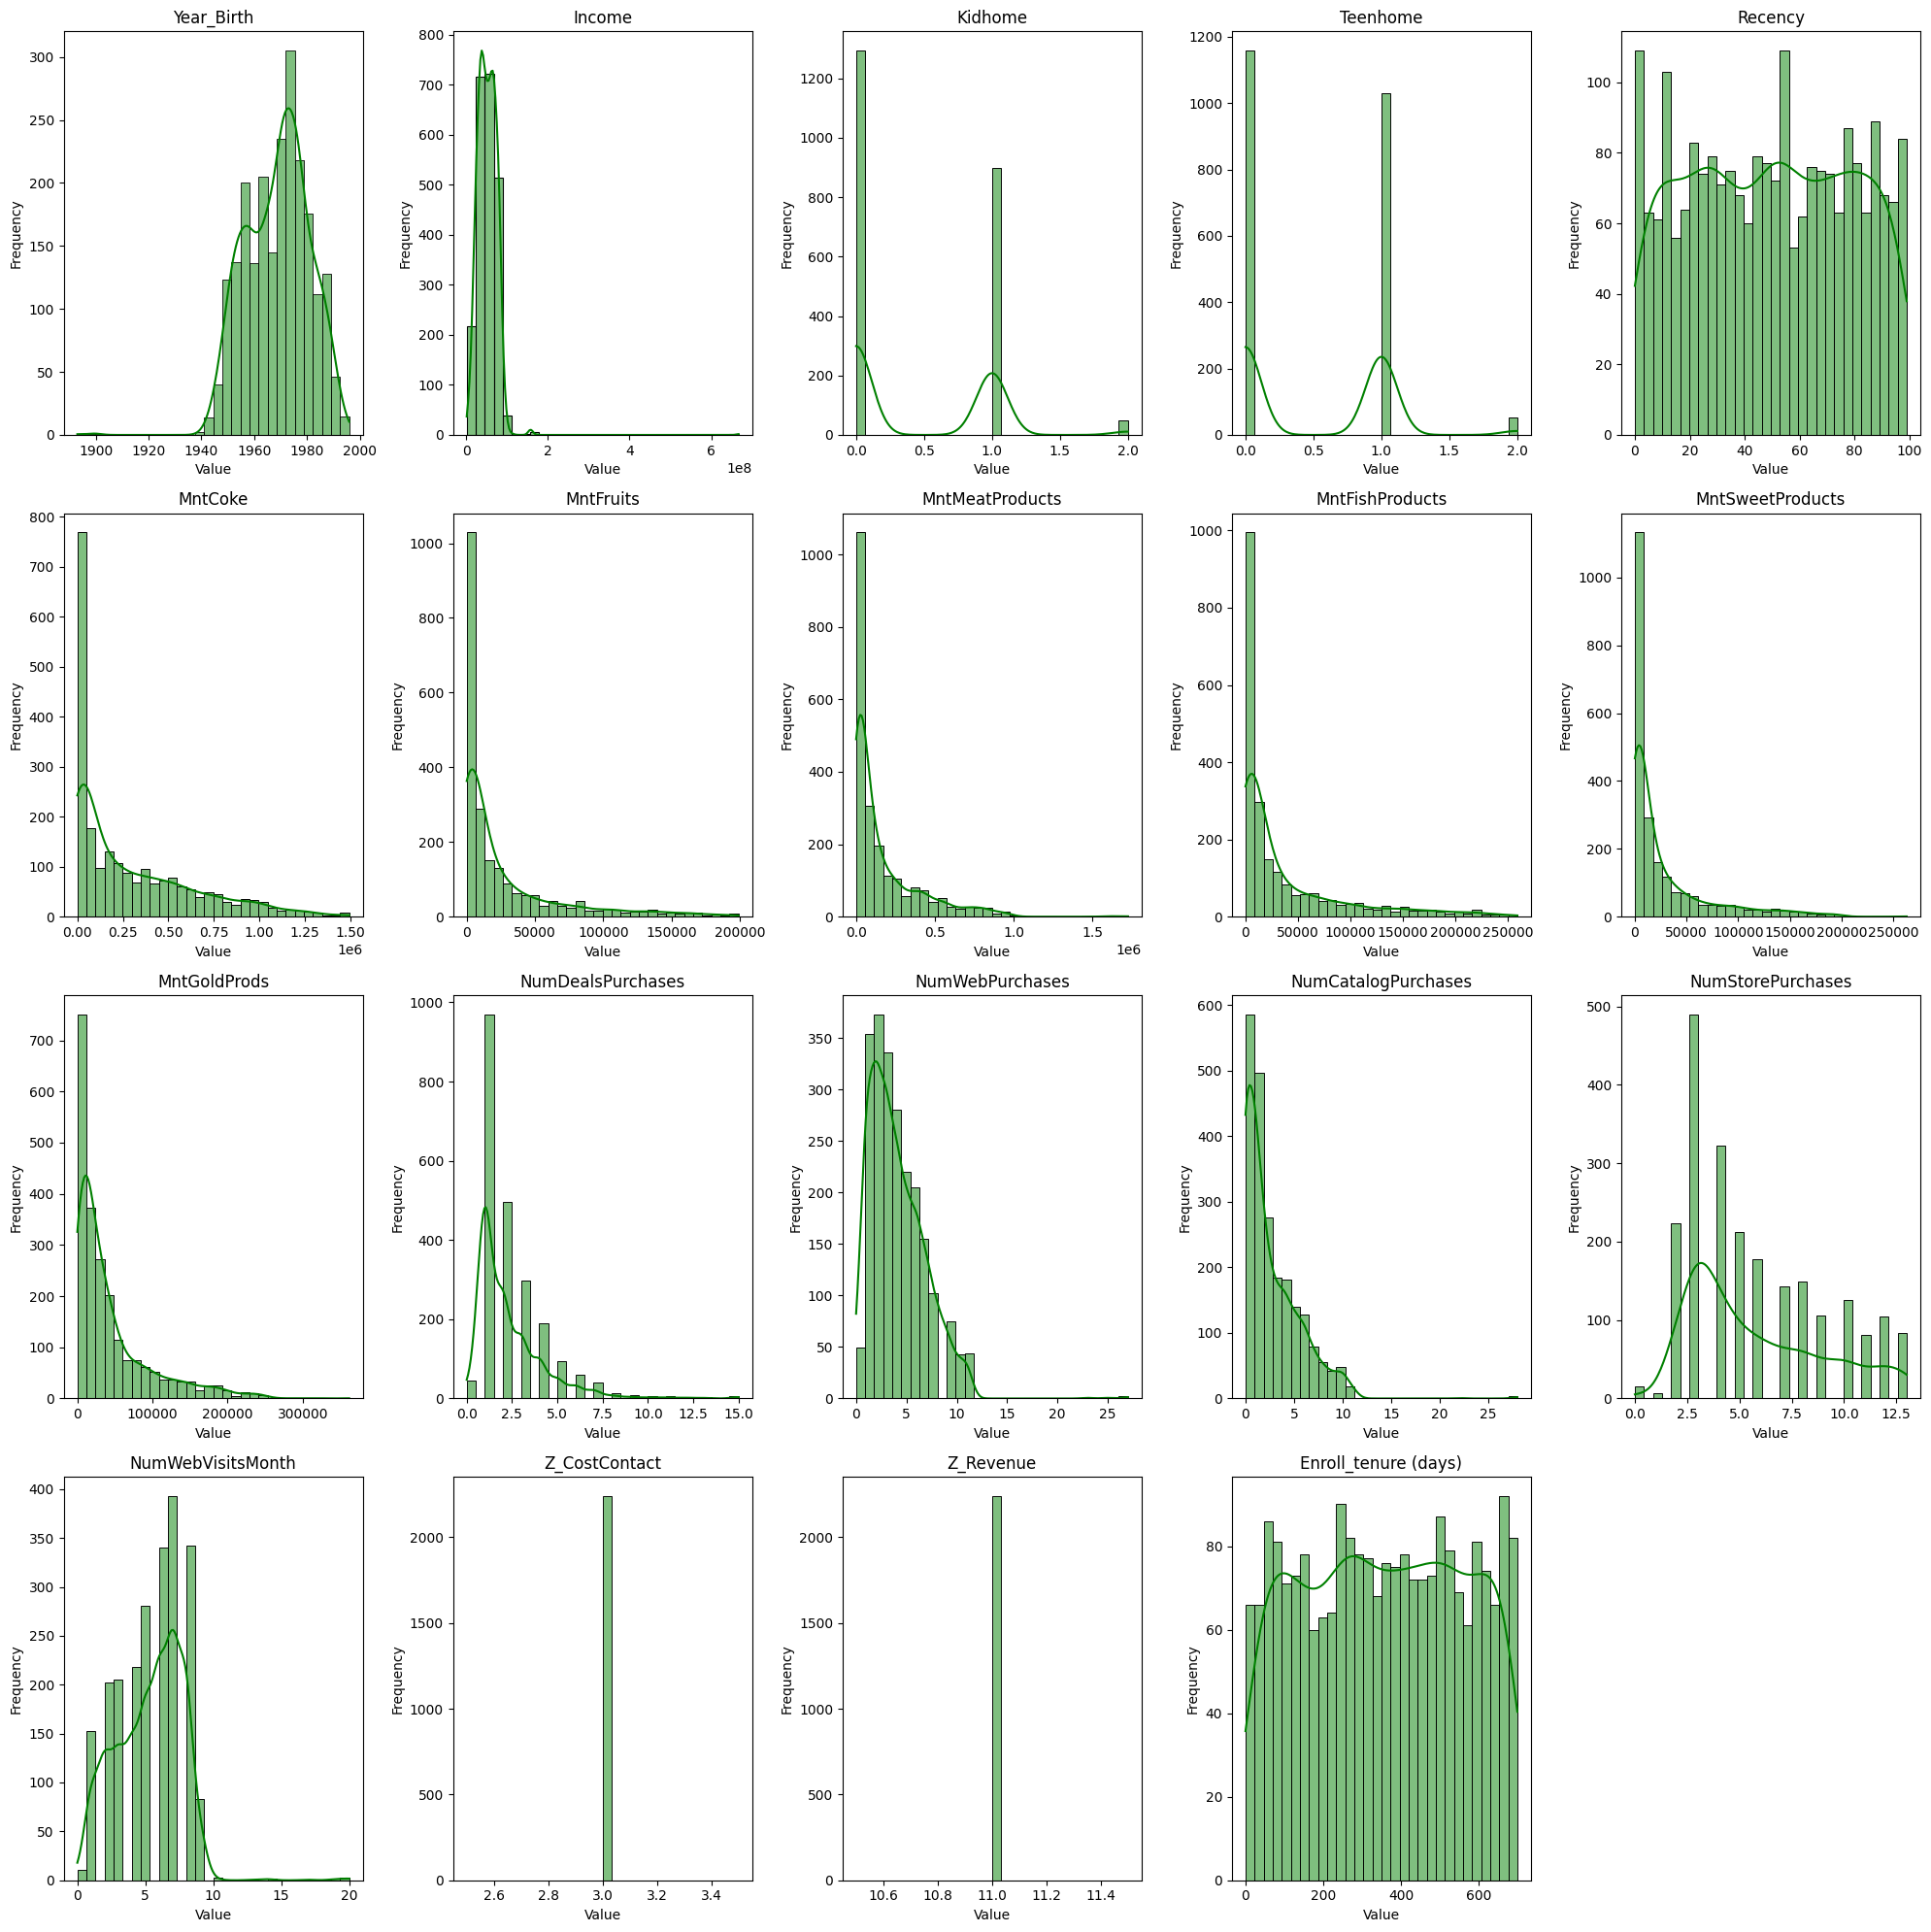

In [8]:
%matplotlib inline
df_univ = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'], axis=1)
numerical_cols = df_univ.select_dtypes(['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_univ[col], bins=30, kde=True, color='green')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout() 
plt.savefig('Histogram univariate analysis.png', dpi=300, bbox_inches='tight')

plt.show()

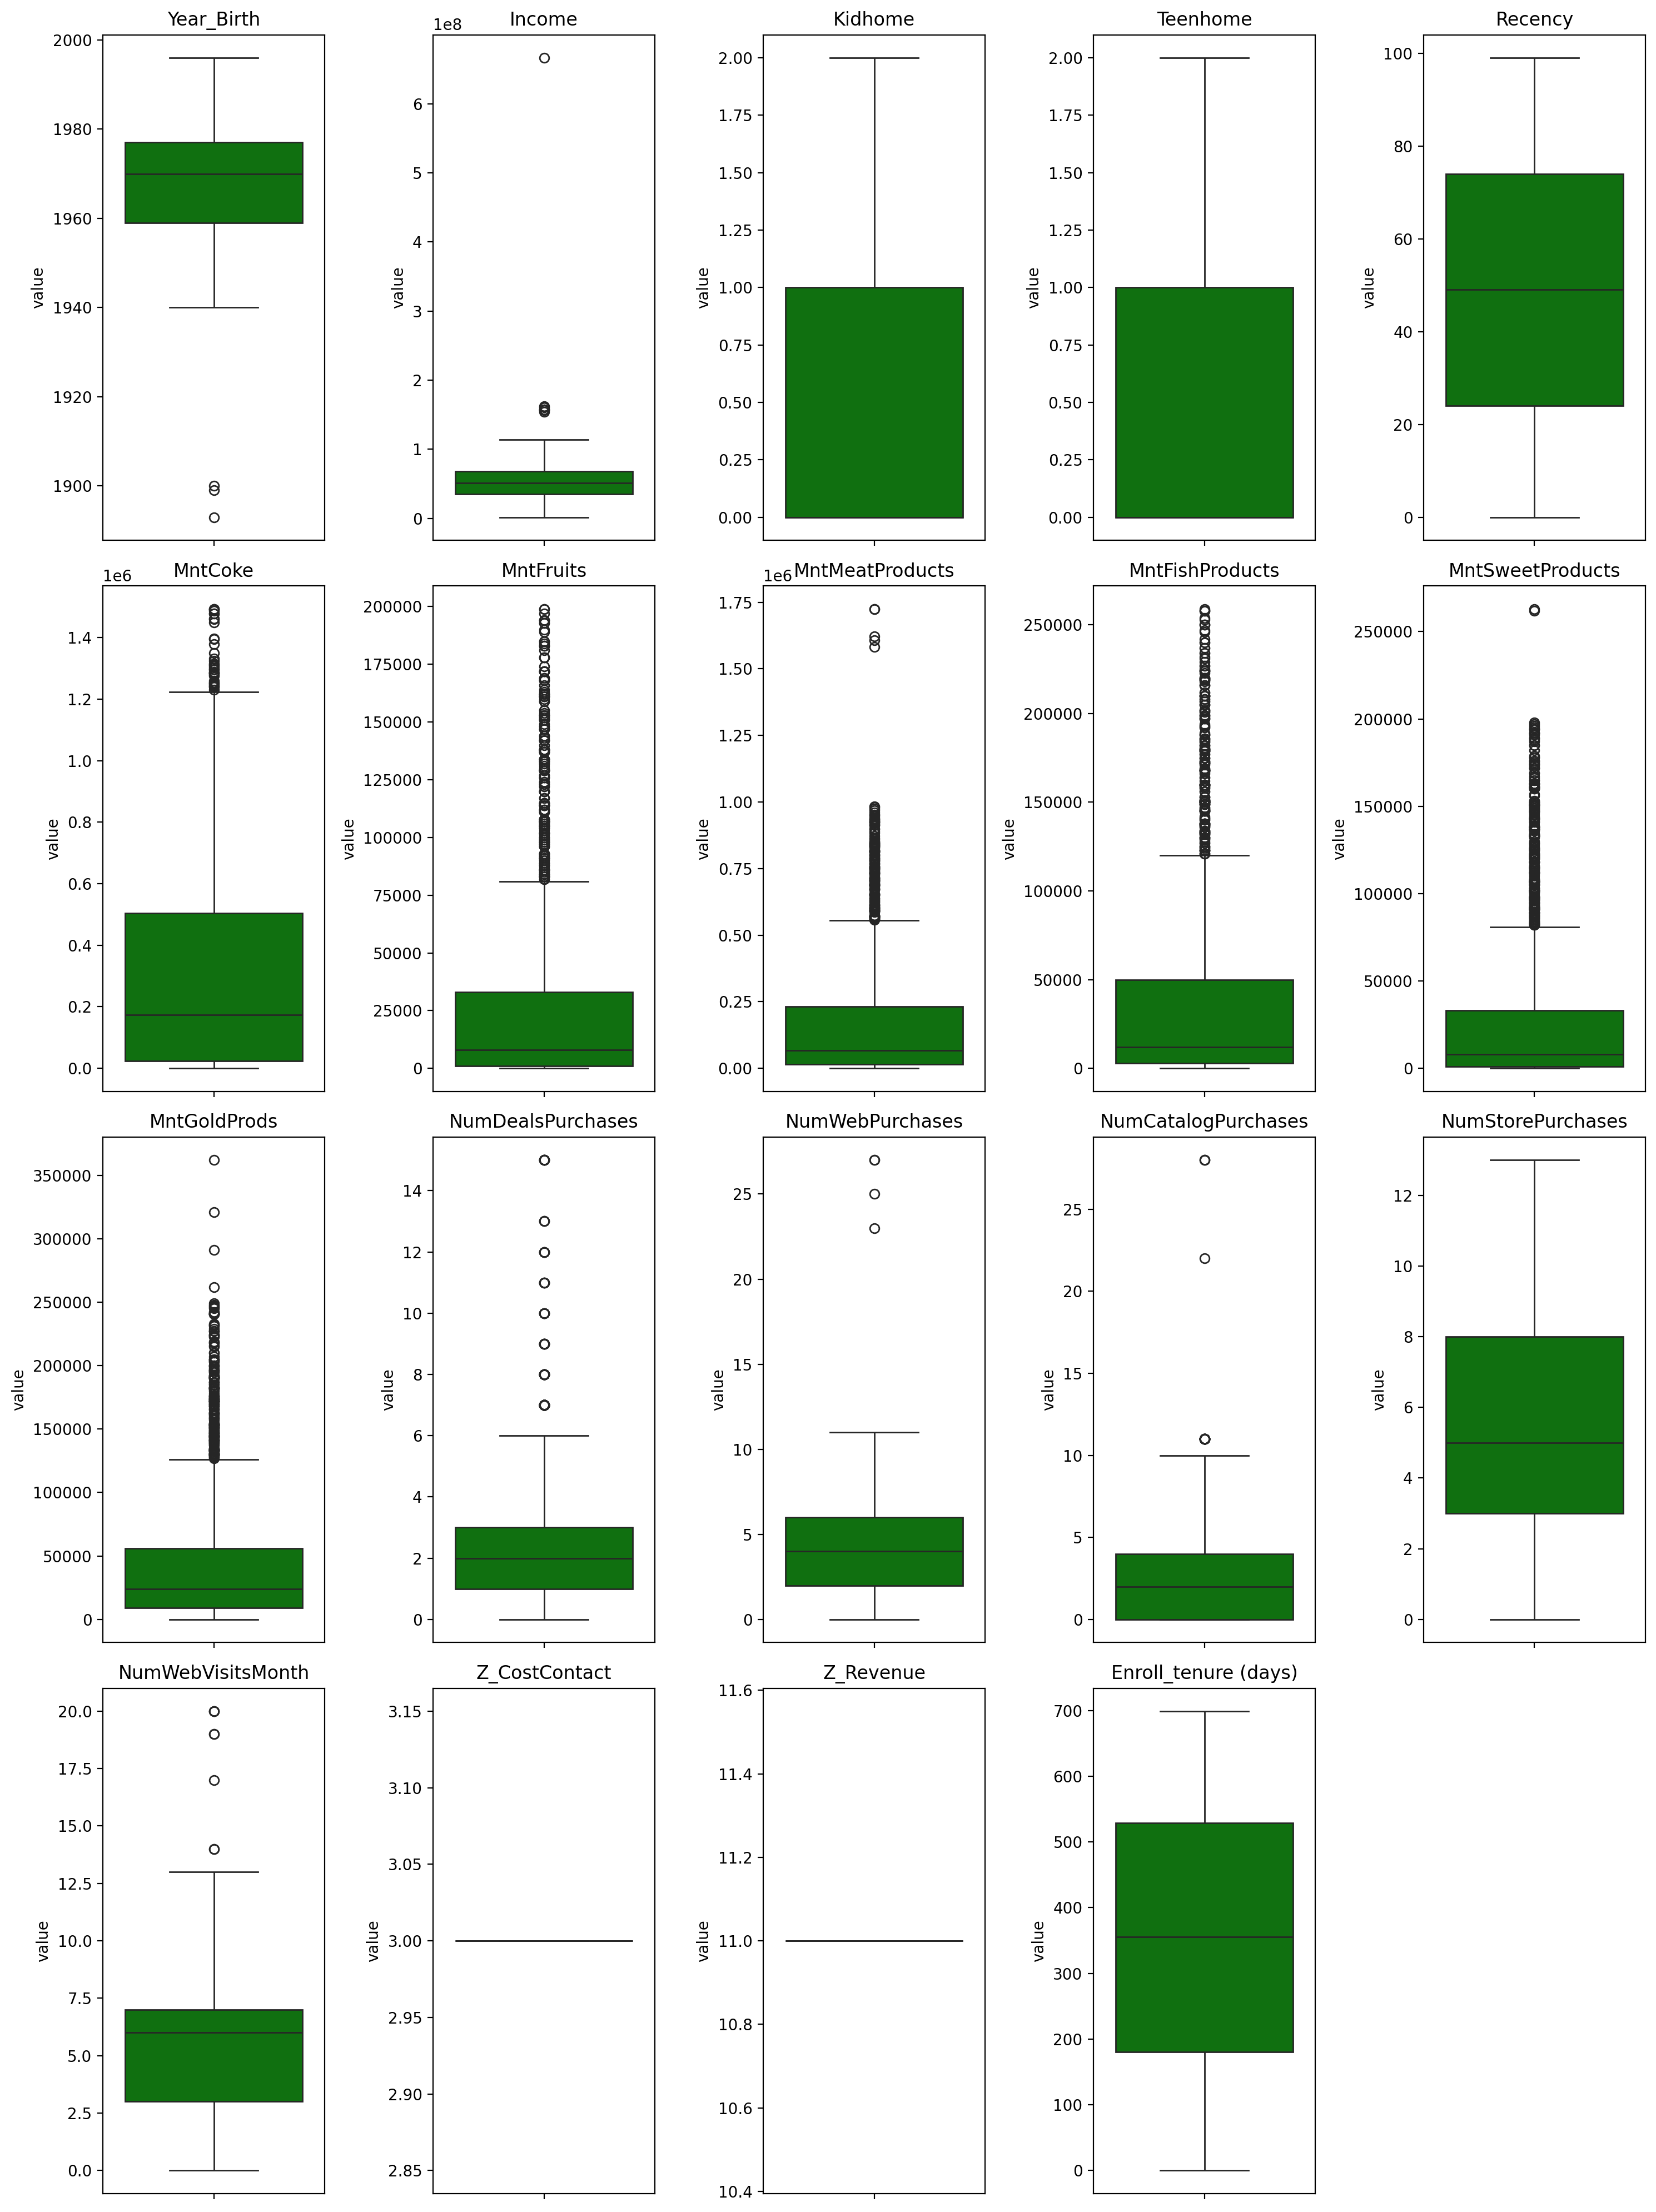

In [9]:
%matplotlib inline
df_univ = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'], axis=1)
numerical_cols = df_univ.select_dtypes(['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)

plt.figure(figsize=(15, num_rows * 5), dpi=200)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_univ[col], color='green')
    plt.title(col)
    plt.ylabel('value')
    plt.tight_layout() 
plt.savefig('Boxplot univariate analysis.png', dpi=300, bbox_inches='tight')

plt.show()

**Findings:**

- Some features exhibit **upper outliers**, particularly the **Income variable**, which shows **extreme outliers**. This warrants further analysis to determine whether these income levels are anomalies or indicative of a specific customer segment.
- The number of **product purchases tends to be lower overall**, although some individuals exhibit significantly higher purchase counts. This suggests that while the majority of customers may engage minimally, there exists a subset of high-value customers who contribute disproportionately to total sales.
- The distribution of spending across different product categories reveals **varying patterns**. For instance, categories like MntFruits and MntFishProducts show a concentration of spending among a few customers, indicating potential opportunities for targeted marketing strategies aimed at these **high-spending individuals**.
- Additionally, the Recency feature indicates that a significant portion of customers have not made recent purchases. This could imply a need for re-engagement strategies to encourage repeat transactions from these customers.
- The analysis of NumWebPurchases and NumStorePurchases shows discrepancies in purchasing behavior between online and offline channels. Understanding these differences can help refine channel-specific marketing approaches.
- The presence of outliers in the NumDealsPurchases suggests that certain customers are highly responsive to promotional campaigns, which could inform future promotional strategies and customer segmentation efforts.

In [10]:
df_countplot = df.copy()
columns_to_category = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

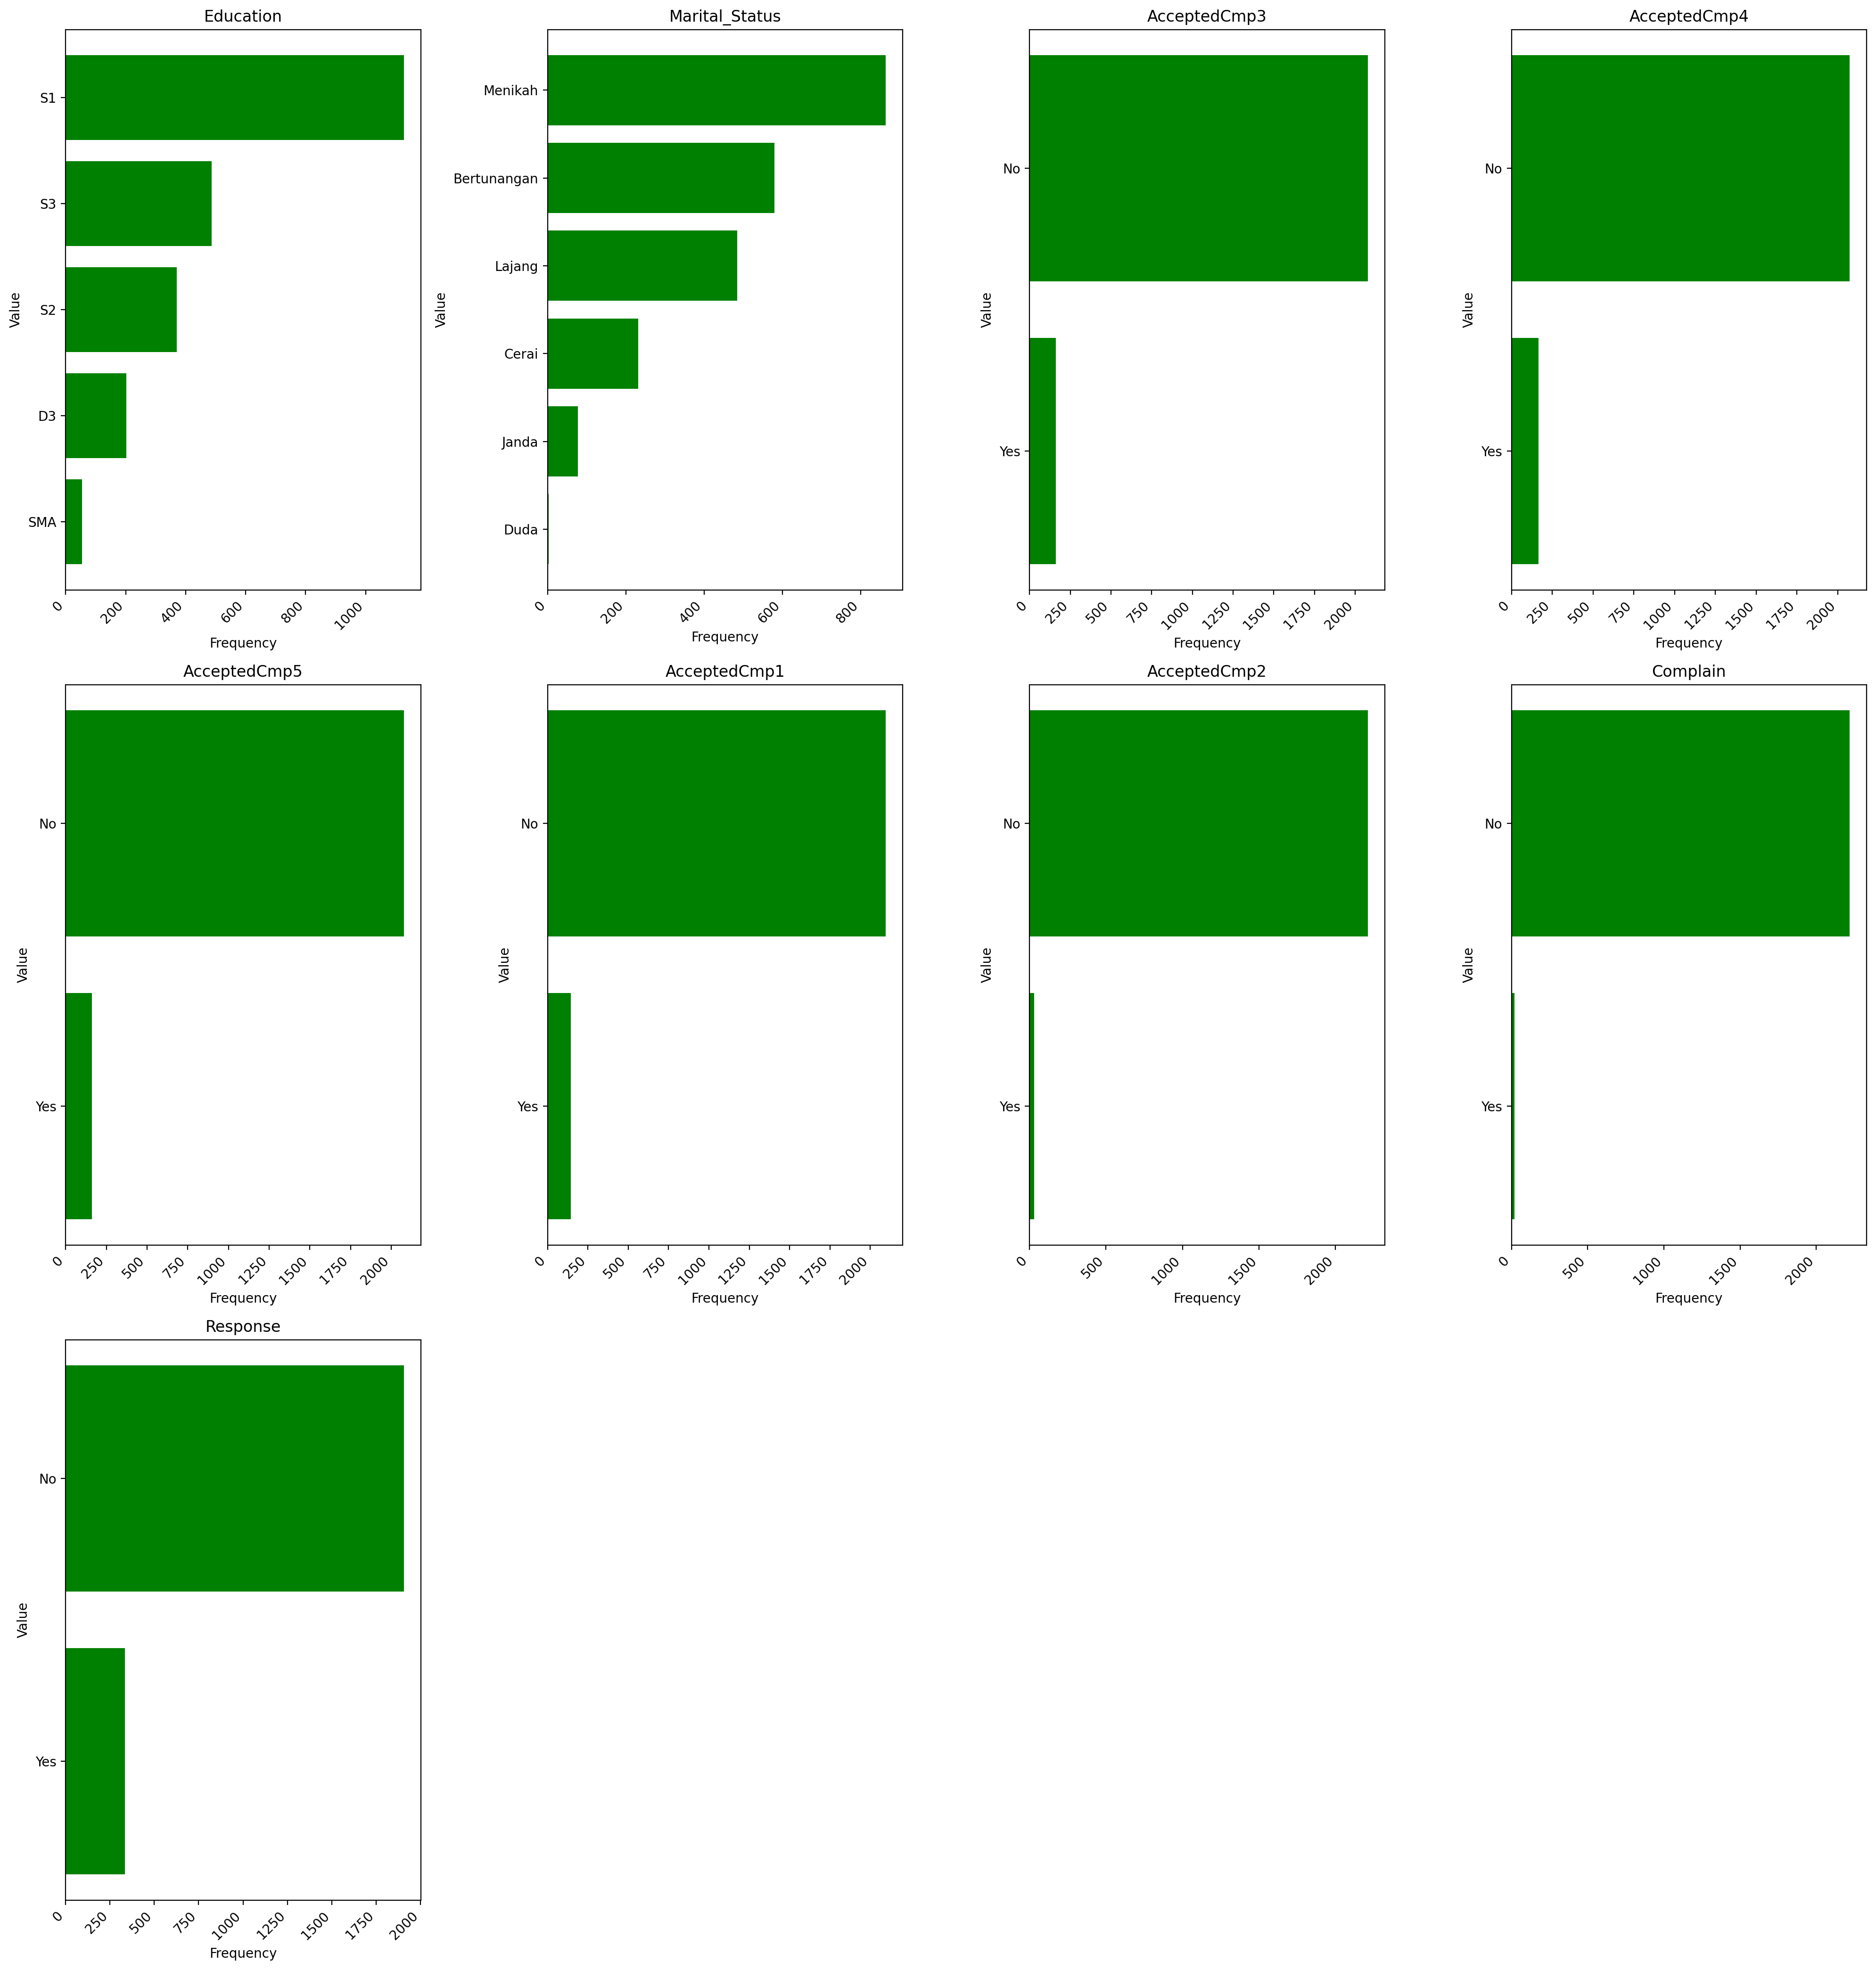

In [11]:
%matplotlib inline
df_countplot = df.copy()
df_countplot.drop(columns='Dt_Customer', axis=1, inplace=True)
columns_to_category = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

for columns in columns_to_category:
        df_countplot[columns] = df_countplot[columns].map({0: 'No', 1: 'Yes'})

categorical_cols = df_countplot.select_dtypes(['object']).columns
num_cols = 4
num_rows = (len(categorical_cols) // num_cols) + (len(categorical_cols) % num_cols > 0)

plt.figure(figsize=(20, num_rows * 7), dpi=200)

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    value_counts = df_countplot[col].value_counts(ascending=True)
    plt.barh(value_counts.index, value_counts.values, color='green')
    plt.title(col)
    plt.xlabel('Frequency')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() 
plt.savefig('Countplot univariate analysis.png', dpi=300, bbox_inches='tight')

plt.show()

**Findings:**
- The majority of customers have a **bachelor's degree (S1)**, followed by those with a diploma (D3) and high school (SMA). This suggests that the customer base is relatively well-educated, which may influence their purchasing behavior and responsiveness to marketing campaigns.
- The largest group of customers is **married**, followed by those in a relationship. There are fewer customers who are single, divorced, or widowed. This demographic insight could help tailor marketing strategies to appeal to family-oriented customers.
- The **acceptance rates for campaigns** (AcceptedCmp1 to AcceptedCmp5) show a consistent trend, with the **overwhelming majority** of customers **not accepting** these campaigns. This indicates a potential gap in the effectiveness of marketing strategies, suggesting the need for more targeted or appealing offers.
- The **complaint rate is very low**, indicating that most customers **do not express dissatisfaction** with the services or products. This is a positive sign for customer satisfaction, but it may also suggest a lack of engagement if customers are not providing feedback.
- Similar to the campaign acceptance, **the response to marketing efforts is predominantly negative**, with most customers indicating "No." This highlights a significant opportunity for improvement in marketing strategies to increase engagement and conversion rates.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2240 non-null   int64         
 1   Year_Birth            2240 non-null   int64         
 2   Education             2240 non-null   object        
 3   Marital_Status        2240 non-null   object        
 4   Income                2216 non-null   float64       
 5   Kidhome               2240 non-null   int64         
 6   Teenhome              2240 non-null   int64         
 7   Dt_Customer           2240 non-null   datetime64[ns]
 8   Recency               2240 non-null   int64         
 9   MntCoke               2240 non-null   int64         
 10  MntFruits             2240 non-null   int64         
 11  MntMeatProducts       2240 non-null   int64         
 12  MntFishProducts       2240 non-null   int64         
 13  MntSweetProducts  

## Age Distribution

In [13]:
df['Age'] = 2014 - df['Year_Birth']

In [14]:
pd.set_option('Display.max_rows', None)
df['Age'].nlargest(10)

239     121
339     115
192     114
1950     74
424      73
39       71
358      71
415      71
894      71
1150     71
Name: Age, dtype: int64

Judging by the newest customer enrollment date on 2014, we extracted the "Age" of customers based on their "birth year" in 2014. we found anomalies where the age is around +120 years old. Human mostly live around 60 years old, some of them can live up to 80 but rarely live more than 100 years old, so we will drop the data with age more than 100 years old.

In [15]:
df_age = df.drop(df[df['Age'].isin(df['Age'].nlargest(3))].index)
df_age['Age'].describe()

count    2237.000000
mean       45.098346
std        11.701917
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

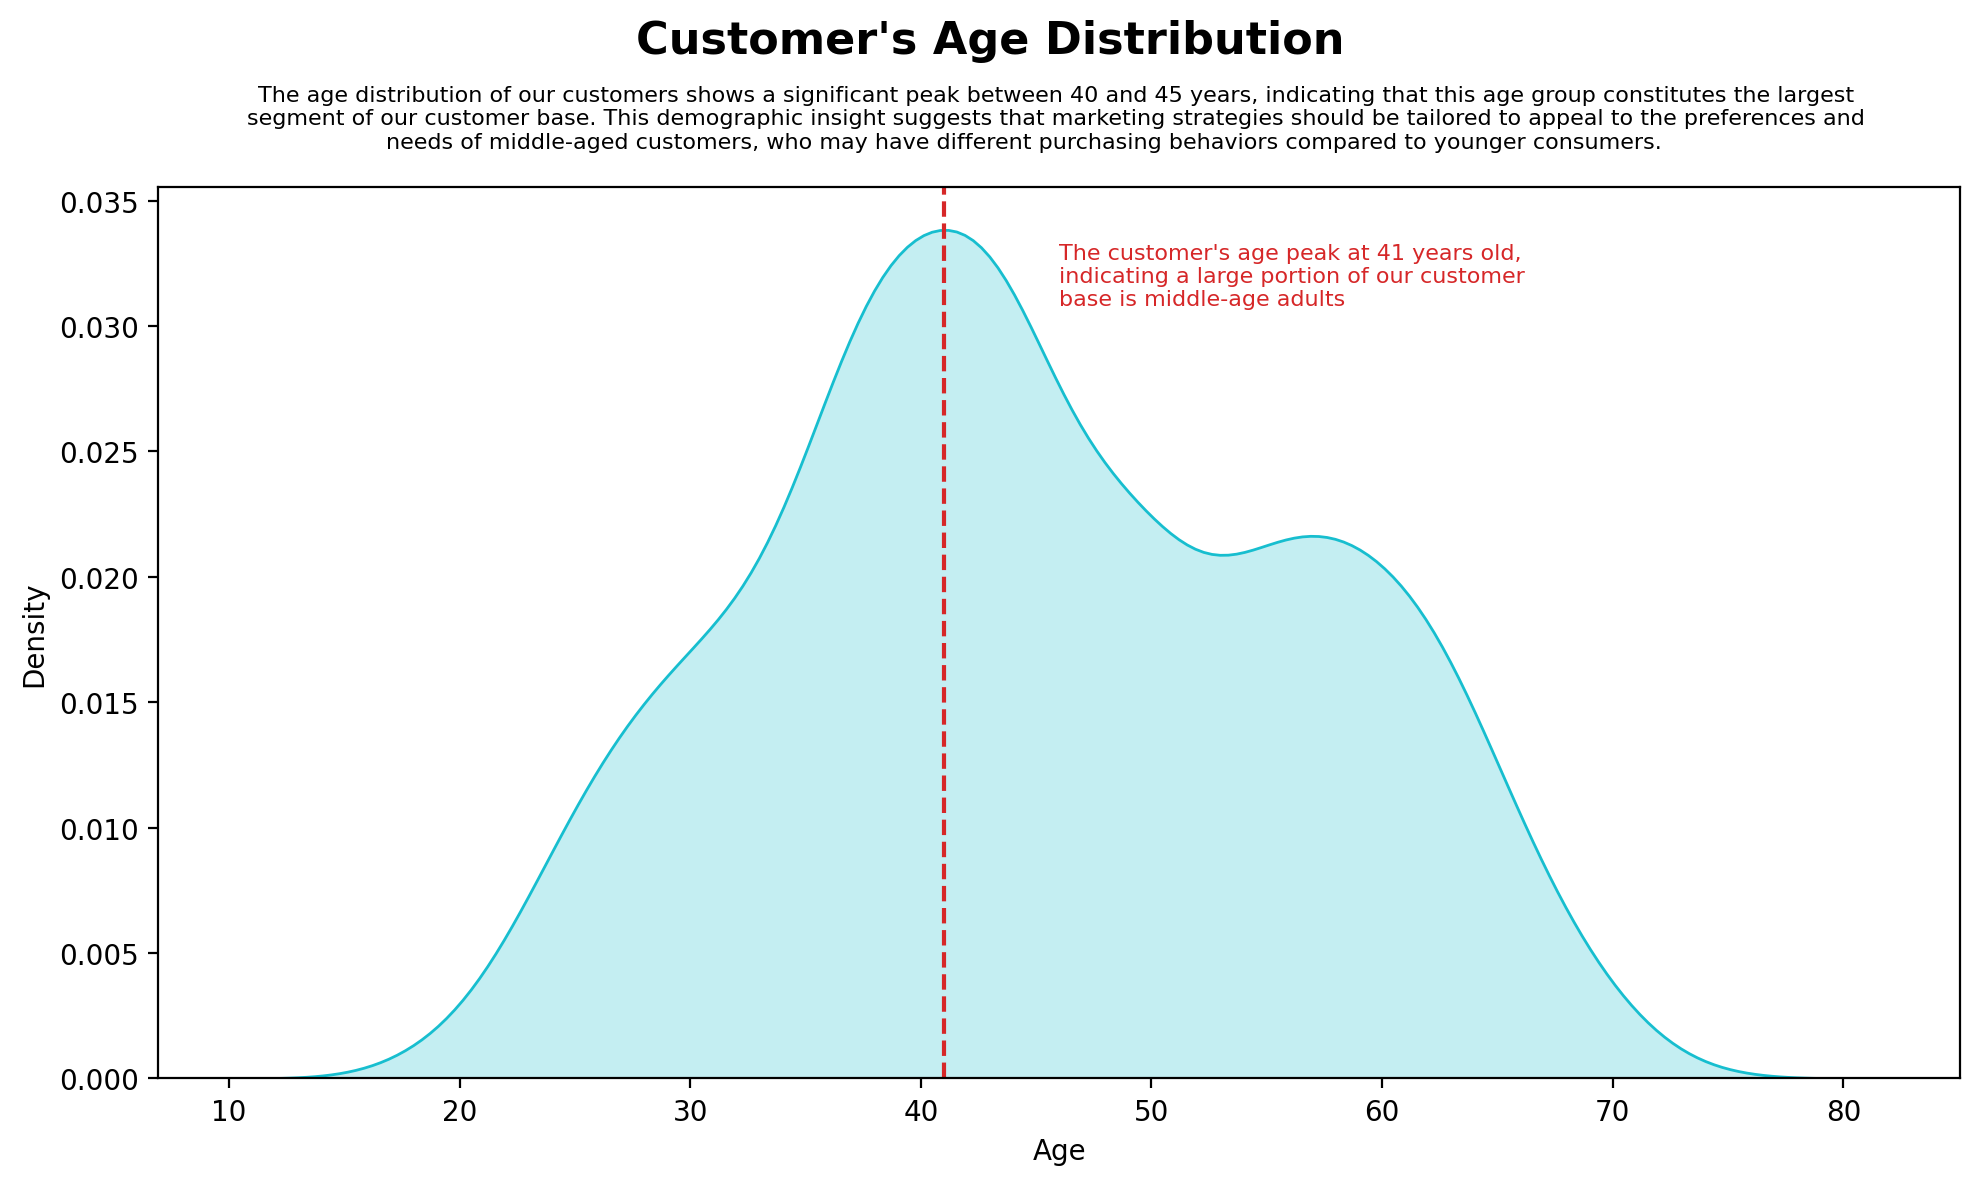

In [16]:
plt.figure(figsize=(10, 6), dpi=200)
sns.kdeplot(data=df_age, x='Age', fill=True, color='#17becf')
peak_age = 41
plt.axvline(x=peak_age, color='#d62728', linestyle='--')
plt.text(peak_age + 5, 0.032, 
         "The customer's age peak at 41 years old,\nindicating a large portion of our customer\nbase is middle-age adults", 
         color='#d62728', fontsize=8, ha='left', va='center')
plt.suptitle("Customer's Age Distribution", fontsize=16, fontweight='bold')
plt.title("""
The age distribution of our customers shows a significant peak between 40 and 45 years, indicating that this age group constitutes the largest 
segment of our customer base. This demographic insight suggests that marketing strategies should be tailored to appeal to the preferences and 
needs of middle-aged customers, who may have different purchasing behaviors compared to younger consumers.          
""", fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 1.03])
plt.savefig("Customer's Age Distribution", dpi=300, bbox_inches='tight')
plt.show()

**Findings:**
- A large portion of our customer base is middle-age adults, particularly in the range 40 - 45 years old.
- Young adults (18 - 34 years old) and senior (above 75 years old) tend to have a lower segmentation.
- Company should focus on targeting middle-age adults.

## Education Distribution

In [17]:
df['Education'].value_counts()

Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

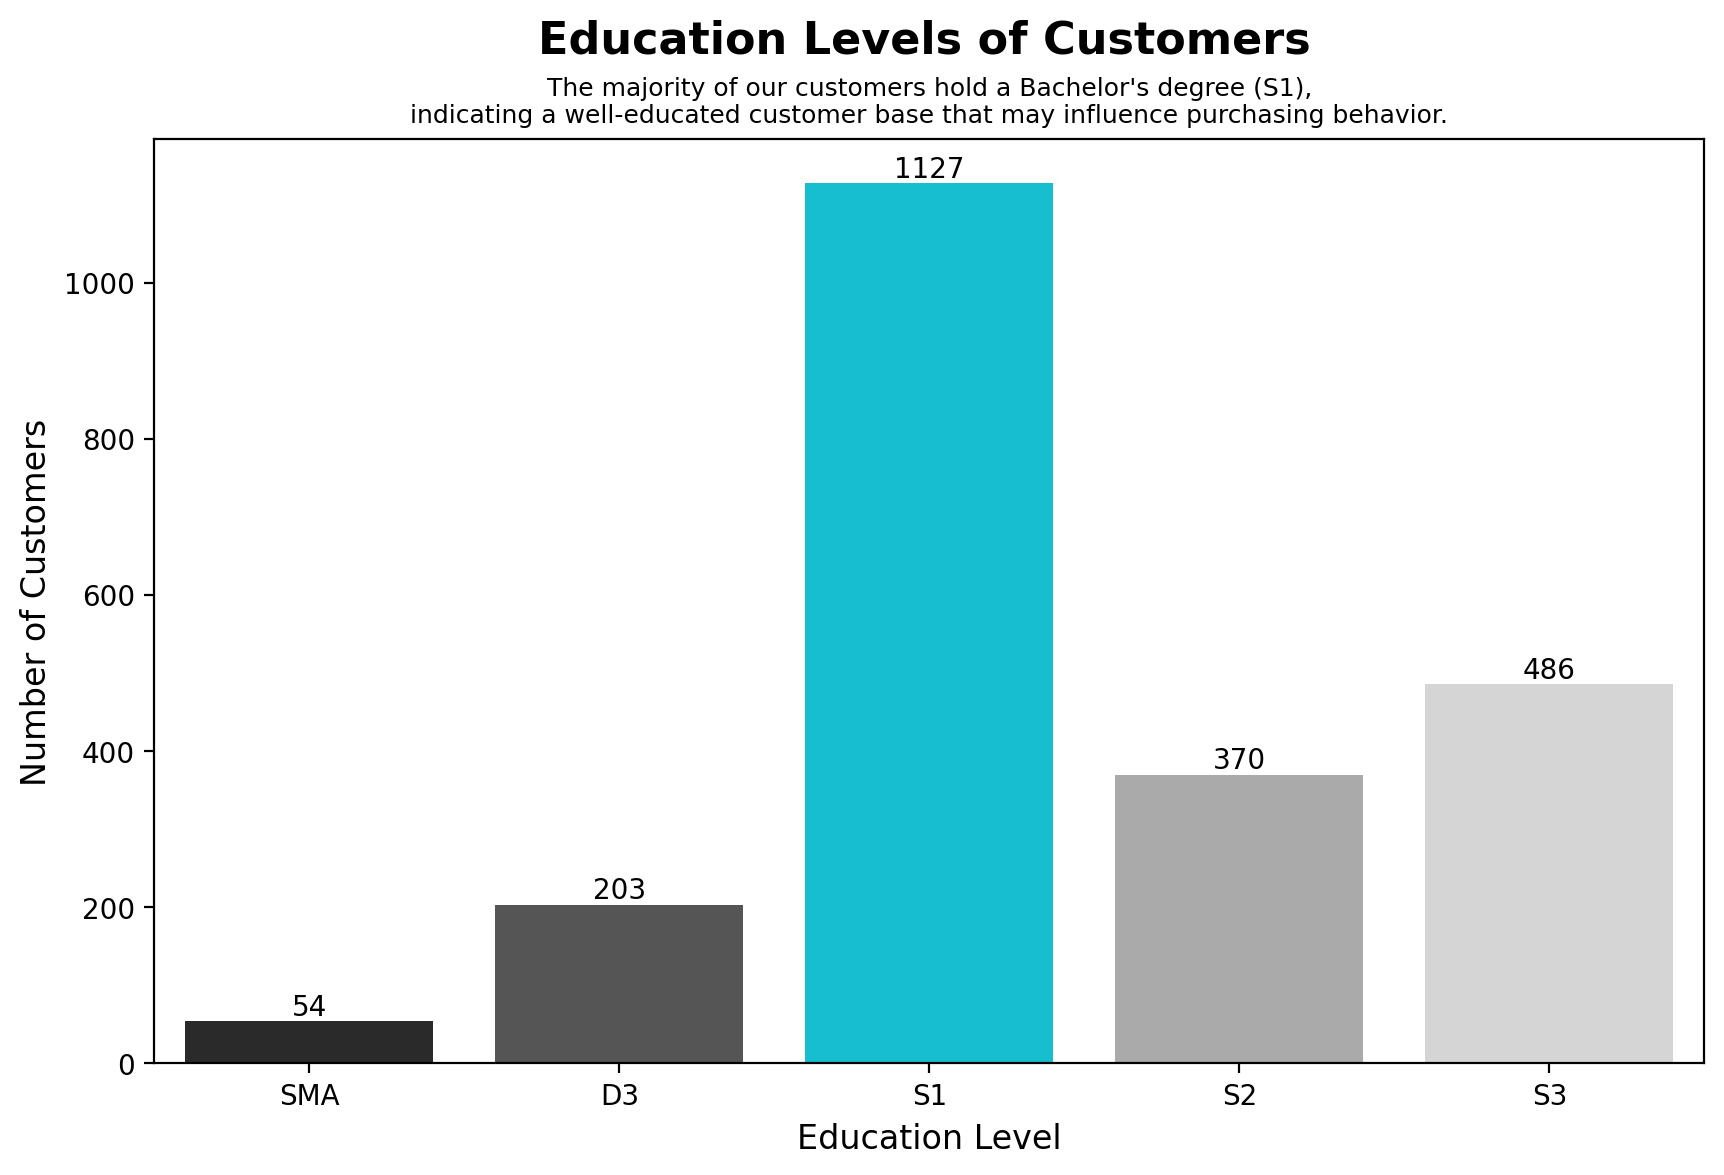

In [18]:
education_order = ['SMA', 'D3', 'S1', 'S2', 'S3']
education_counts = df['Education'].value_counts().reindex(education_order)

plt.figure(figsize=(10, 6), dpi=200)
barplot = sns.barplot(x=education_counts.index, y=education_counts.values, palette='grey')

barplot.patches[2].set_facecolor('#17becf')

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')
    
plt.suptitle('Education Levels of Customers', fontsize=16, fontweight='bold', x=0.51)
plt.title("The majority of our customers hold a Bachelor's degree (S1),\nindicating a well-educated customer base that may influence purchasing behavior.", 
          fontsize=9, ha='center')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0])
plt.savefig("Education Levels of Customers", dpi=300, bbox_inches='tight')
plt.show()

## Income Distribution

In [19]:
df['Income'].describe()

count    2.216000e+03
mean     5.224725e+07
std      2.517308e+07
min      1.730000e+06
25%      3.530300e+07
50%      5.138150e+07
75%      6.852200e+07
max      6.666660e+08
Name: Income, dtype: float64

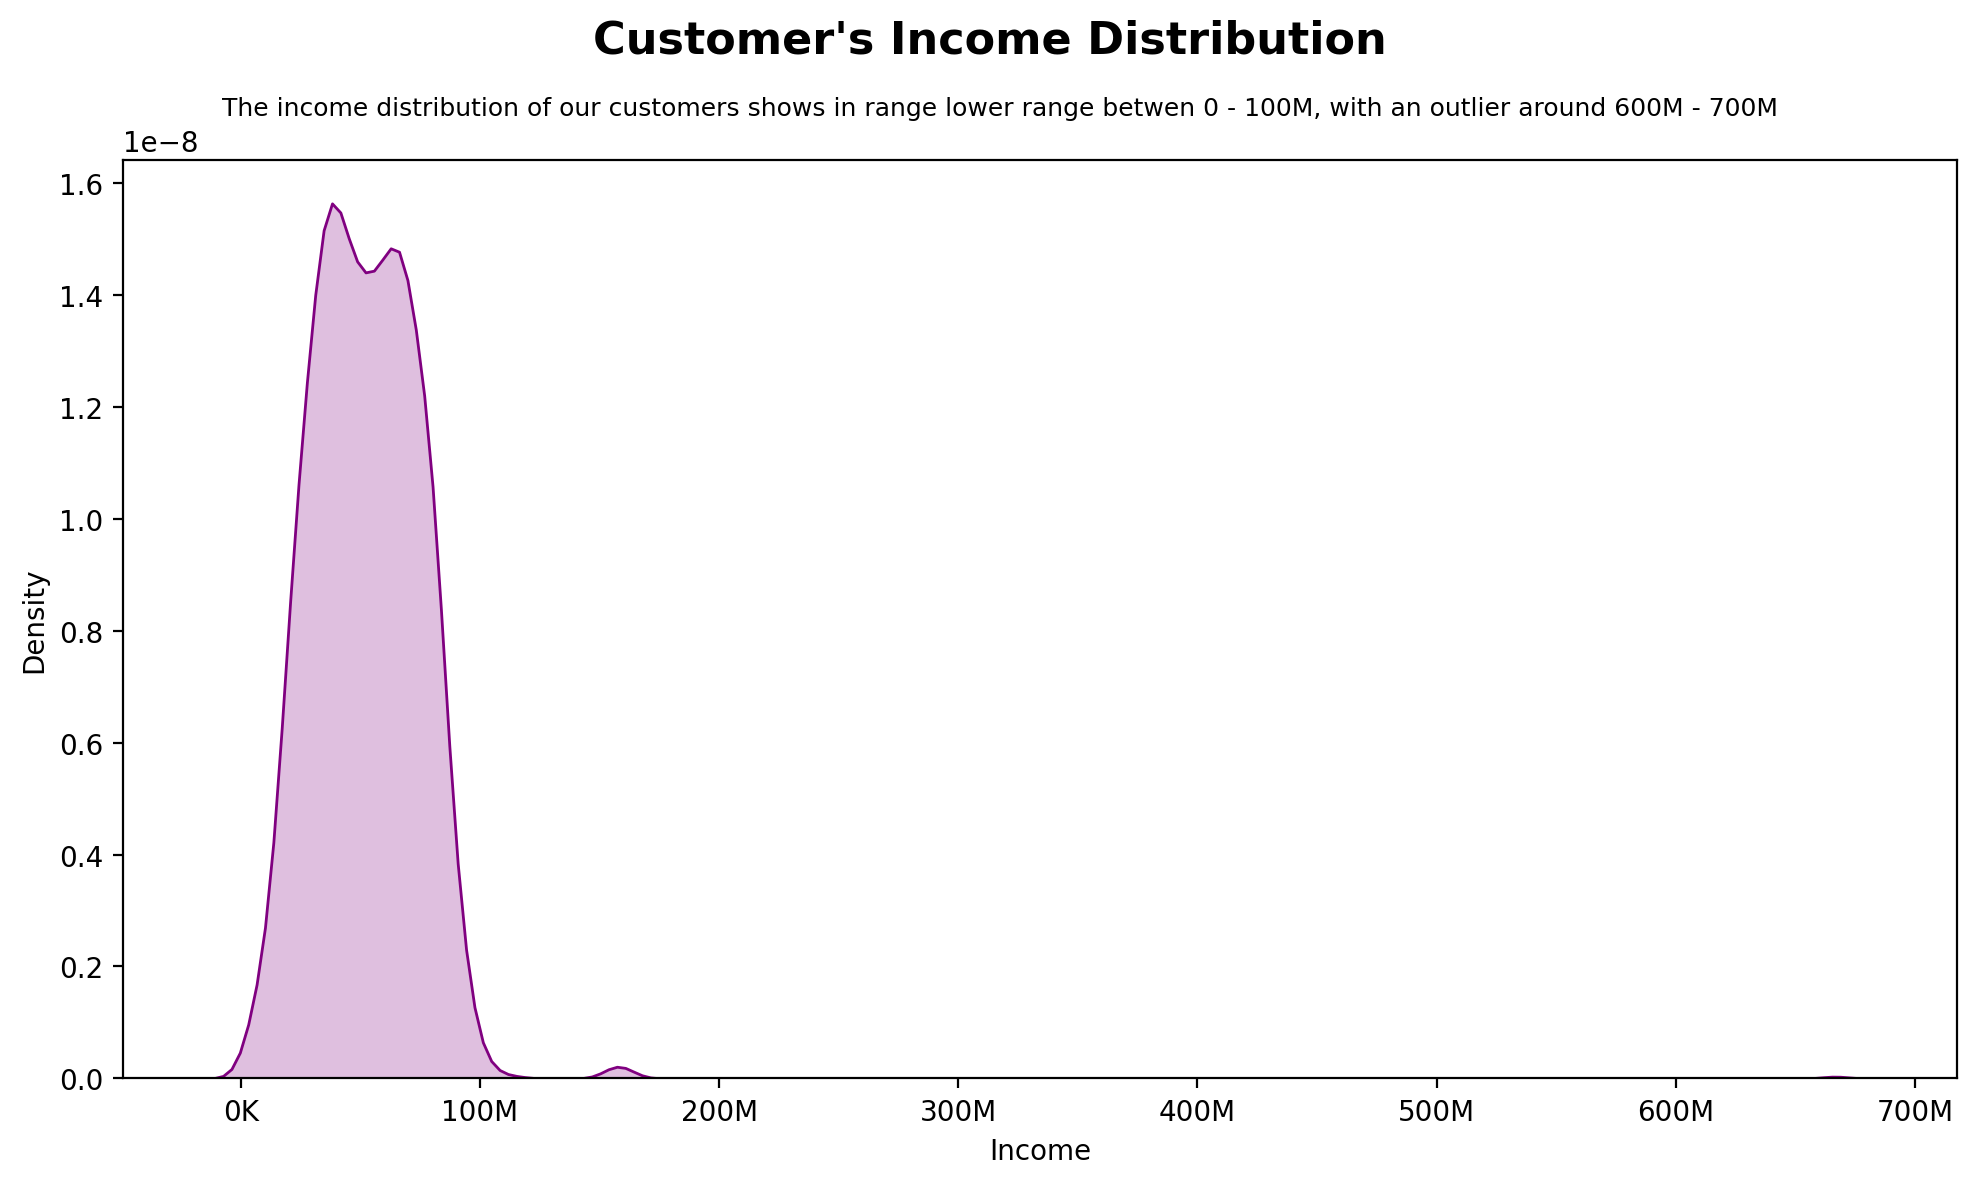

In [20]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6), dpi=200)
sns.kdeplot(data=df, x='Income', fill=True, color='purple')
plt.suptitle("Customer's Income Distribution", fontsize=16, fontweight='bold')
plt.title("""
The income distribution of our customers shows in range lower range betwen 0 - 100M, with an outlier around 600M - 700M          
""", fontsize=9)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M' if x >= 1e6 else f'{int(x / 1e3)}K'))
plt.tight_layout(rect=[0, 0, 1, 1.05])
plt.savefig("Customer's Income Distribution 1", dpi=300, bbox_inches='tight')
plt.show()

We will look further analysis about the distribution by dropping the extreme outliers

In [21]:
df['Income'].nlargest(10)

2233    666666000.0
617     162397000.0
687     160803000.0
1300    157733000.0
164     157243000.0
1653    157146000.0
2132    156924000.0
655     153924000.0
1898    113734000.0
646     105471000.0
Name: Income, dtype: float64

In [22]:
df_income = df.drop(df[df['Income'].isin(df['Income'].nlargest(1))].index)
df_income['Income'].describe()

count    2.215000e+03
mean     5.196986e+07
std      2.152632e+07
min      1.730000e+06
25%      3.528400e+07
50%      5.137300e+07
75%      6.848700e+07
max      1.623970e+08
Name: Income, dtype: float64

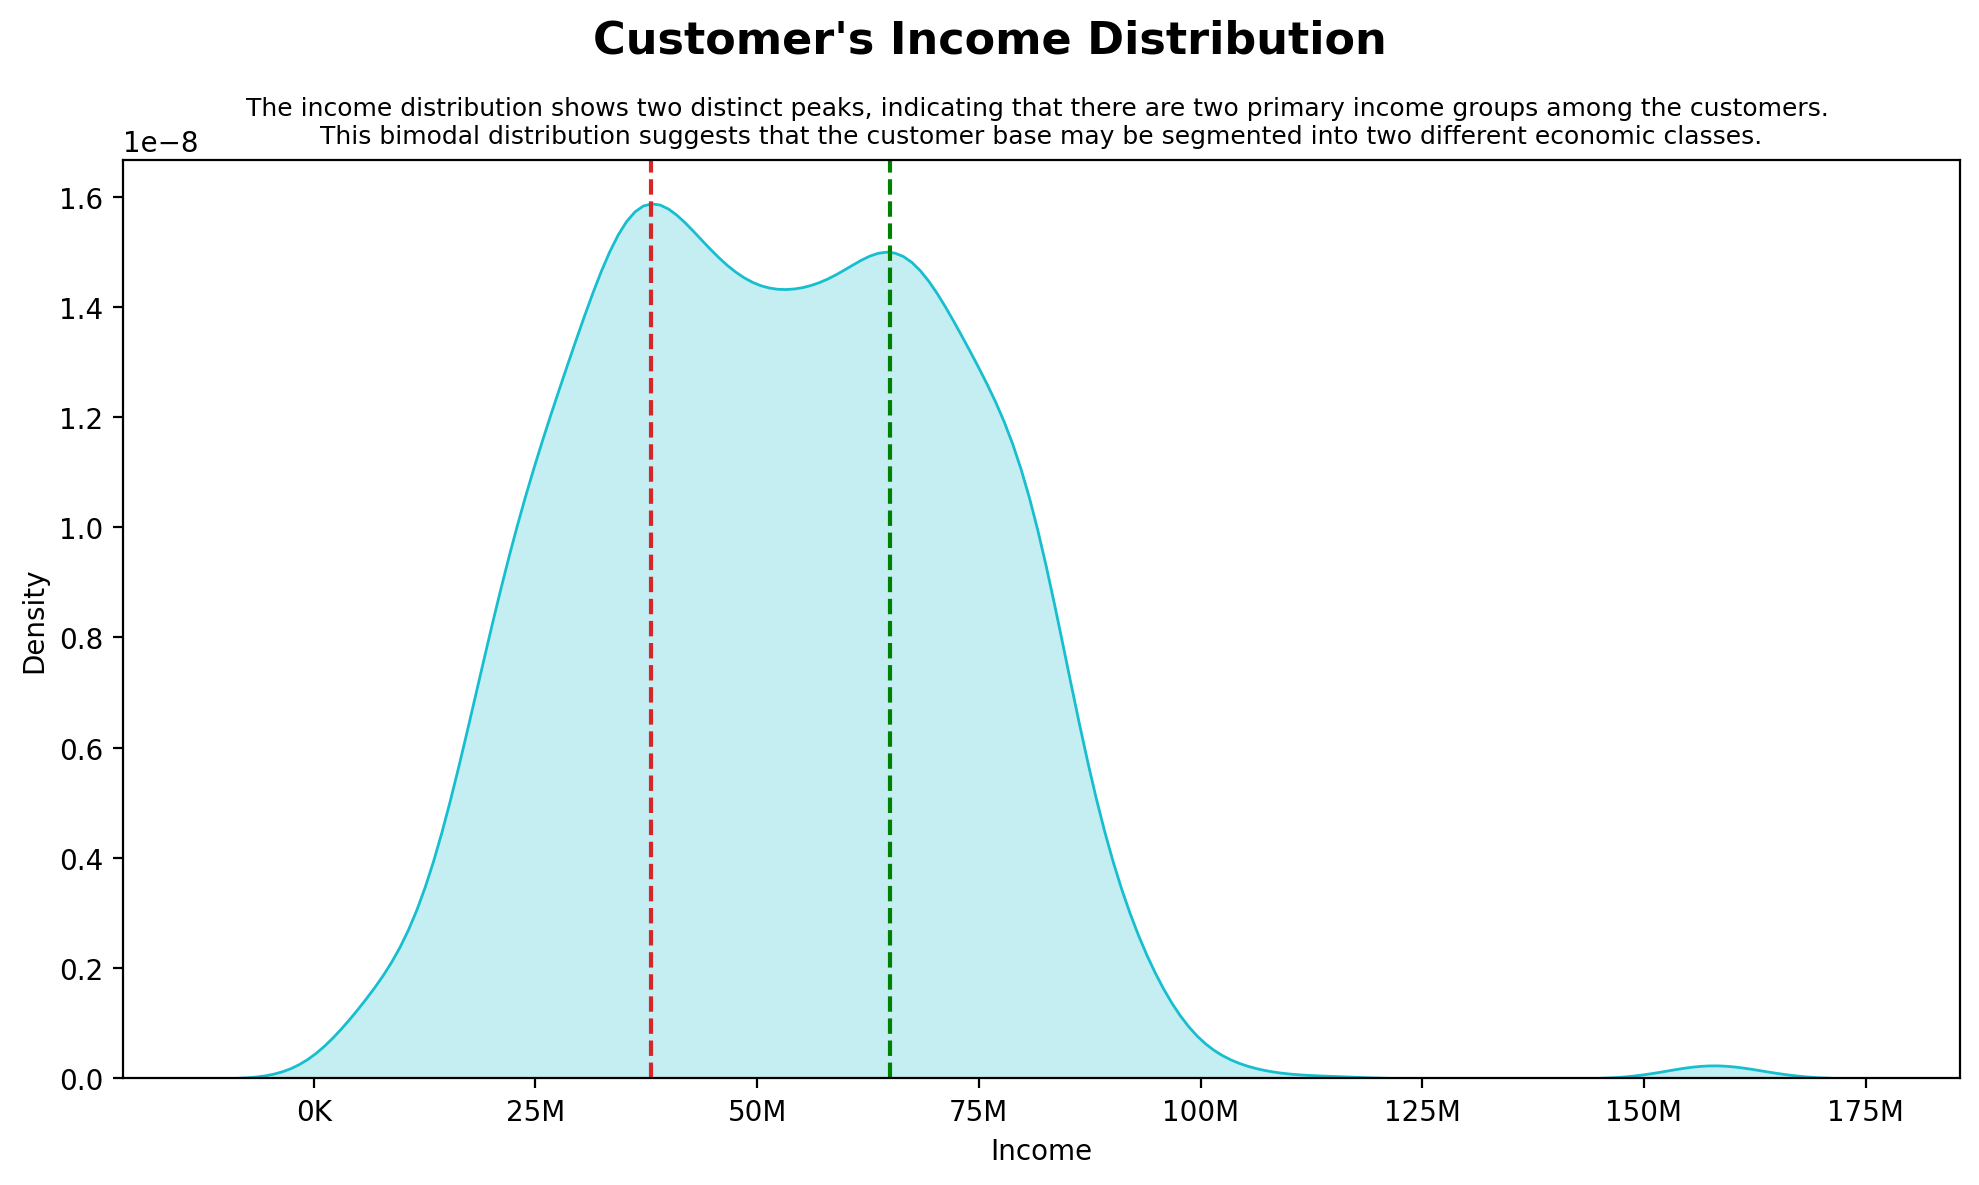

In [23]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6), dpi=200)
sns.kdeplot(data=df_income, x='Income', fill=True, color='#17becf')
peak_income1 = 38000000
peak_income2 = 65000000
plt.axvline(x=peak_income1, color='#d62728', linestyle='--')
plt.axvline(x=peak_income2, color='green', linestyle='--')
plt.suptitle("Customer's Income Distribution", fontsize=16, fontweight='bold')
plt.title("""
The income distribution shows two distinct peaks, indicating that there are two primary income groups among the customers. 
This bimodal distribution suggests that the customer base may be segmented into two different economic classes.""", 
fontsize=9)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M' if x >= 1e6 else f'{int(x / 1e3)}K'))
plt.tight_layout(rect=[0, 0, 1, 1.05])
plt.savefig("Customer's Income Distribution 2", dpi=300, bbox_inches='tight')
plt.show()

**Findings:**
- The presence of two peaks implies that marketing strategies should be tailored to address the distinct needs and preferences of each income group. For instance, products or services targeted at the lower income group may differ significantly from those aimed at the higher income group.
- Understanding these income segments can help in identifying potential opportunities for product development, pricing strategies, and promotional efforts. For example, luxury products may appeal more to the higher income group, while more affordable options could attract the lower income segment.

## Customer's Marital Status

In [24]:
df['Marital_Status'].value_counts()

Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64

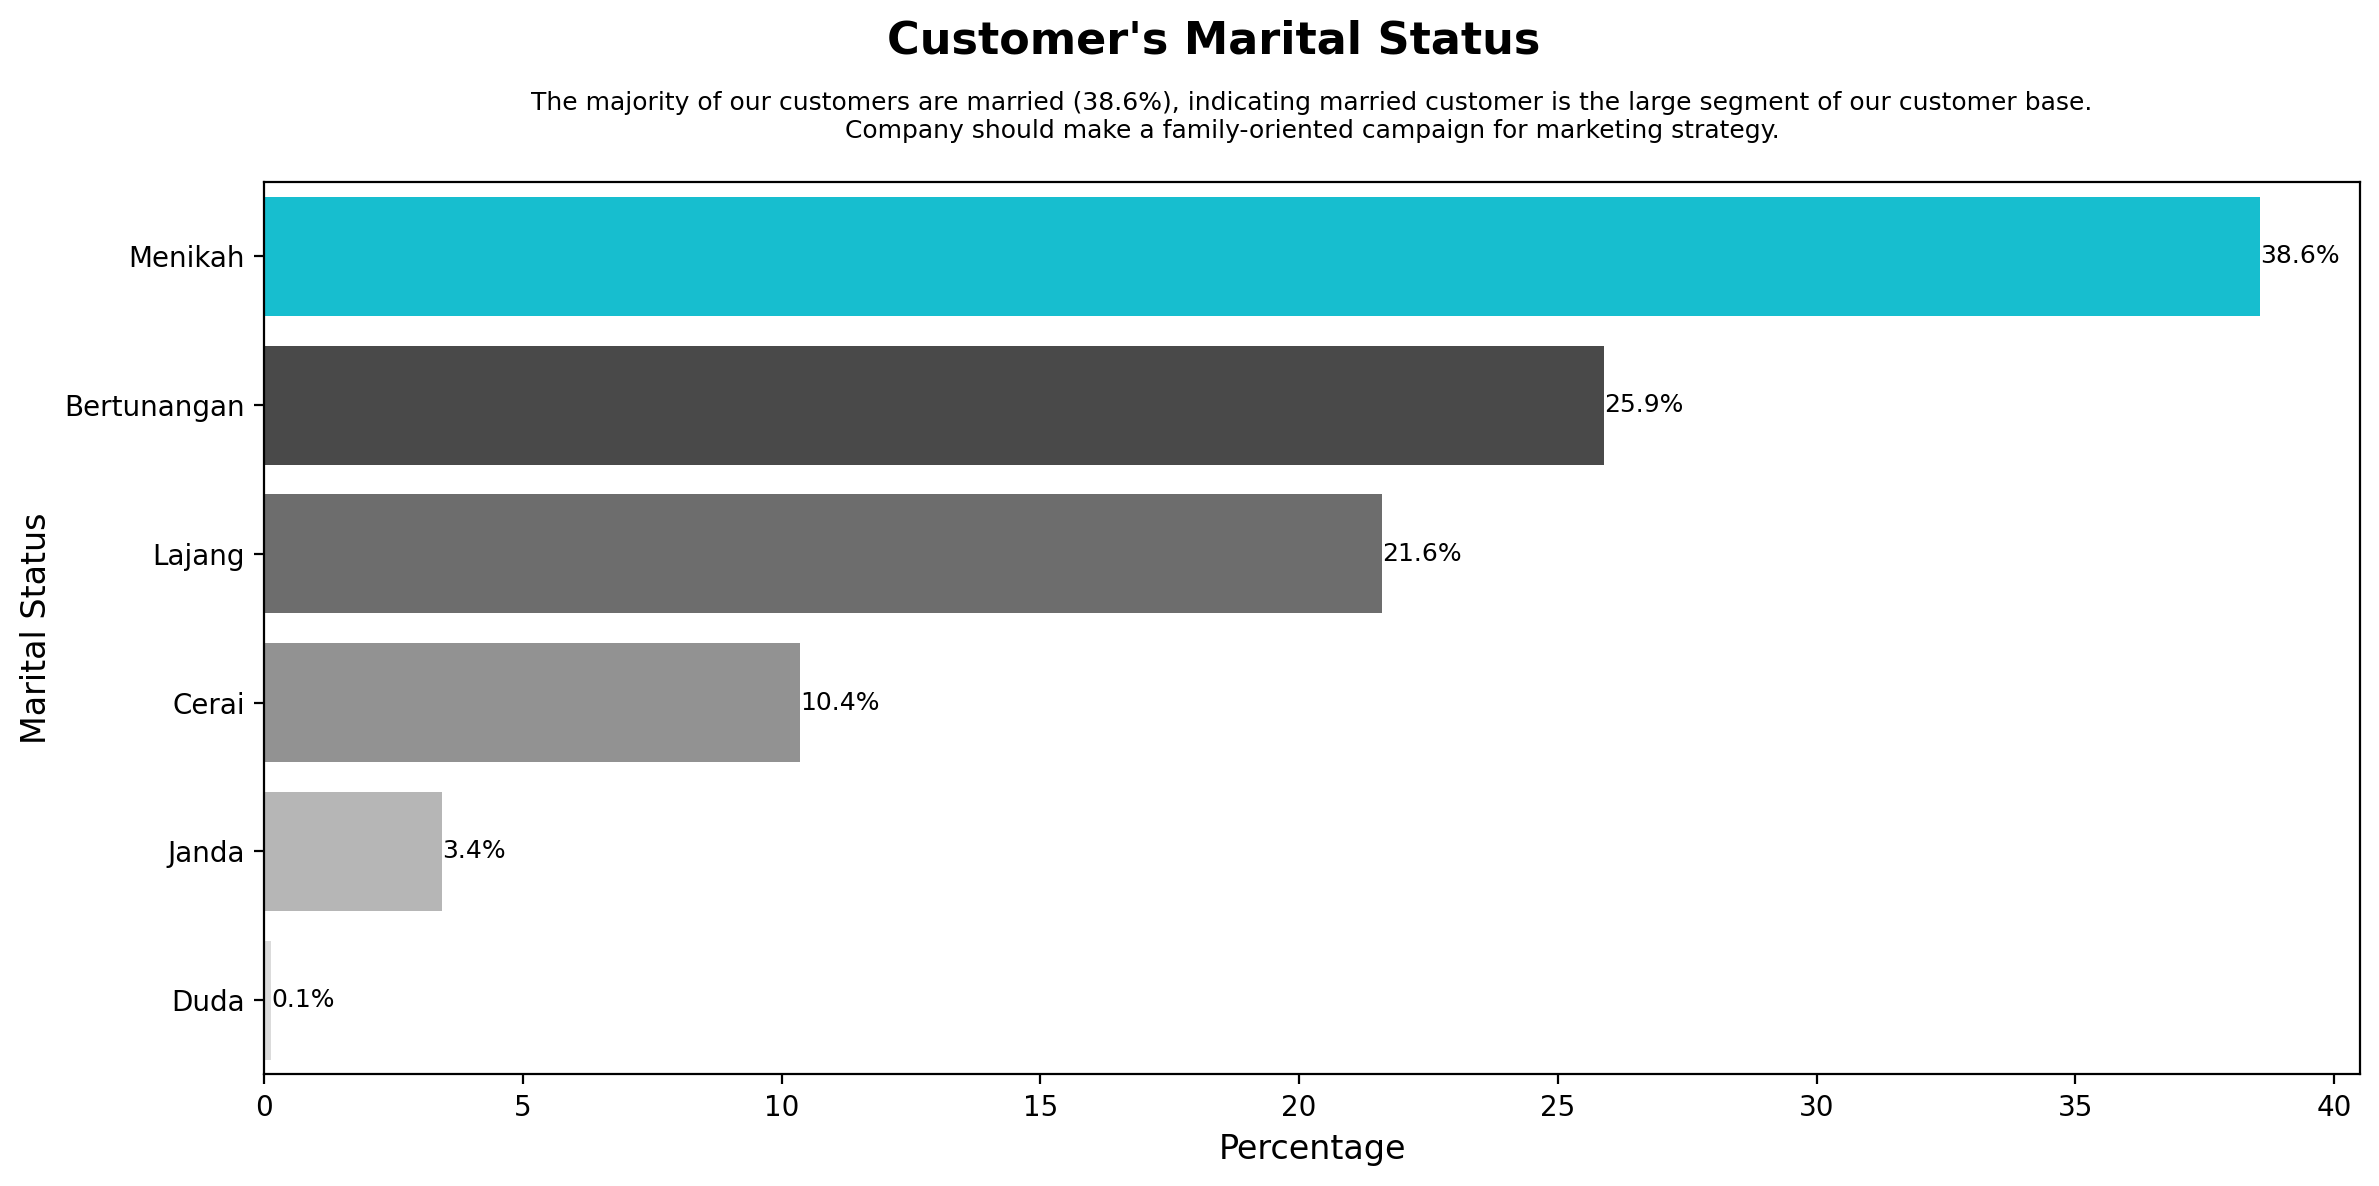

In [25]:
sort_marital = df['Marital_Status'].value_counts()
total_customers = sort_marital.sum()
percentage_marital = (sort_marital / total_customers) * 100

plt.figure(figsize=(12, 6), dpi=200)
barplot = sns.barplot(x=percentage_marital.values, y=percentage_marital.index, palette='grey')

barplot.patches[0].set_facecolor('#17becf')

for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.1f}%', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', fontsize=9)
        
plt.suptitle("Customer's Marital Status", fontsize=16, fontweight='bold', x=0.51, y=0.98)
plt.title("""
The majority of our customers are married (38.6%), indicating married customer is the large segment of our customer base.
Company should make a family-oriented campaign for marketing strategy.
""", 
          fontsize=9, ha='center')
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 1.03])
plt.savefig("Customer's Marital Status", dpi=300, bbox_inches='tight')
plt.show()

**Findings:**
- The majority of our customers are married (Menikah), with a total of 864 individuals in this category. This indicates that married individuals form the largest segment of our customer base, suggesting that marketing strategies should be tailored to appeal to family-oriented products and services.
- The second-largest group consists of engaged individuals (Bertunangan) at 580. This demographic may also be receptive to products and services related to family planning or family-oriented too.
- There are 484 single customers (Lajang), which is a significant number. This group may have different purchasing behaviors and preferences, indicating a potential market for products targeted to single individuals.

## Number of Kids Distribution

In [26]:
print(f"number of kids (unique value):{df['Kidhome'].unique()}")
print(f"total:\n{df['Kidhome'].value_counts()}\n")
print(f"number of Teen (unique value):{df['Teenhome'].unique()}")
print(f"total:\n{df['Teenhome'].value_counts()}\n")

number of kids (unique value):[0 1 2]
total:
Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

number of Teen (unique value):[0 1 2]
total:
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64



Based on the kids and teen variable, we can see some people have a kid and teen. We will visualized the distribution of customers who have children by aggregating number of kids and teen. Then, we will visualize customer who has child and not.

In [27]:
sum_children = df['Kidhome'] + df['Teenhome']
df_children = pd.DataFrame({'Children': sum_children})
df_children['have_children'] = df_children['Children'].apply(lambda x: 'Yes' if x > 0 else 'No')

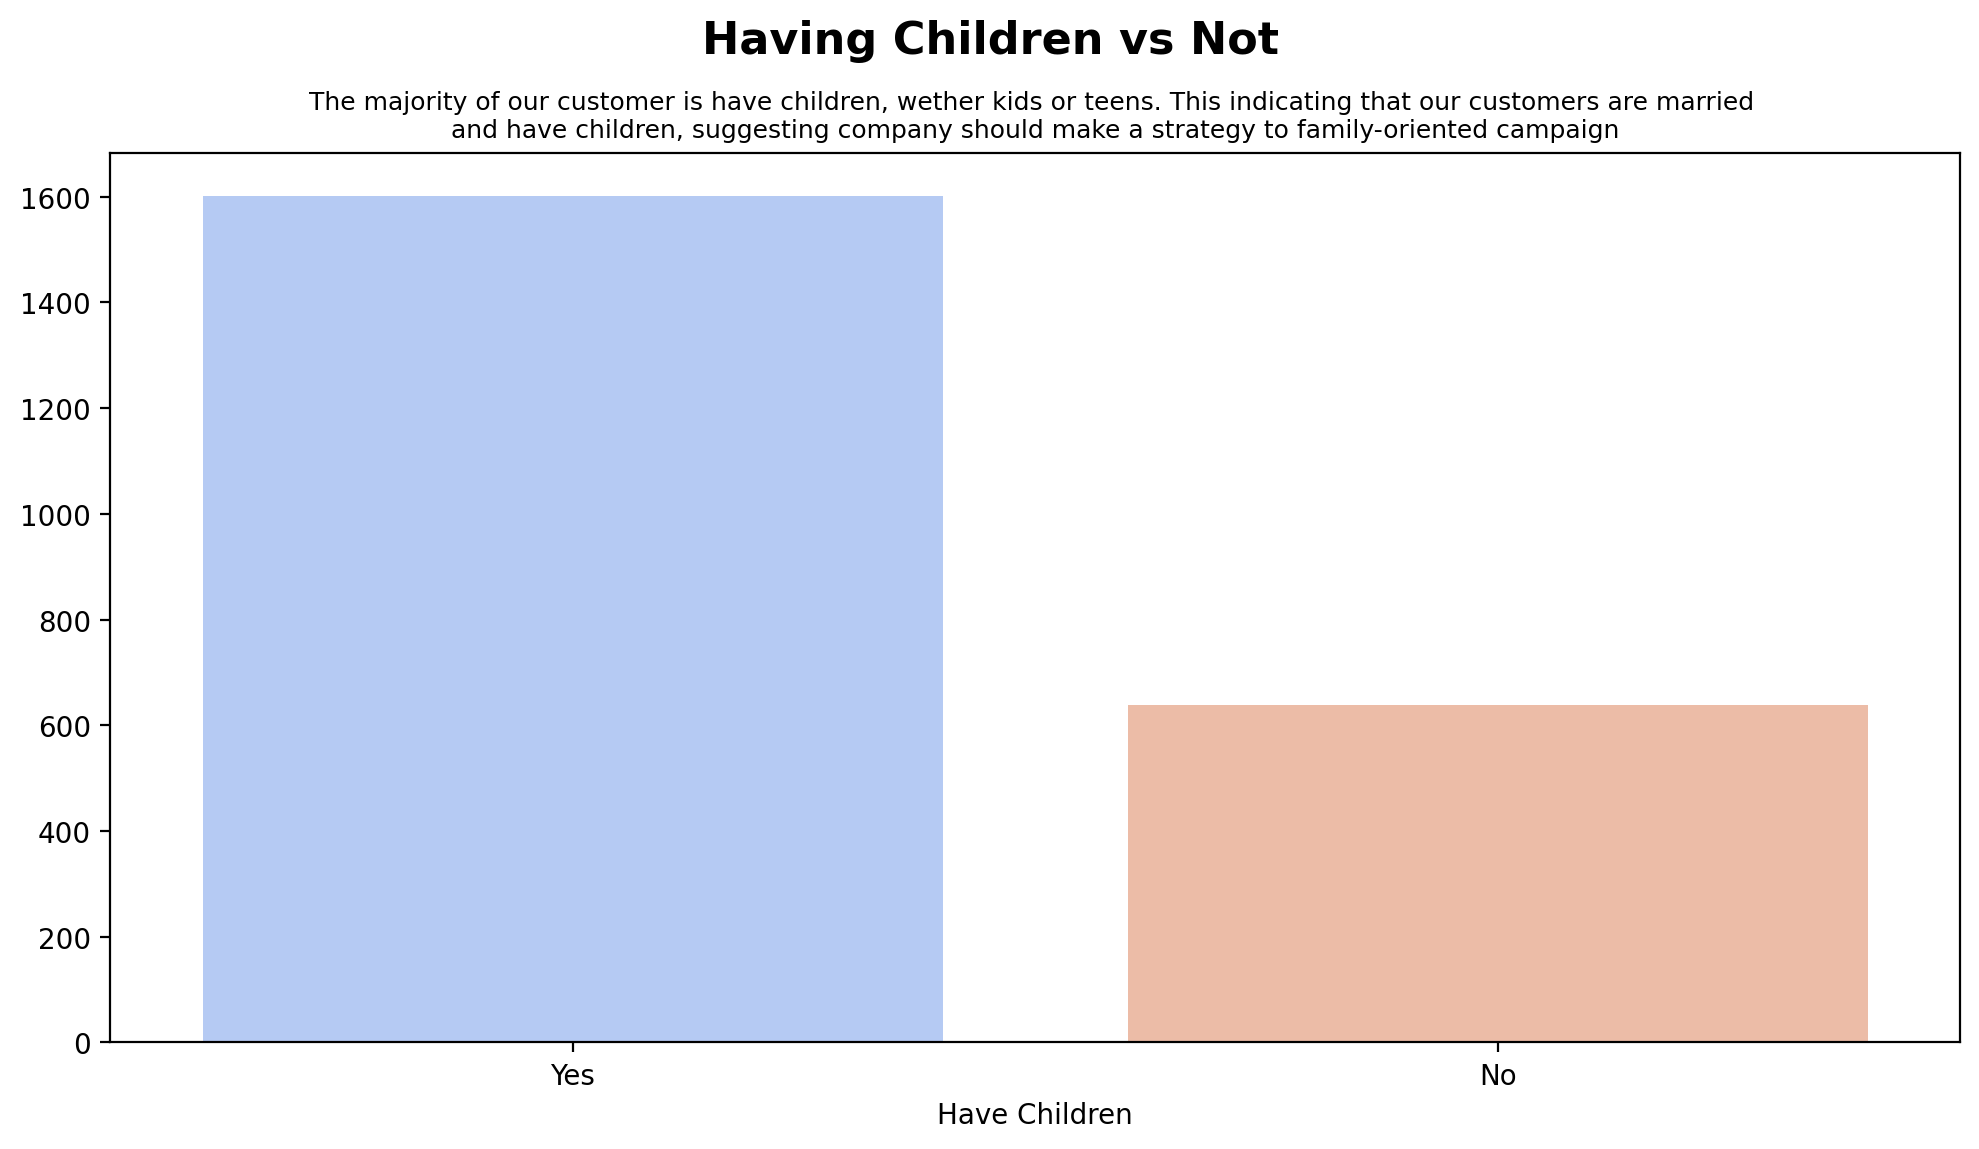

In [28]:
have_children = df_children['have_children'].value_counts()
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(x=have_children.index, y=have_children.values, palette='coolwarm')
plt.suptitle('Having Children vs Not', fontsize=16, fontweight='bold',x=0.5, y=0.95)
plt.title("""
The majority of our customer is have children, wether kids or teens. This indicating that our customers are married 
and have children, suggesting company should make a strategy to family-oriented campaign""", fontsize=9)
plt.xlabel("Have Children")
plt.tight_layout()
plt.savefig("Child Ownerships", dpi=300, bbox_inches='tight')
plt.show()

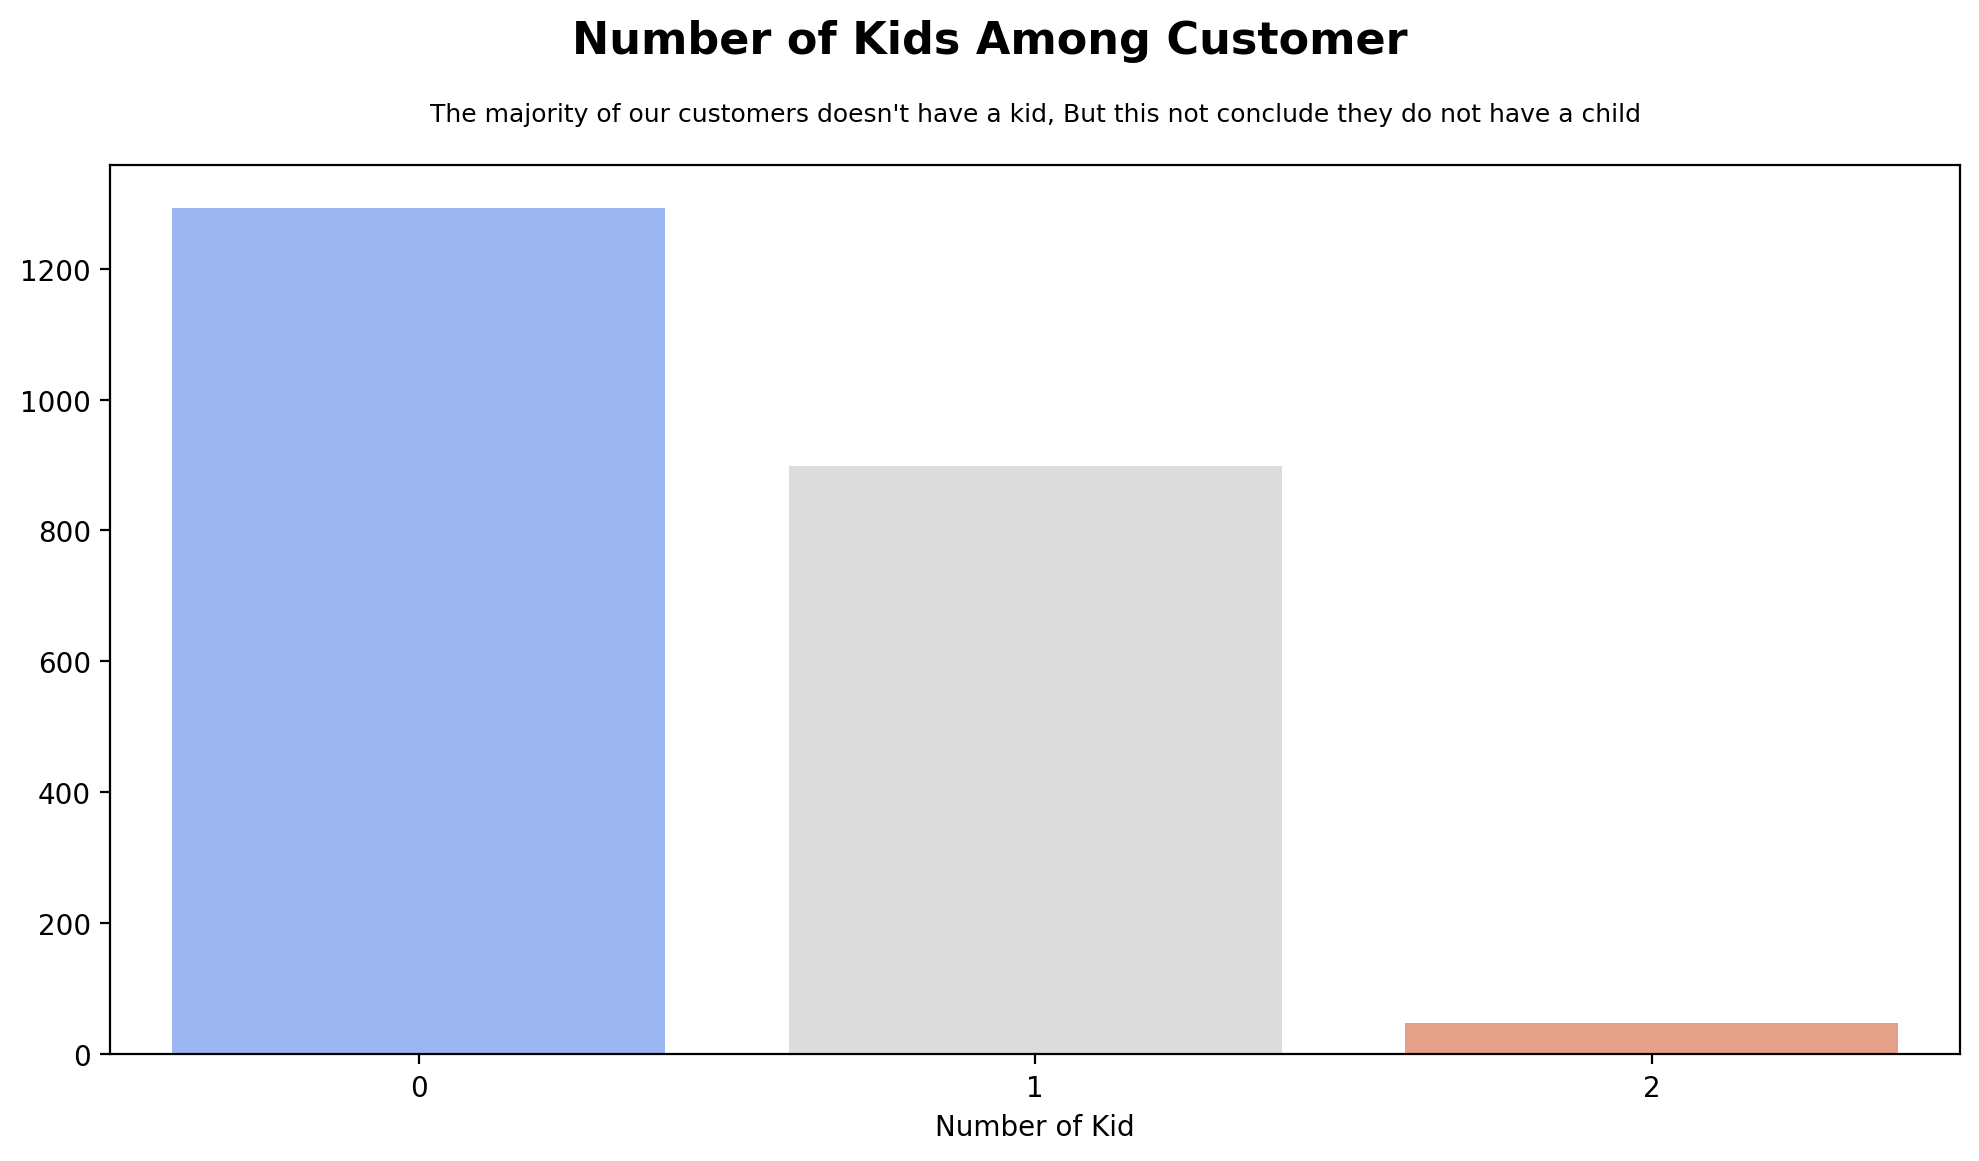

In [29]:
kid_home = df['Kidhome'].value_counts()
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(x=kid_home.index, y=kid_home.values, palette='coolwarm')
plt.suptitle("Number of Kids Among Customer", fontsize=16, fontweight='bold', y=0.96)
plt.title("""
The majority of our customers doesn't have a kid, But this not conclude they do not have a child
""", fontsize=9)
plt.xlabel("Number of Kid")
plt.tight_layout()
plt.savefig("Number of Kids Among Customers", dpi=300, bbox_inches='tight')
plt.show()

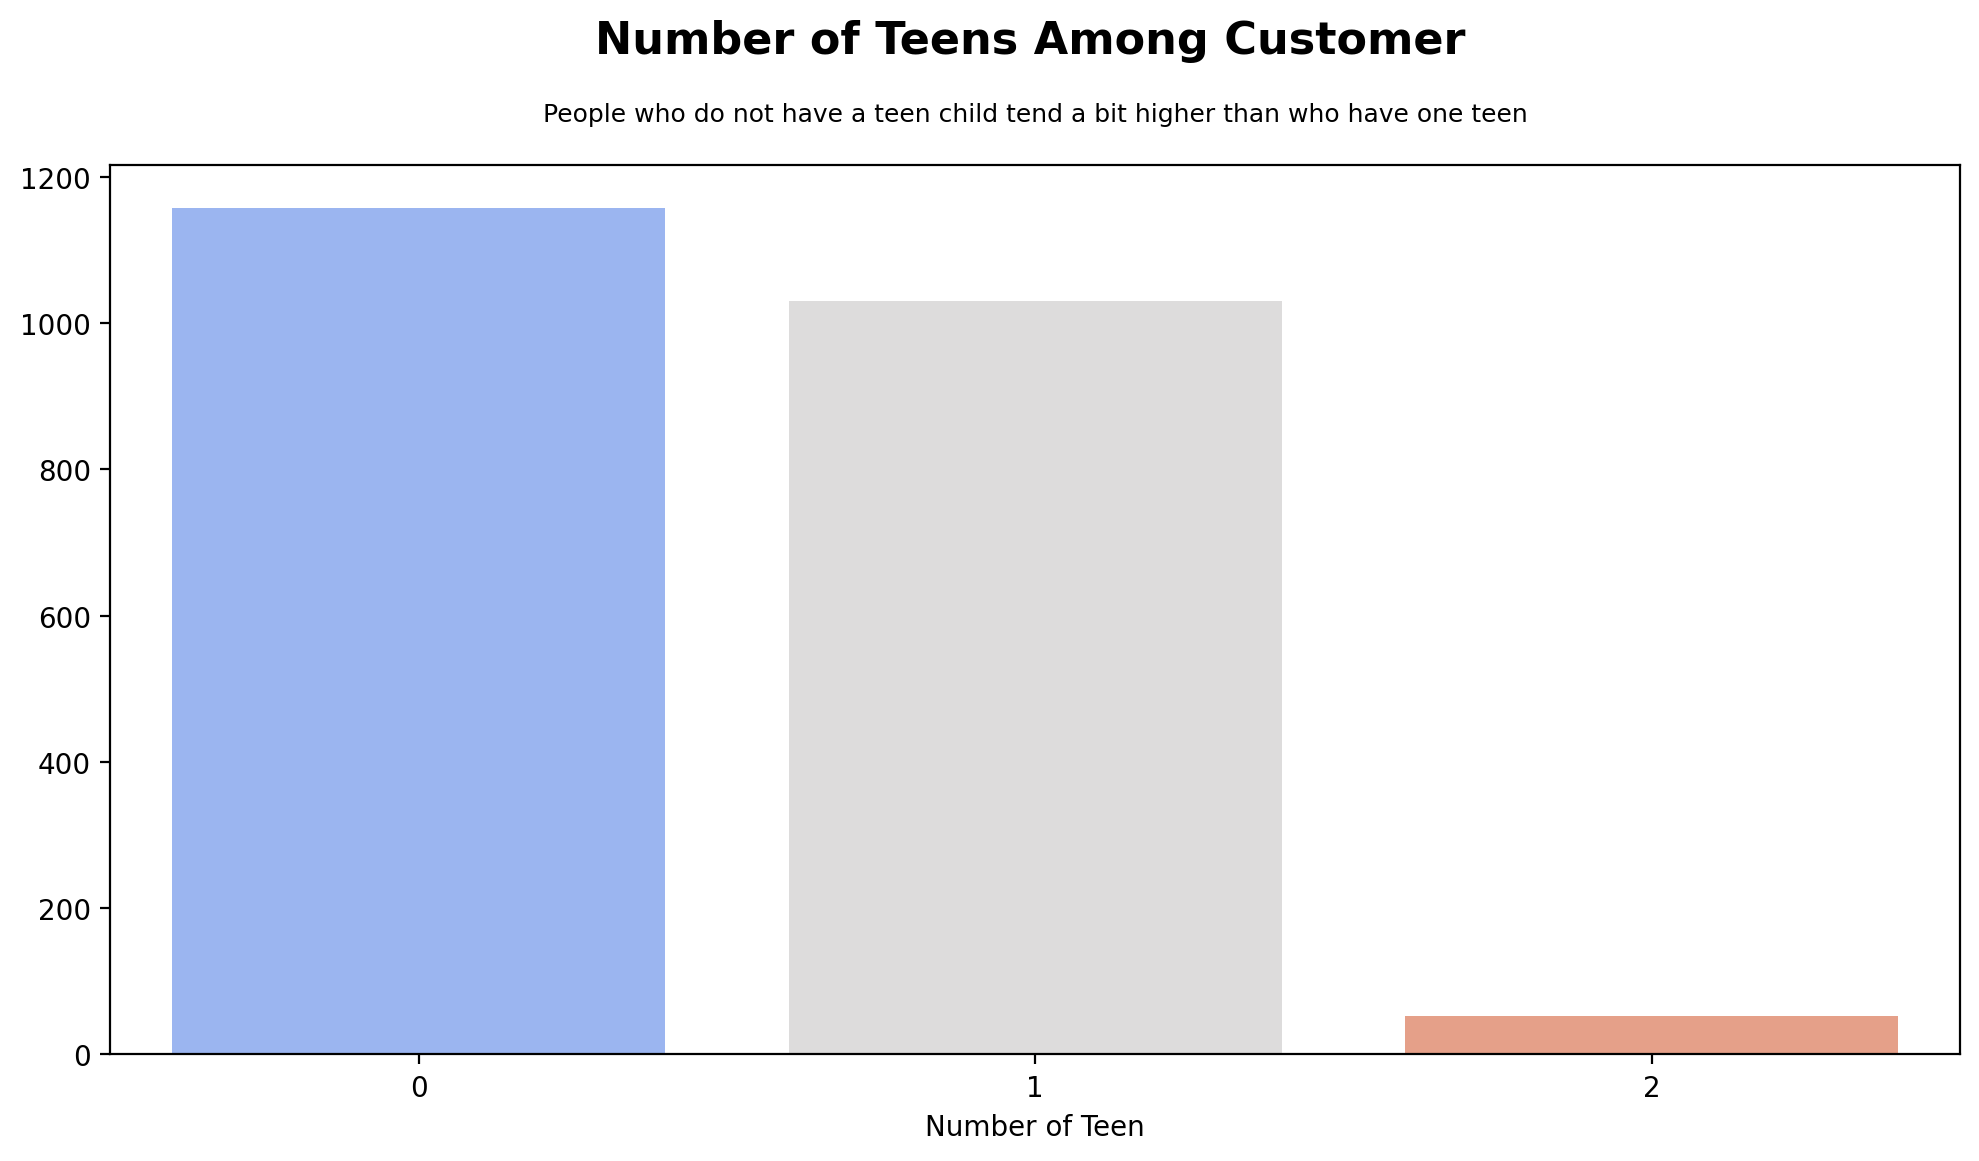

In [30]:
kid_home = df['Teenhome'].value_counts()
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(x=kid_home.index, y=kid_home.values, palette='coolwarm')
plt.suptitle("Number of Teens Among Customer", fontsize=16, fontweight='bold', x=0.52, y=0.96)
plt.title("""
People who do not have a teen child tend a bit higher than who have one teen
""", fontsize=9)
plt.xlabel("Number of Teen")
plt.tight_layout()
plt.savefig("Number of Teens Among Customers", dpi=300, bbox_inches='tight')
plt.show()

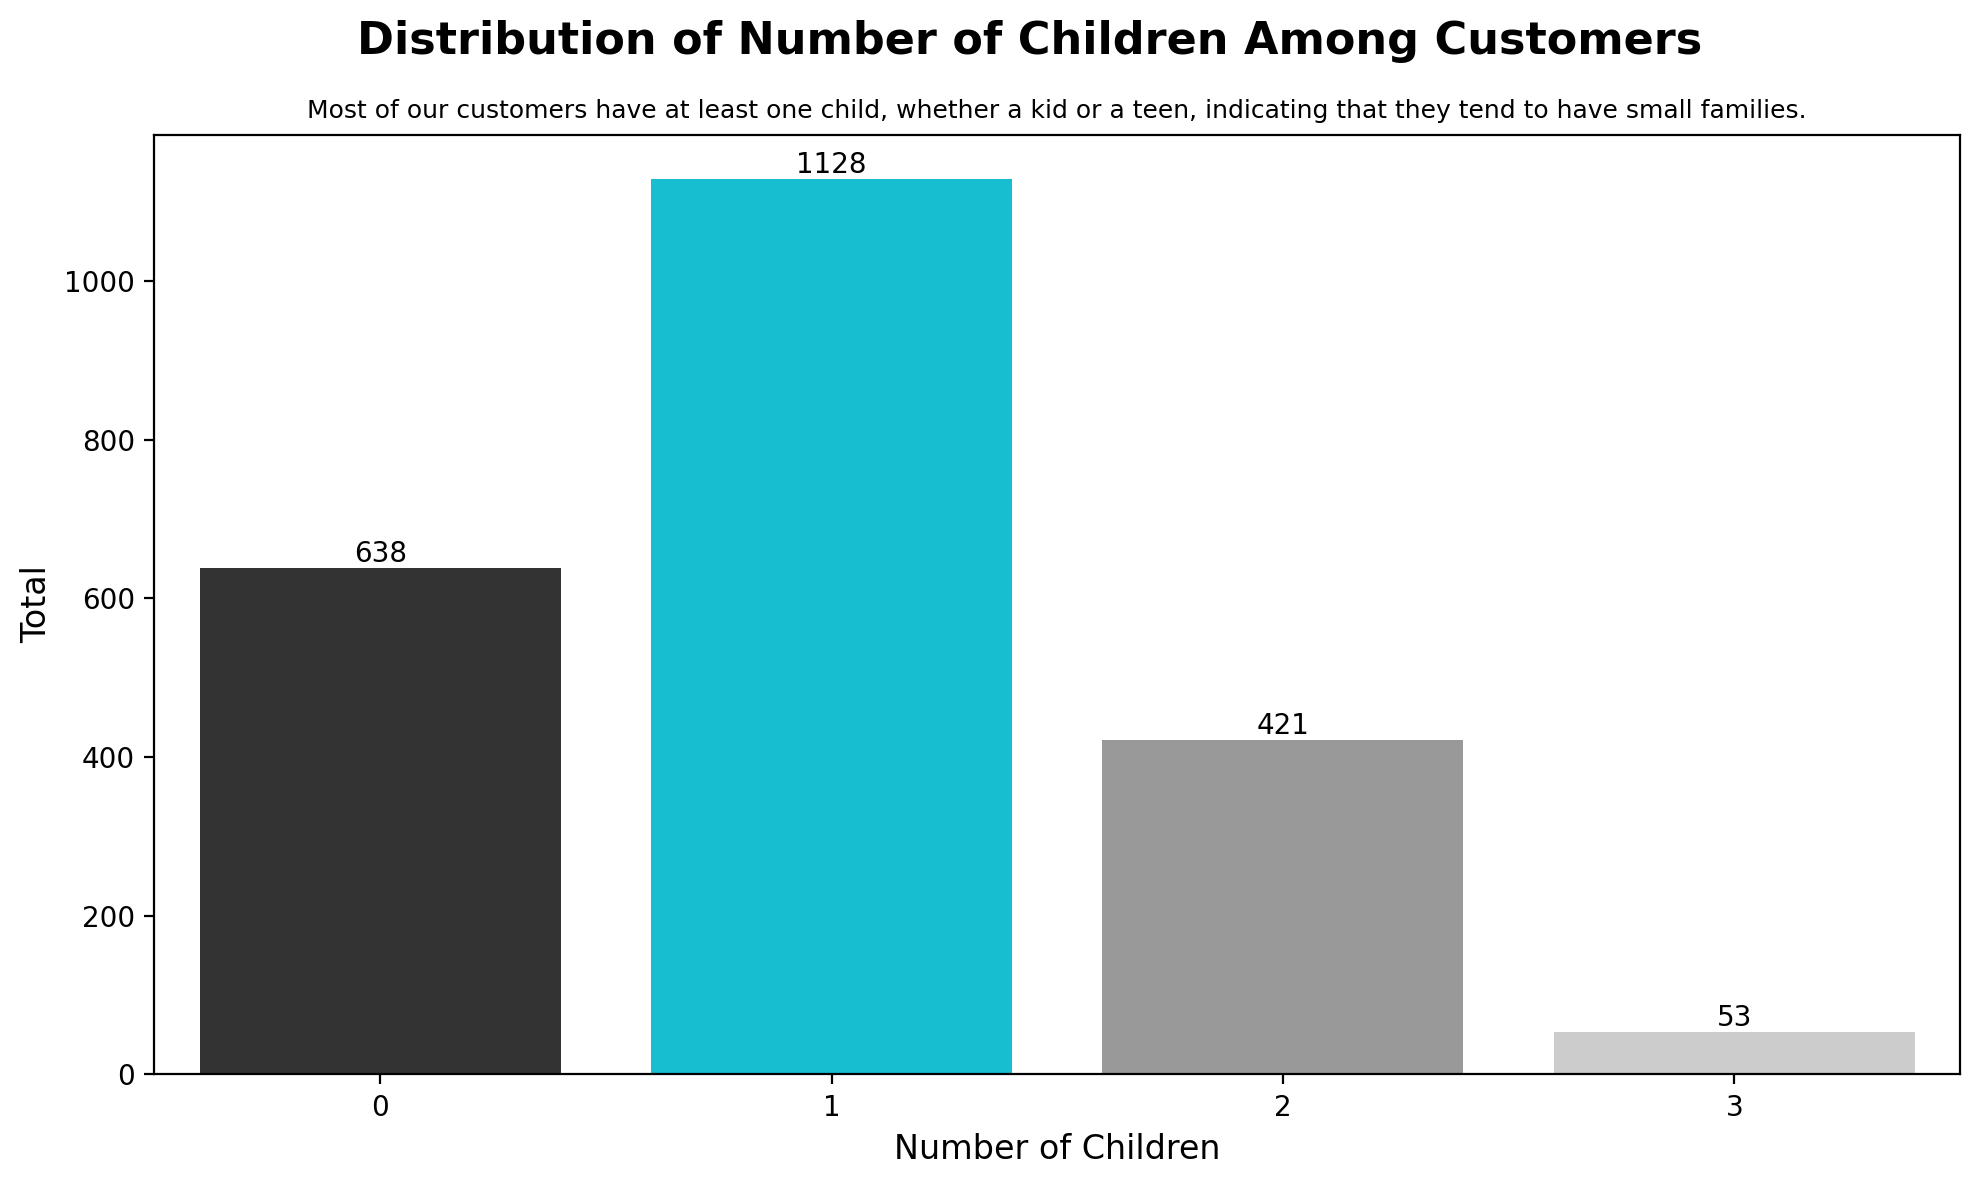

In [31]:
# Count occurrences of each unique value in the total children
children_counts = df_children['Children'].value_counts().sort_index()

plt.figure(figsize=(10, 6), dpi=200)
barplot = sns.barplot(x=children_counts.index, y=children_counts.values, palette='grey')

most_common = children_counts.idxmax()
bar_index = children_counts.index.get_loc(most_common)
barplot.patches[bar_index].set_facecolor('#17becf')

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

plt.suptitle("Distribution of Number of Children Among Customers", fontsize=16, fontweight='bold', x=0.52)
plt.title("Most of our customers have at least one child, whether a kid or a teen, indicating that they tend to have small families.", fontsize=9, ha='center')
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.tight_layout()
plt.savefig("Distibution of Number of Children Among Customers", dpi=300, bbox_inches='tight')
plt.show()

**Findings:**
- Based on previous insight, the majority of our customers have married and have children.
- Based on the number of child, our customers have at least have one child, wether a kid or teen.
- The customer who have a teen is more higher than have a kid, suggesting marketing team can make a campaign on platforms where popular among teens, for example Instagram and Tiktok.

## Number of Days Since Customer Last Purchase

In [32]:
print(f"Number of unique value: {df['Recency'].nunique()}\n")

print(f"unique values:\n{df['Recency'].unique()}\n")

print(f"minimum values: {df['Recency'].min()}")
print(f"Maximum values: {df['Recency'].max()}")
print(f"Range: {df['Recency'].max() - df['Recency'].min()}")
print(f"Class Width: {round((df['Recency'].max() - df['Recency'].min()) / 20, 0)}")

Number of unique value: 100

unique values:
[58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

minimum values: 0
Maximum values: 99
Range: 99
Class Width: 5.0


In [33]:
min_value = 0
max_value = 99
class_width = 5
n_classes = (max_value - min_value) // class_width + 1

# Create class intervals
class_intervals = [(min_value + i * class_width, min_value + (i + 1) * class_width - 1) for i in range(n_classes)]

# Count frequencies
frequencies = []
for lower, upper in class_intervals:
    count = df['Recency'][(df['Recency'] >= lower) & (df['Recency'] <= upper)].count()
    frequencies.append(count)

# Create the DataFrame
data = {
    'Class': [f"{lower}-{upper}" for lower, upper in class_intervals],
    'f': frequencies,
}
df_classes = pd.DataFrame(data)

# Calculate midpoint (mp)
df_classes['mp'] = df_classes['f'].index.map(lambda x: (class_intervals[x][0] + class_intervals[x][1]) / 2)

# Calculate relative frequency (rf)
df_classes['rf'] = df_classes['f'] / df_classes['f'].sum()

# Calculate cumulative frequency (cf)
df_classes['cf'] = df_classes['f'].cumsum()

df_classes['percentage'] = round(df_classes['cf'] / 2240, 2)
# Display the DataFrame
df_classes


Class    f    mp        rf    cf  percentage
0     0-4  136   2.0  0.060714   136        0.06
1     5-9   97   7.0  0.043304   233        0.10
2   10-14  122  12.0  0.054464   355        0.16
3   15-19  101  17.0  0.045089   456        0.20
4   20-24  111  22.0  0.049554   567        0.25
5   25-29  125  27.0  0.055804   692        0.31
6   30-34  111  32.0  0.049554   803        0.36
7   35-39  103  37.0  0.045982   906        0.40
8   40-44   91  42.0  0.040625   997        0.45
9   45-49  125  47.0  0.055804  1122        0.50
10  50-54  124  52.0  0.055357  1246        0.56
11  55-59  110  57.0  0.049107  1356        0.61
12  60-64  108  62.0  0.048214  1464        0.65
13  65-69  105  67.0  0.046875  1569        0.70
14  70-74  120  72.0  0.053571  1689        0.75
15  75-79  104  77.0  0.046429  1793        0.80
16  80-84  122  82.0  0.054464  1915        0.85
17  85-89  107  87.0  0.047768  2022        0.90
18  90-94  115  92.0  0.051339  2137        0.95
19  95-99  103  97.0  0.045982  2240        1.00

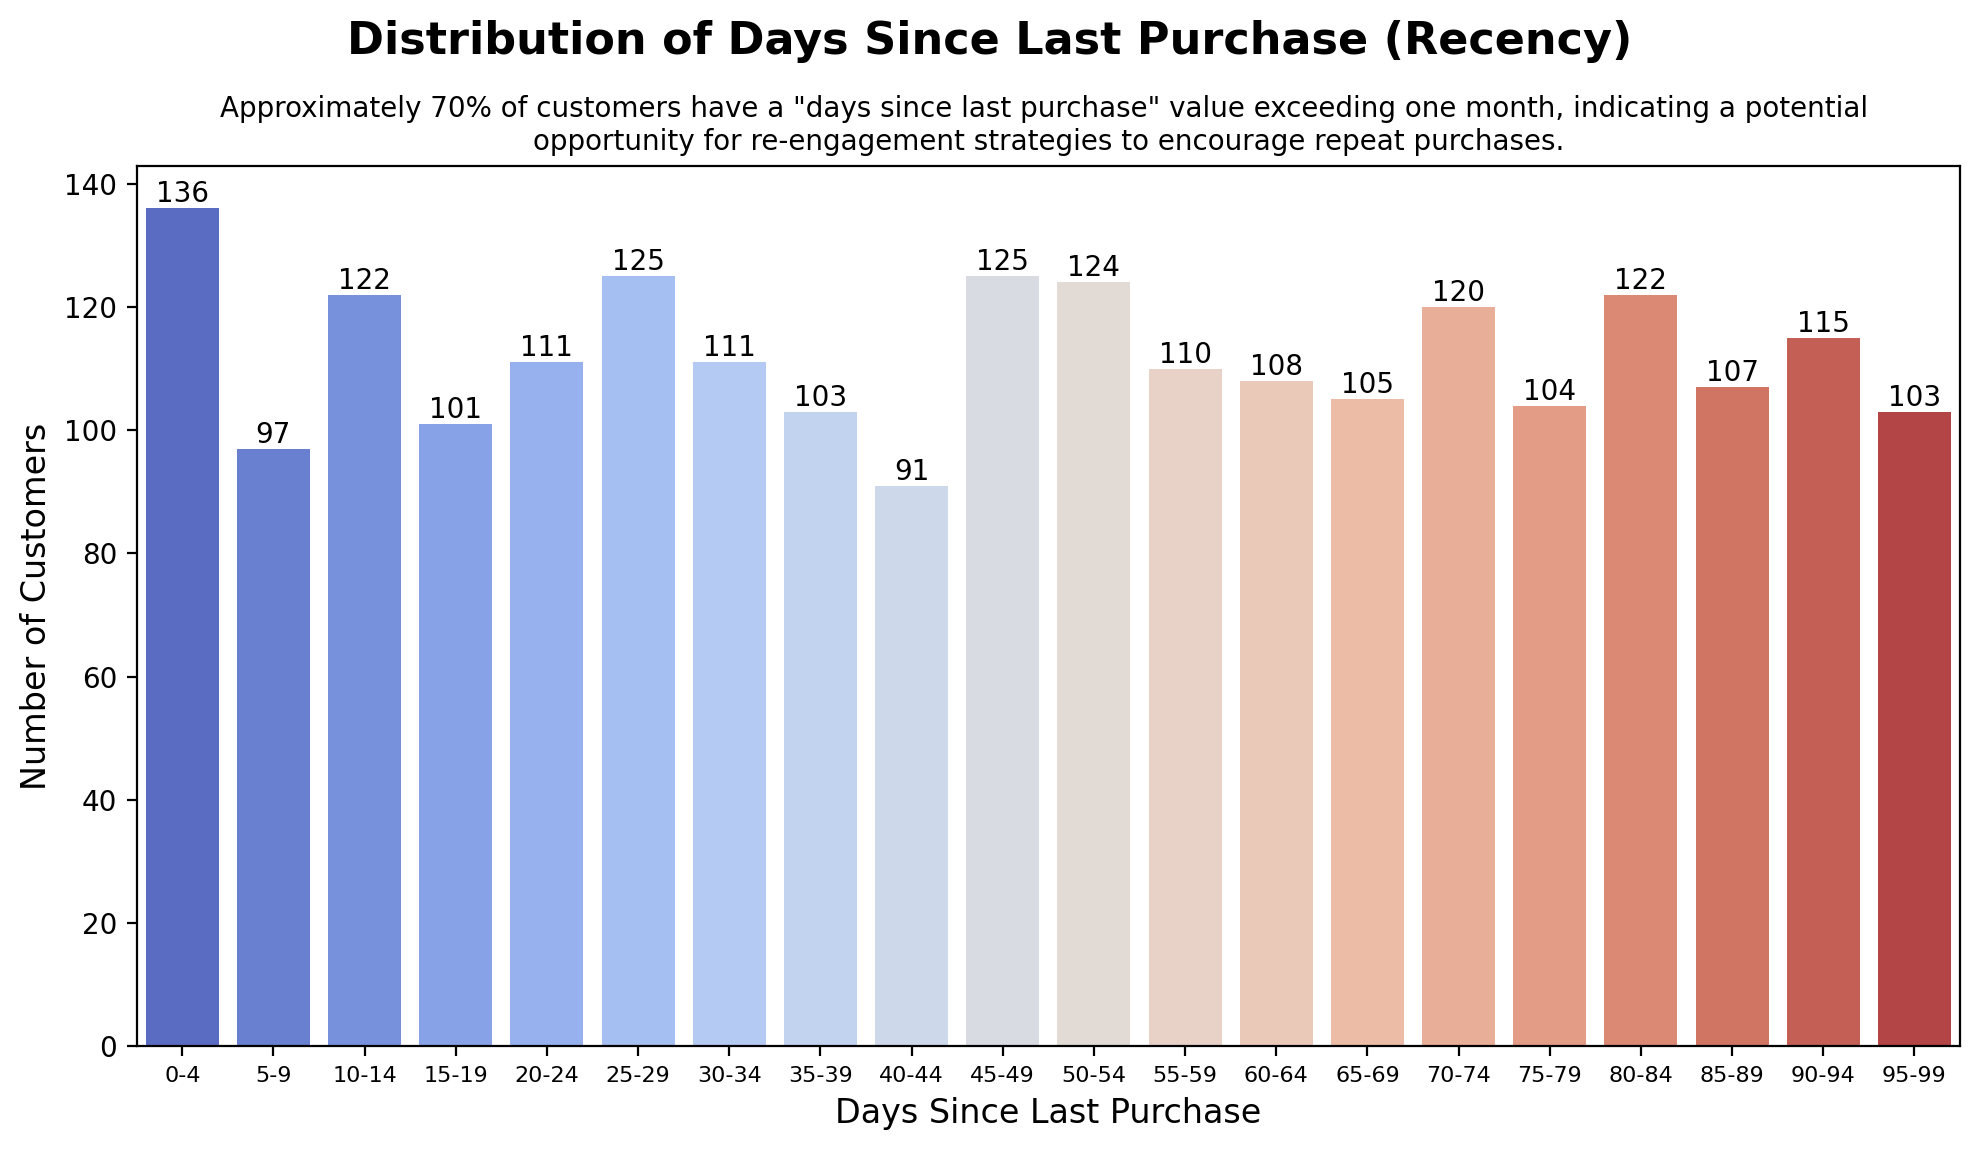

In [34]:
# Extract the class intervals and frequencies
class_labels = df_classes['Class']
frequencies = df_classes['f']

plt.figure(figsize=(10, 6), dpi=200)

# Create a bar plot for the class frequencies
sns.barplot(x=class_labels, y=frequencies, palette='coolwarm')

# Add text on top of each bar
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.suptitle("Distribution of Days Since Last Purchase (Recency)", fontsize=16, fontweight='bold', x=0.5, y=0.95)
plt.title("""
Approximately 70% of customers have a "days since last purchase" value exceeding one month, indicating a potential 
opportunity for re-engagement strategies to encourage repeat purchases.""", fontsize=10, ha='center')
plt.xlabel("Days Since Last Purchase", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(fontsize=8)
plt.tight_layout()
plt.savefig("Distribution of Days Since Last Purchase", dpi=300, bbox_inches='tight')
plt.show()

**Findings:**
- 50% of customers had last purchase under 44 days while others are over 45 days.
- Our customers with under 30 days since last purchase are only 30%.
- Company should engage customers to make a repeat order.

## Number of Purchase with Discount

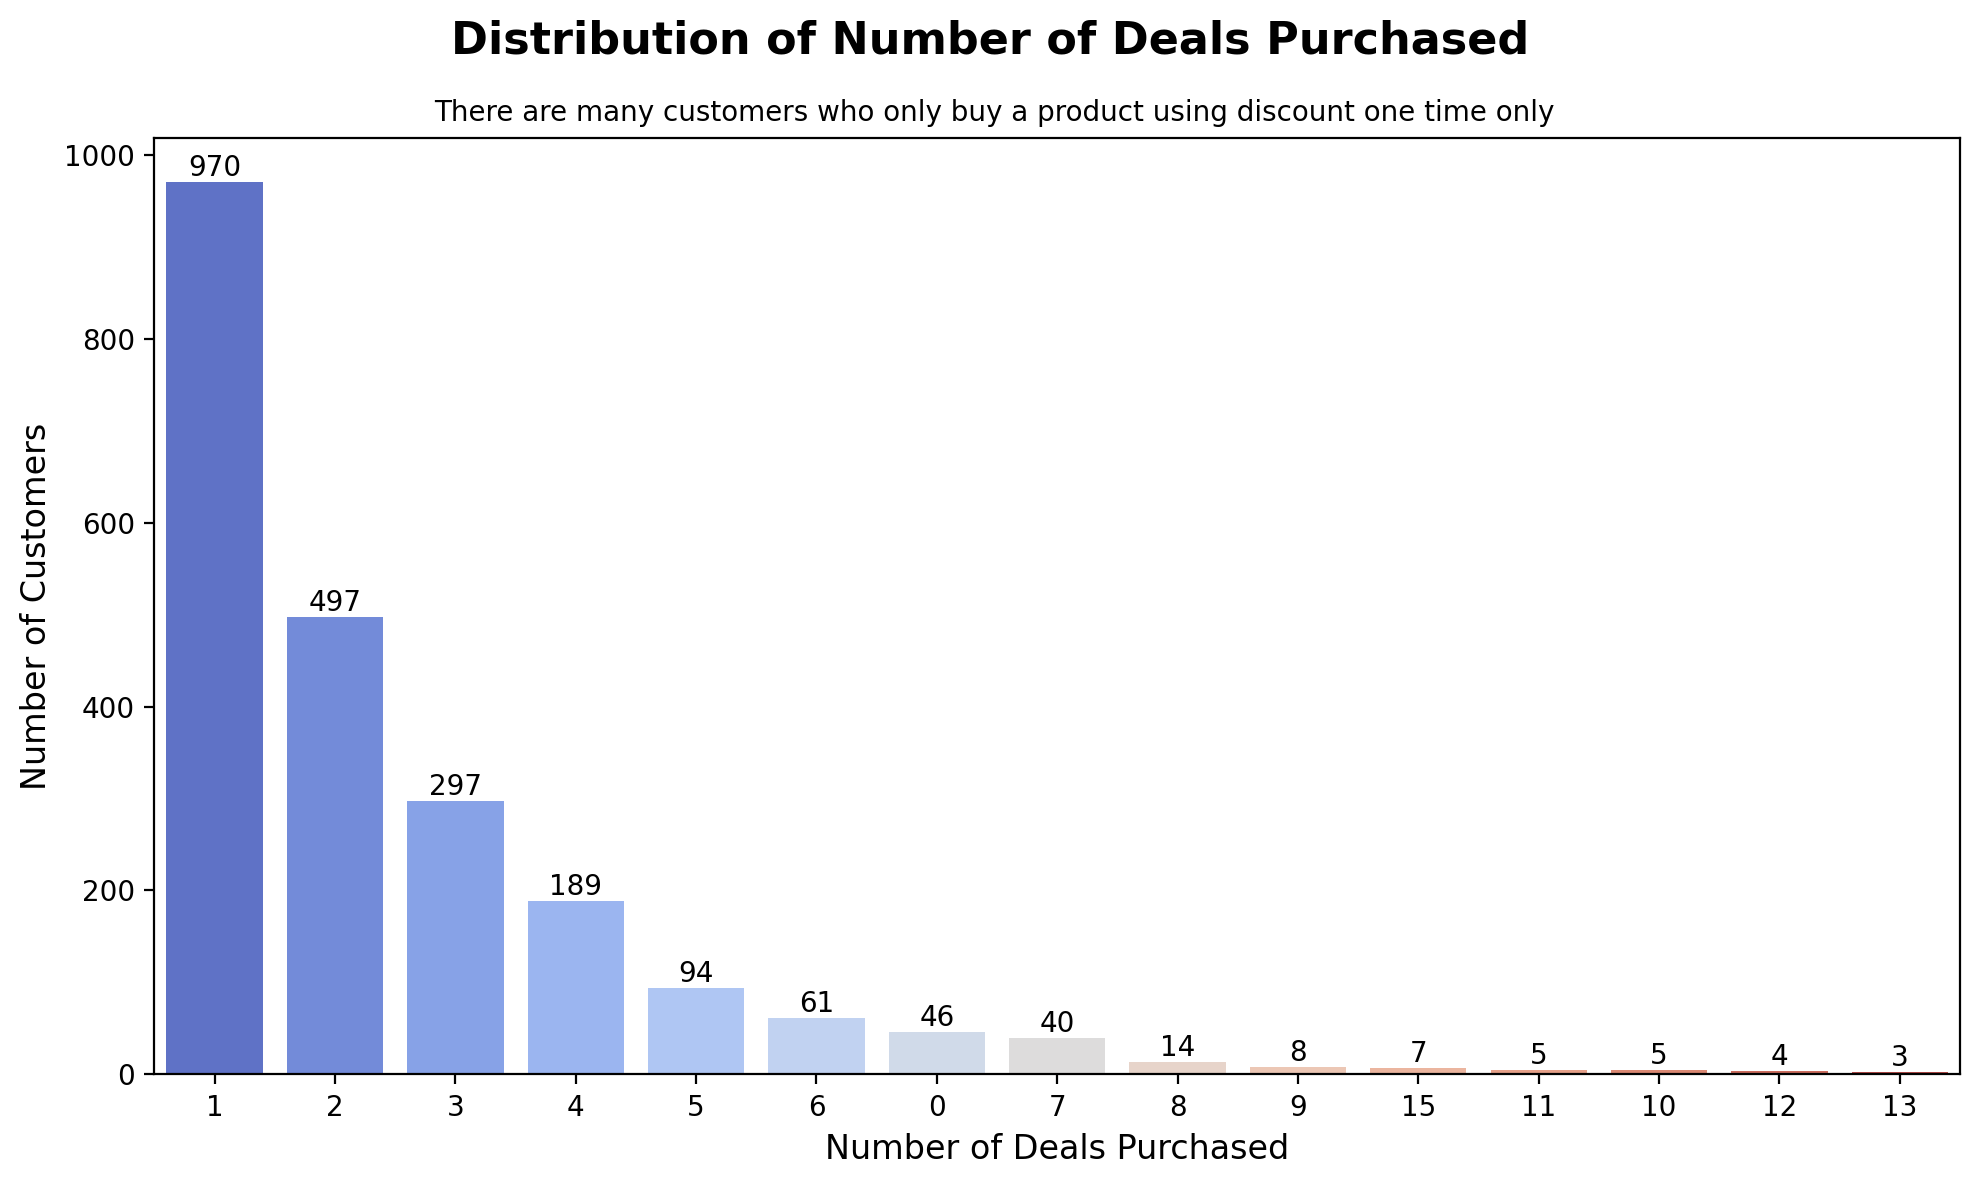

In [35]:
deals_prod = df['NumDealsPurchases'].value_counts()
deals_prod_sorted = deals_prod.sort_values(ascending=False)

plt.figure(figsize=(10, 6), dpi=200)

barplot = sns.barplot(x=deals_prod_sorted.index, 
                     y=deals_prod_sorted.values, 
                     order=deals_prod_sorted.index,  # Ensure the order is correct
                     palette='coolwarm')

for p in barplot.patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.suptitle("Distribution of Number of Deals Purchased", fontsize=16, fontweight='bold', x=0.5)
plt.title("There are many customers who only buy a product using discount one time only", fontsize=10, ha='center', x=0.465)
plt.xlabel('Number of Deals Purchased', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.tight_layout()
plt.savefig("Number of Deals Purchased", dpi=300, bbox_inches='tight')
plt.show()


**Findings:**
- So many customers who only one time buying our products using discount.
- There is a few customers who using discount more than 10 times.
- This indicates that a significant portion of the customer base engages with discounts or promotions on a one-time basis, suggesting they may not be loyal repeat customers.
- Given that a large portion of customers only makes one purchase, there is an opportunity to implement targeted marketing strategies aimed at converting these one-time buyers into repeat customers. Strategies could include loyalty programs, personalized offers, or follow-up communications to re-engage customers.

## Promo Effectiveness

In [36]:
df['ID'].duplicated().sum()

np.int64(0)

In [37]:
df[(df['AcceptedCmp1'] == 1) & (df['Response'] == 1)].sample(2)


ID  Year_Birth Education Marital_Status       Income  Kidhome  \
203   2798        1977        S3    Bertunangan  102160000.0        0   
1100  5538        1975        S1          Cerai   83829000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
203          0  2012-11-02       54   763000      29000           138000   
1100         0  2013-10-08       78   897000     161000           430000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
203             76000            176000         58000                  0   
1100           186000            161000         27000                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
203                 7                    9                 10   
1100                4                    7                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
203                   4             0             1             1   
1100                  1             1             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
203              1             0         0              3         11   
1100             1             0         0              3         11   

      Response  Enroll_day  Enroll_month  Enroll_year  Enroll_tenure (days)  \
203          1           2            11         2012                   604   
1100         1           8            10         2013                   264   

      Age  
203    37  
1100   39

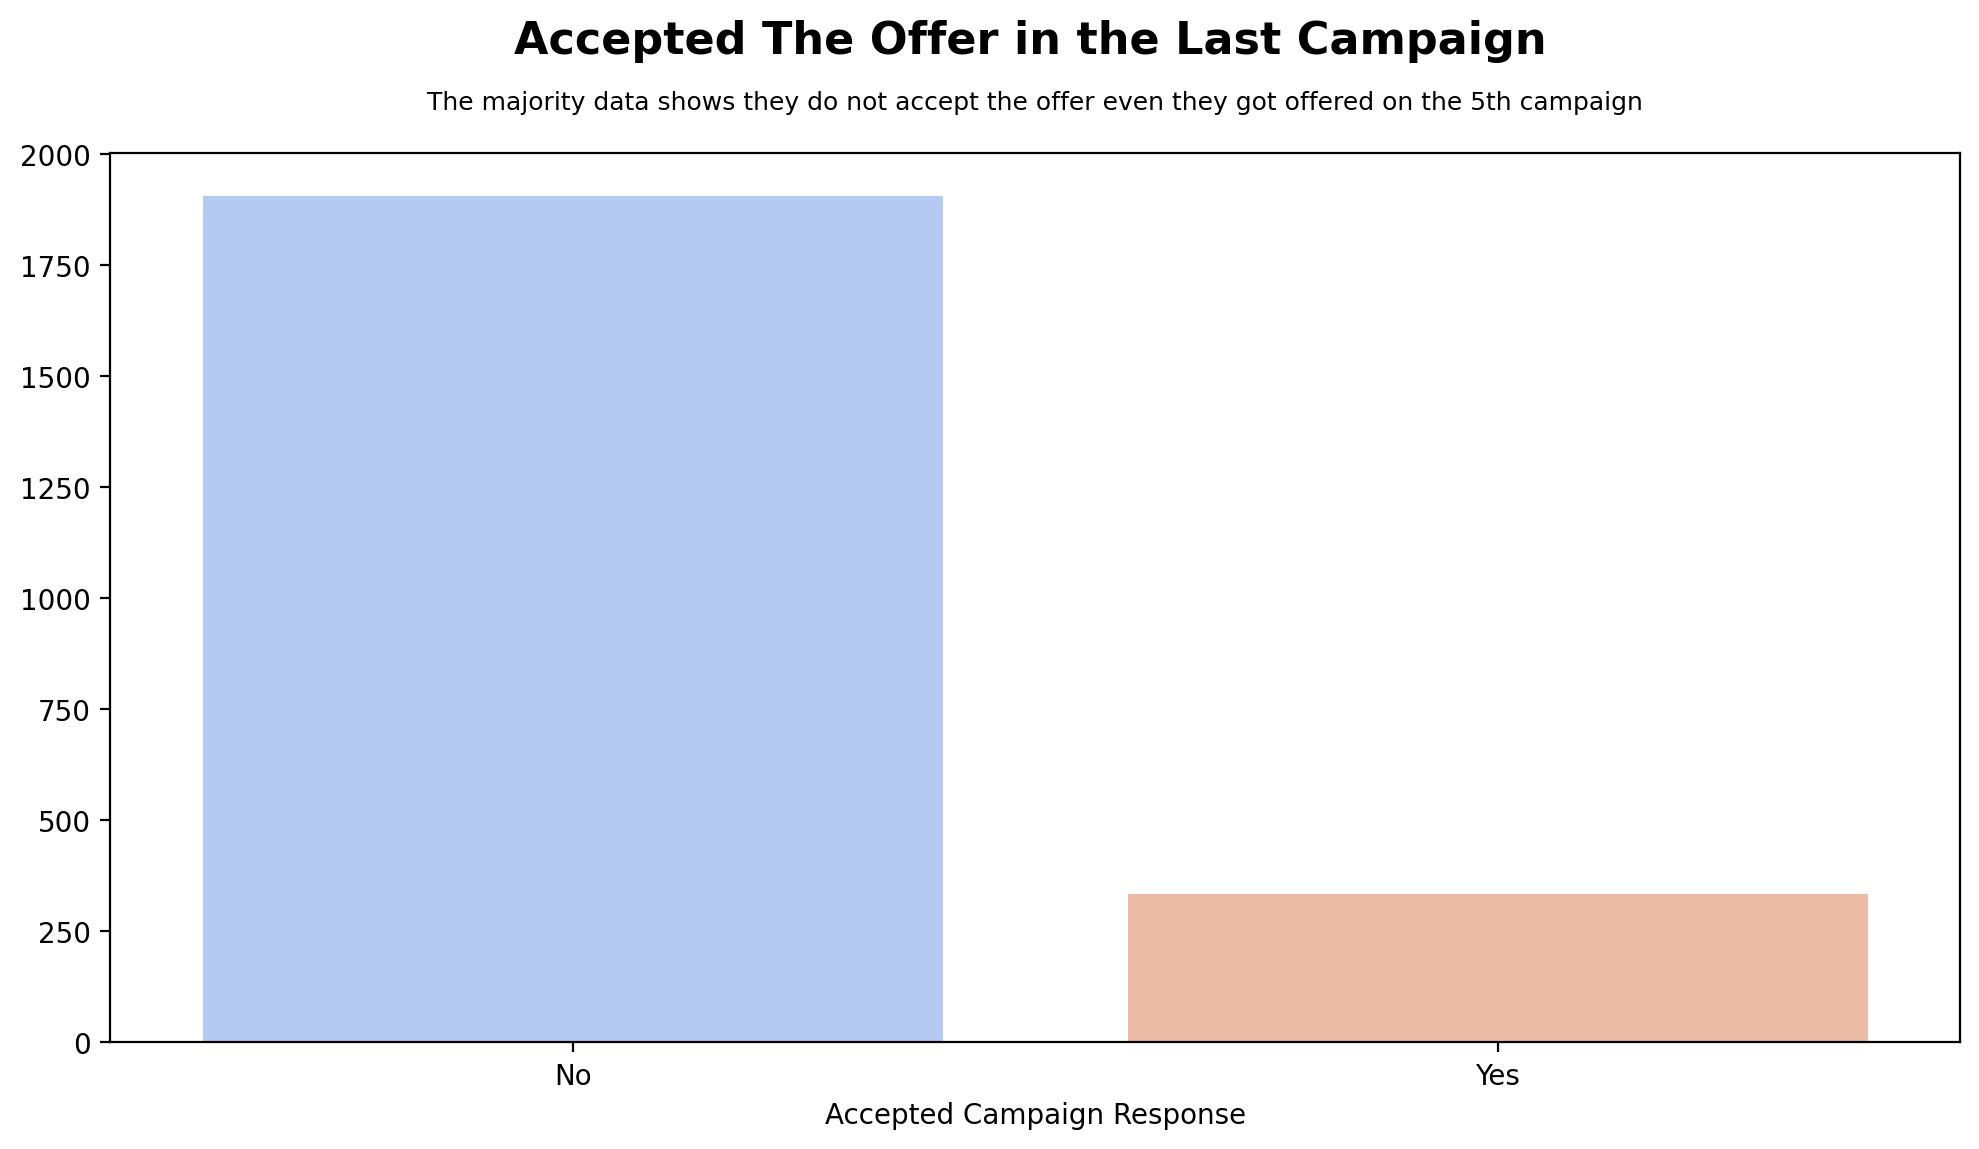

In [38]:
df_response = df['Response'].value_counts()
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(x=df_response.index, y=df_response.values, palette='coolwarm')
plt.suptitle('Accepted The Offer in the Last Campaign', fontsize=16, fontweight='bold',x=0.52, y=0.95)
plt.title("""
The majority data shows they do not accept the offer even they got offered on the 5th campaign
""", fontsize=9, )
plt.xlabel("Accepted Campaign Response")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.savefig("Accepted Promotion", dpi=300, bbox_inches='tight')
plt.show()

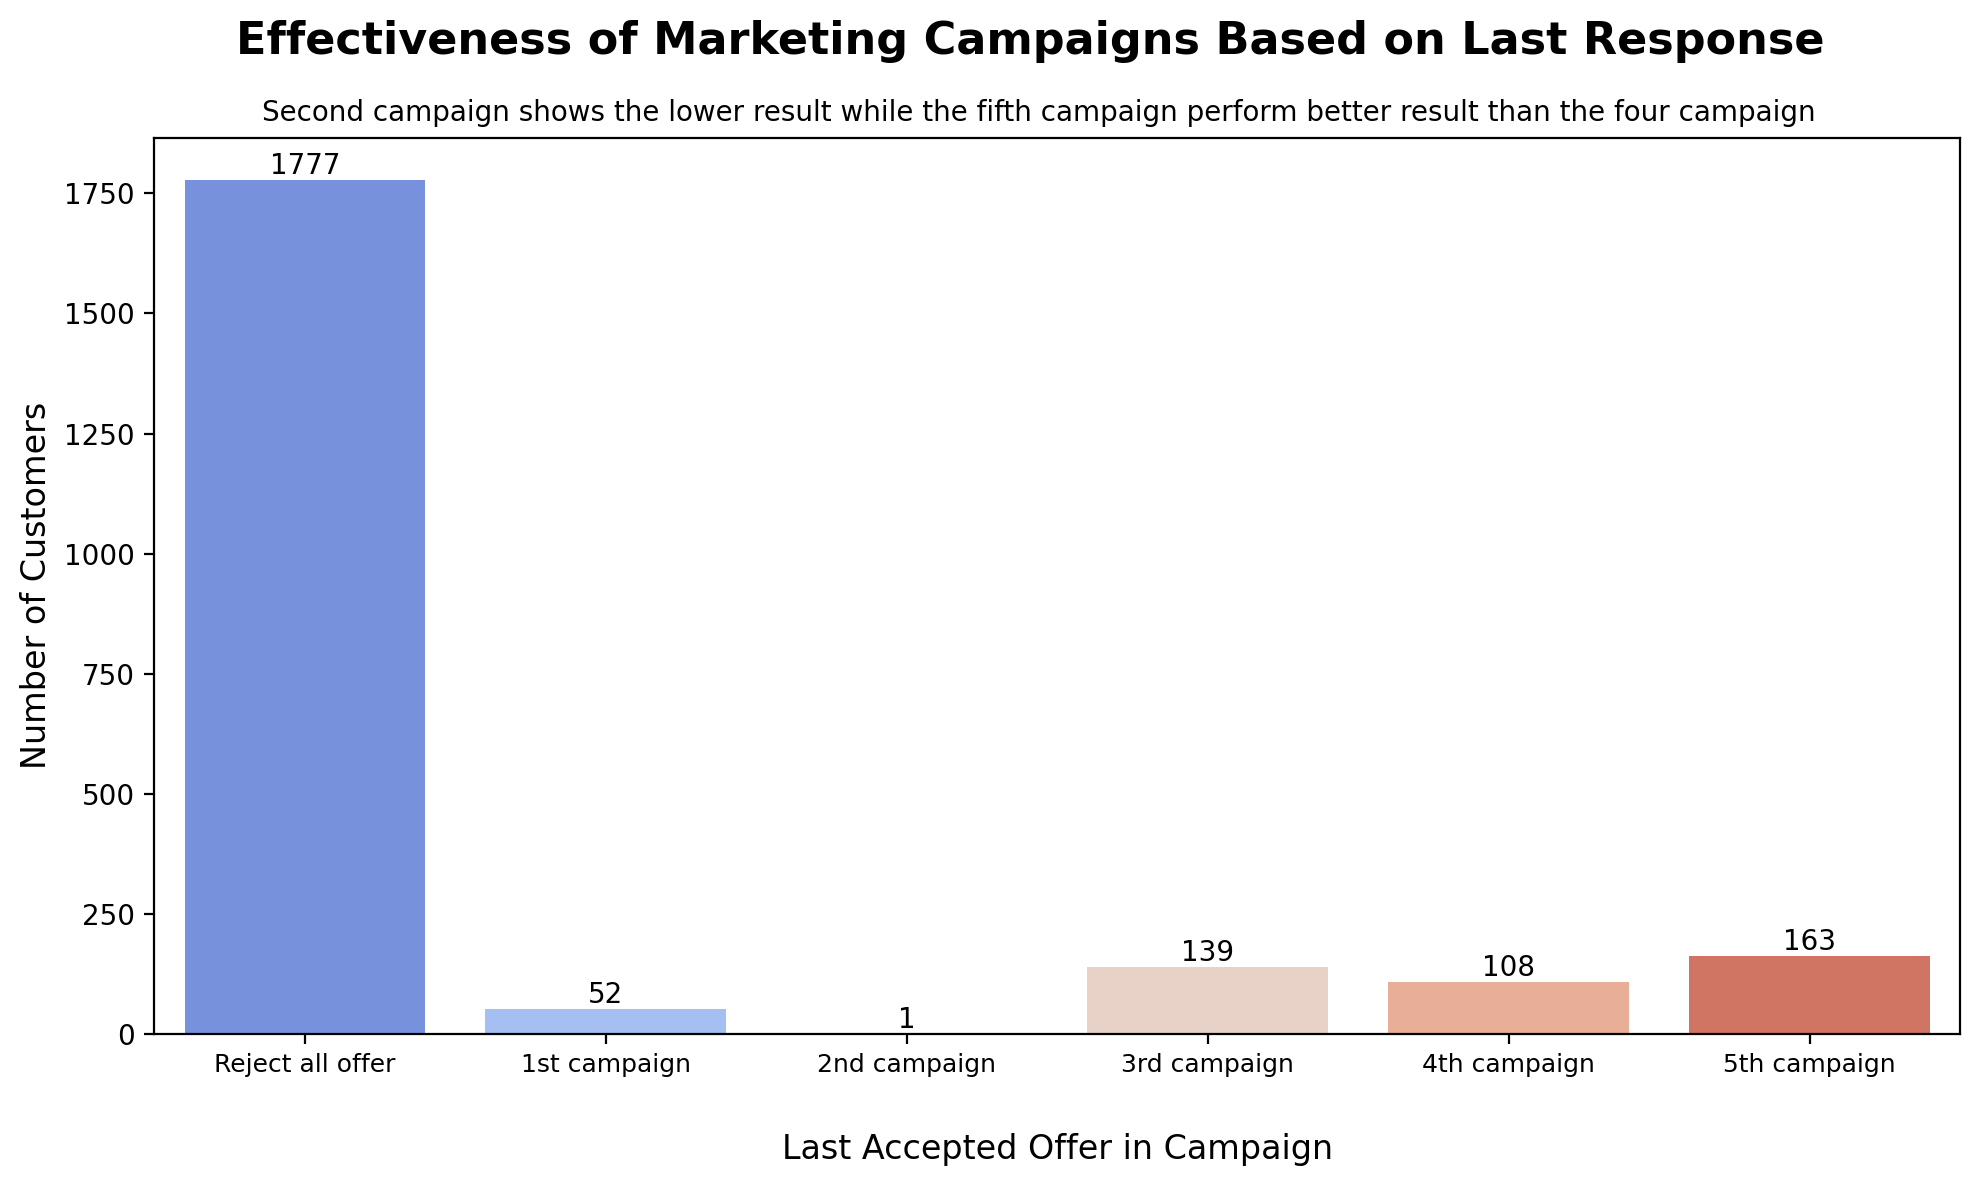

In [39]:
# Create a new column for the last accepted campaign
def get_last_campaign(row):
    if row['AcceptedCmp5'] == 1:
        return 5
    elif row['AcceptedCmp4'] == 1:
        return 4
    elif row['AcceptedCmp3'] == 1:
        return 3
    elif row['AcceptedCmp2'] == 1:
        return 2
    elif row['AcceptedCmp1'] == 1:
        return 1
    else:
        return 0  # No campaign accepted

# Apply the function to create a new column
df_campaign = df.copy()
df_campaign['Last_Campaign'] = df_campaign.apply(get_last_campaign, axis=1)
response_counts = df_campaign['Last_Campaign'].value_counts().sort_index()

plt.figure(figsize=(10, 6), dpi=200)
barplot = sns.barplot(x=response_counts.index, y=response_counts.values, palette='coolwarm')

for p in barplot.patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.suptitle("Effectiveness of Marketing Campaigns Based on Last Response", fontsize=16, fontweight='bold', x=0.52)
plt.title("Second campaign shows the lower result while the fifth campaign perform better result than the four campaign", fontsize=10, ha='center', x=0.49)
plt.xlabel('Last Accepted Offer in Campaign', fontsize=12, labelpad=20)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks([0,1,2,3,4,5], ['Reject all offer',
                           '1st campaign',
                           '2nd campaign',
                           '3rd campaign',
                           '4th campaign',
                           '5th campaign'], fontsize=9)
plt.tight_layout()
plt.savefig("Effectiveness of Marketing Campaigns Based on Last Response", dpi=300, bbox_inches='tight')
plt.show()

# Bivariate Analysis

## Customer's Spend Amount on Products

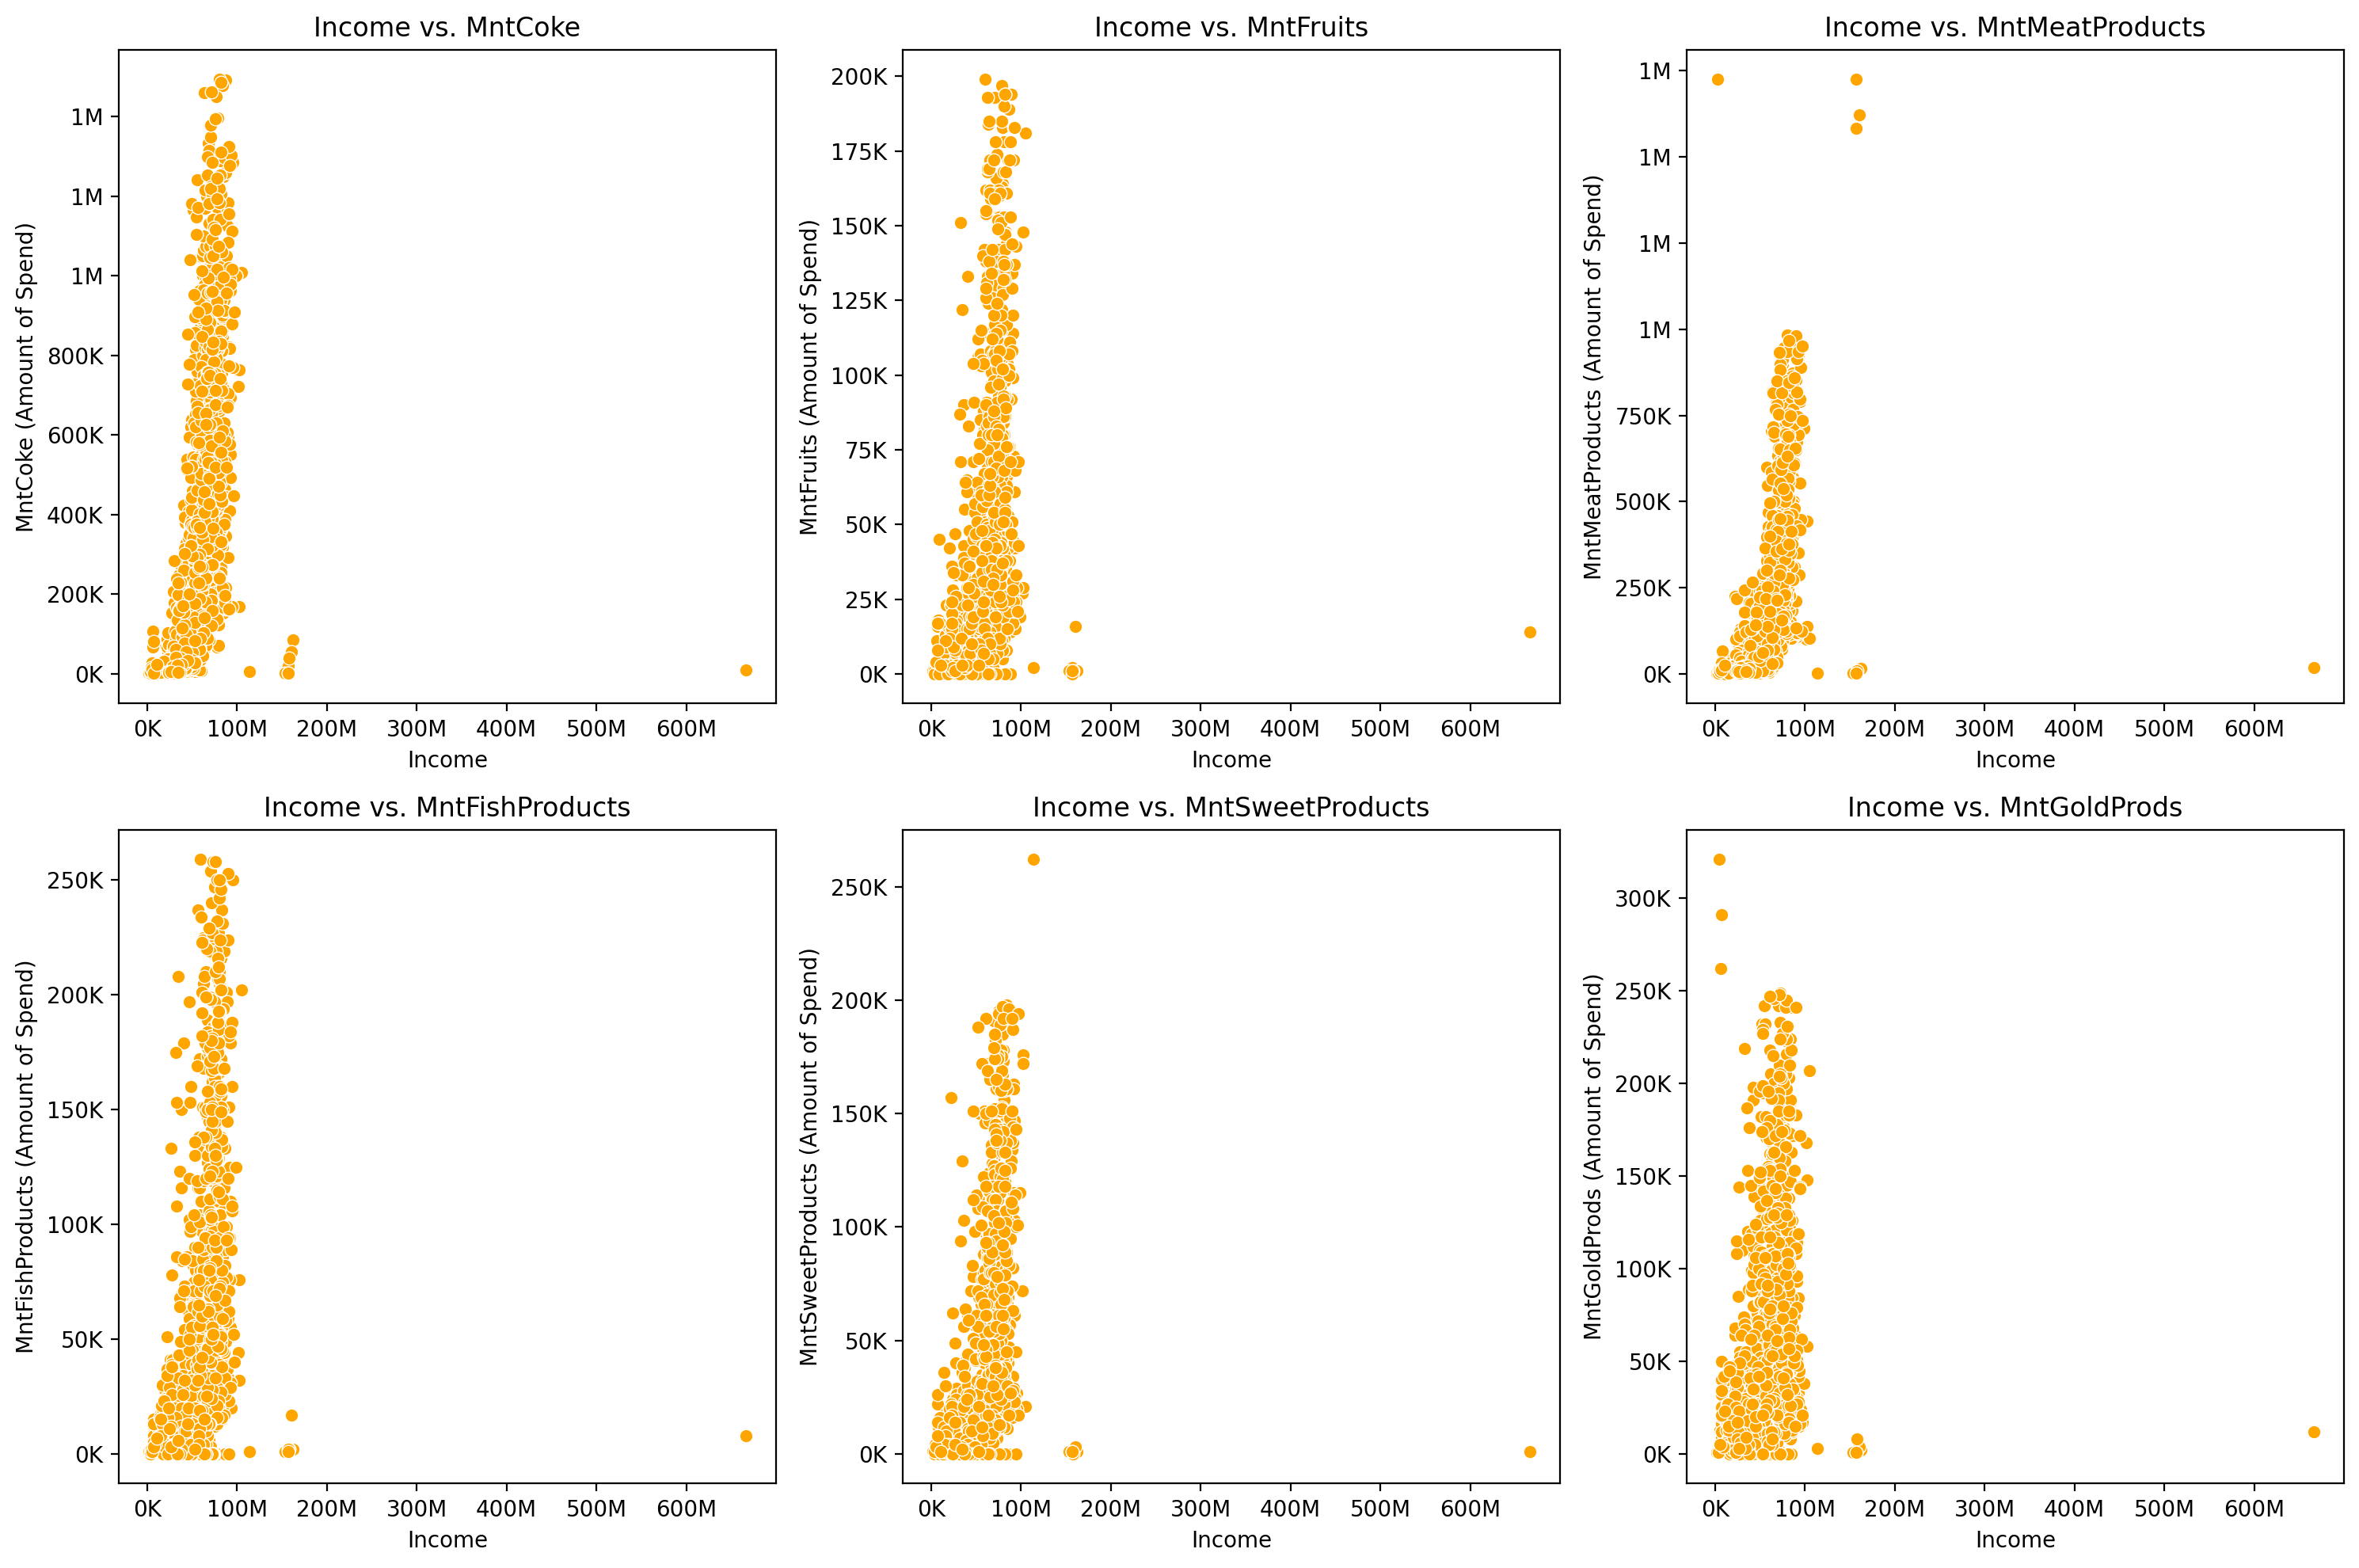

In [40]:
import matplotlib.ticker as ticker

col = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

num_cols = 3
num_rows = (len(col) // num_cols) + (len(col) % num_cols > 0)

plt.figure(figsize=(15, num_rows * 5), dpi=200)

for i, product in enumerate(col):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=df, x='Income', y=product, color='orange')
    plt.title(f'Income vs. {product}')
    plt.xlabel('Income')
    plt.ylabel(f'{product} (Amount of Spend)')

    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M' if x >= 1e6 else f'{int(x / 1e3)}K'))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y / 1e6)}M' if y >= 1e6 else f'{int(y / 1e3)}K'))

plt.tight_layout()
plt.savefig("Customer's Spend Amount on Products", dpi=300, bbox_inches='tight')
plt.show()

There are an extreme outliers in every graphic, indicating the lower income tend to buy more products than the higher income customers. We will drop the outliers to see further detail about the pattern.

In [41]:
df[df['Income'].isin(df['Income'].nlargest(10))].sort_values(by='Income', ascending=False)

ID  Year_Birth Education Marital_Status       Income  Kidhome  \
2233   9432        1977        S1    Bertunangan  666666000.0        1   
617    1503        1976        S3    Bertunangan  162397000.0        1   
687    1501        1982        S3        Menikah  160803000.0        0   
1300   5336        1971        S2    Bertunangan  157733000.0        1   
164    8475        1973        S3        Menikah  157243000.0        0   
1653   4931        1977        S1    Bertunangan  157146000.0        0   
2132  11181        1949        S3        Menikah  156924000.0        0   
655    5555        1975        S1          Cerai  153924000.0        0   
1898   4619        1945        S3         Lajang  113734000.0        0   
646    4611        1970        S1    Bertunangan  105471000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
2233         0  2013-06-02       23     9000      14000            18000   
617          1  2013-06-03       31    85000       1000            16000   
687          0  2012-08-04       21    55000      16000          1622000   
1300         0  2013-06-04       37    39000       1000             9000   
164          1  2014-03-01       98    20000       2000          1582000   
1653         0  2013-04-29       13     1000          0          1725000   
2132         0  2013-08-29       85     2000       1000             2000   
655          0  2014-02-07       81     1000       1000             1000   
1898         0  2014-05-28        9     6000       2000             3000   
646          0  2013-01-21       36  1009000     181000           104000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233             8000              1000         12000                  4   
617              2000              1000          2000                  0   
687             17000              3000          4000                 15   
1300             2000                 0          8000                  0   
164              1000              2000          1000                 15   
1653             2000              1000          1000                  0   
2132             1000              1000          1000                  0   
655              1000              1000          1000                  0   
1898             1000            262000          3000                  0   
646            202000             21000        207000                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   
617                 0                    0                  1   
687                 0                   28                  1   
1300                1                    0                  1   
164                 0                   22                  0   
1653                0                   28                  0   
2132                0                    0                  0   
655                 0                    0                  0   
1898               27                    0                  0   
646                 9                    8                 13   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   
617                   1             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
164                   0             0             0             0   
1653                  1             0             0             0   
2132                  0             0             0             0   
655                   0             0             0             0   
1898                  1             0             0             0   
646                   3             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  

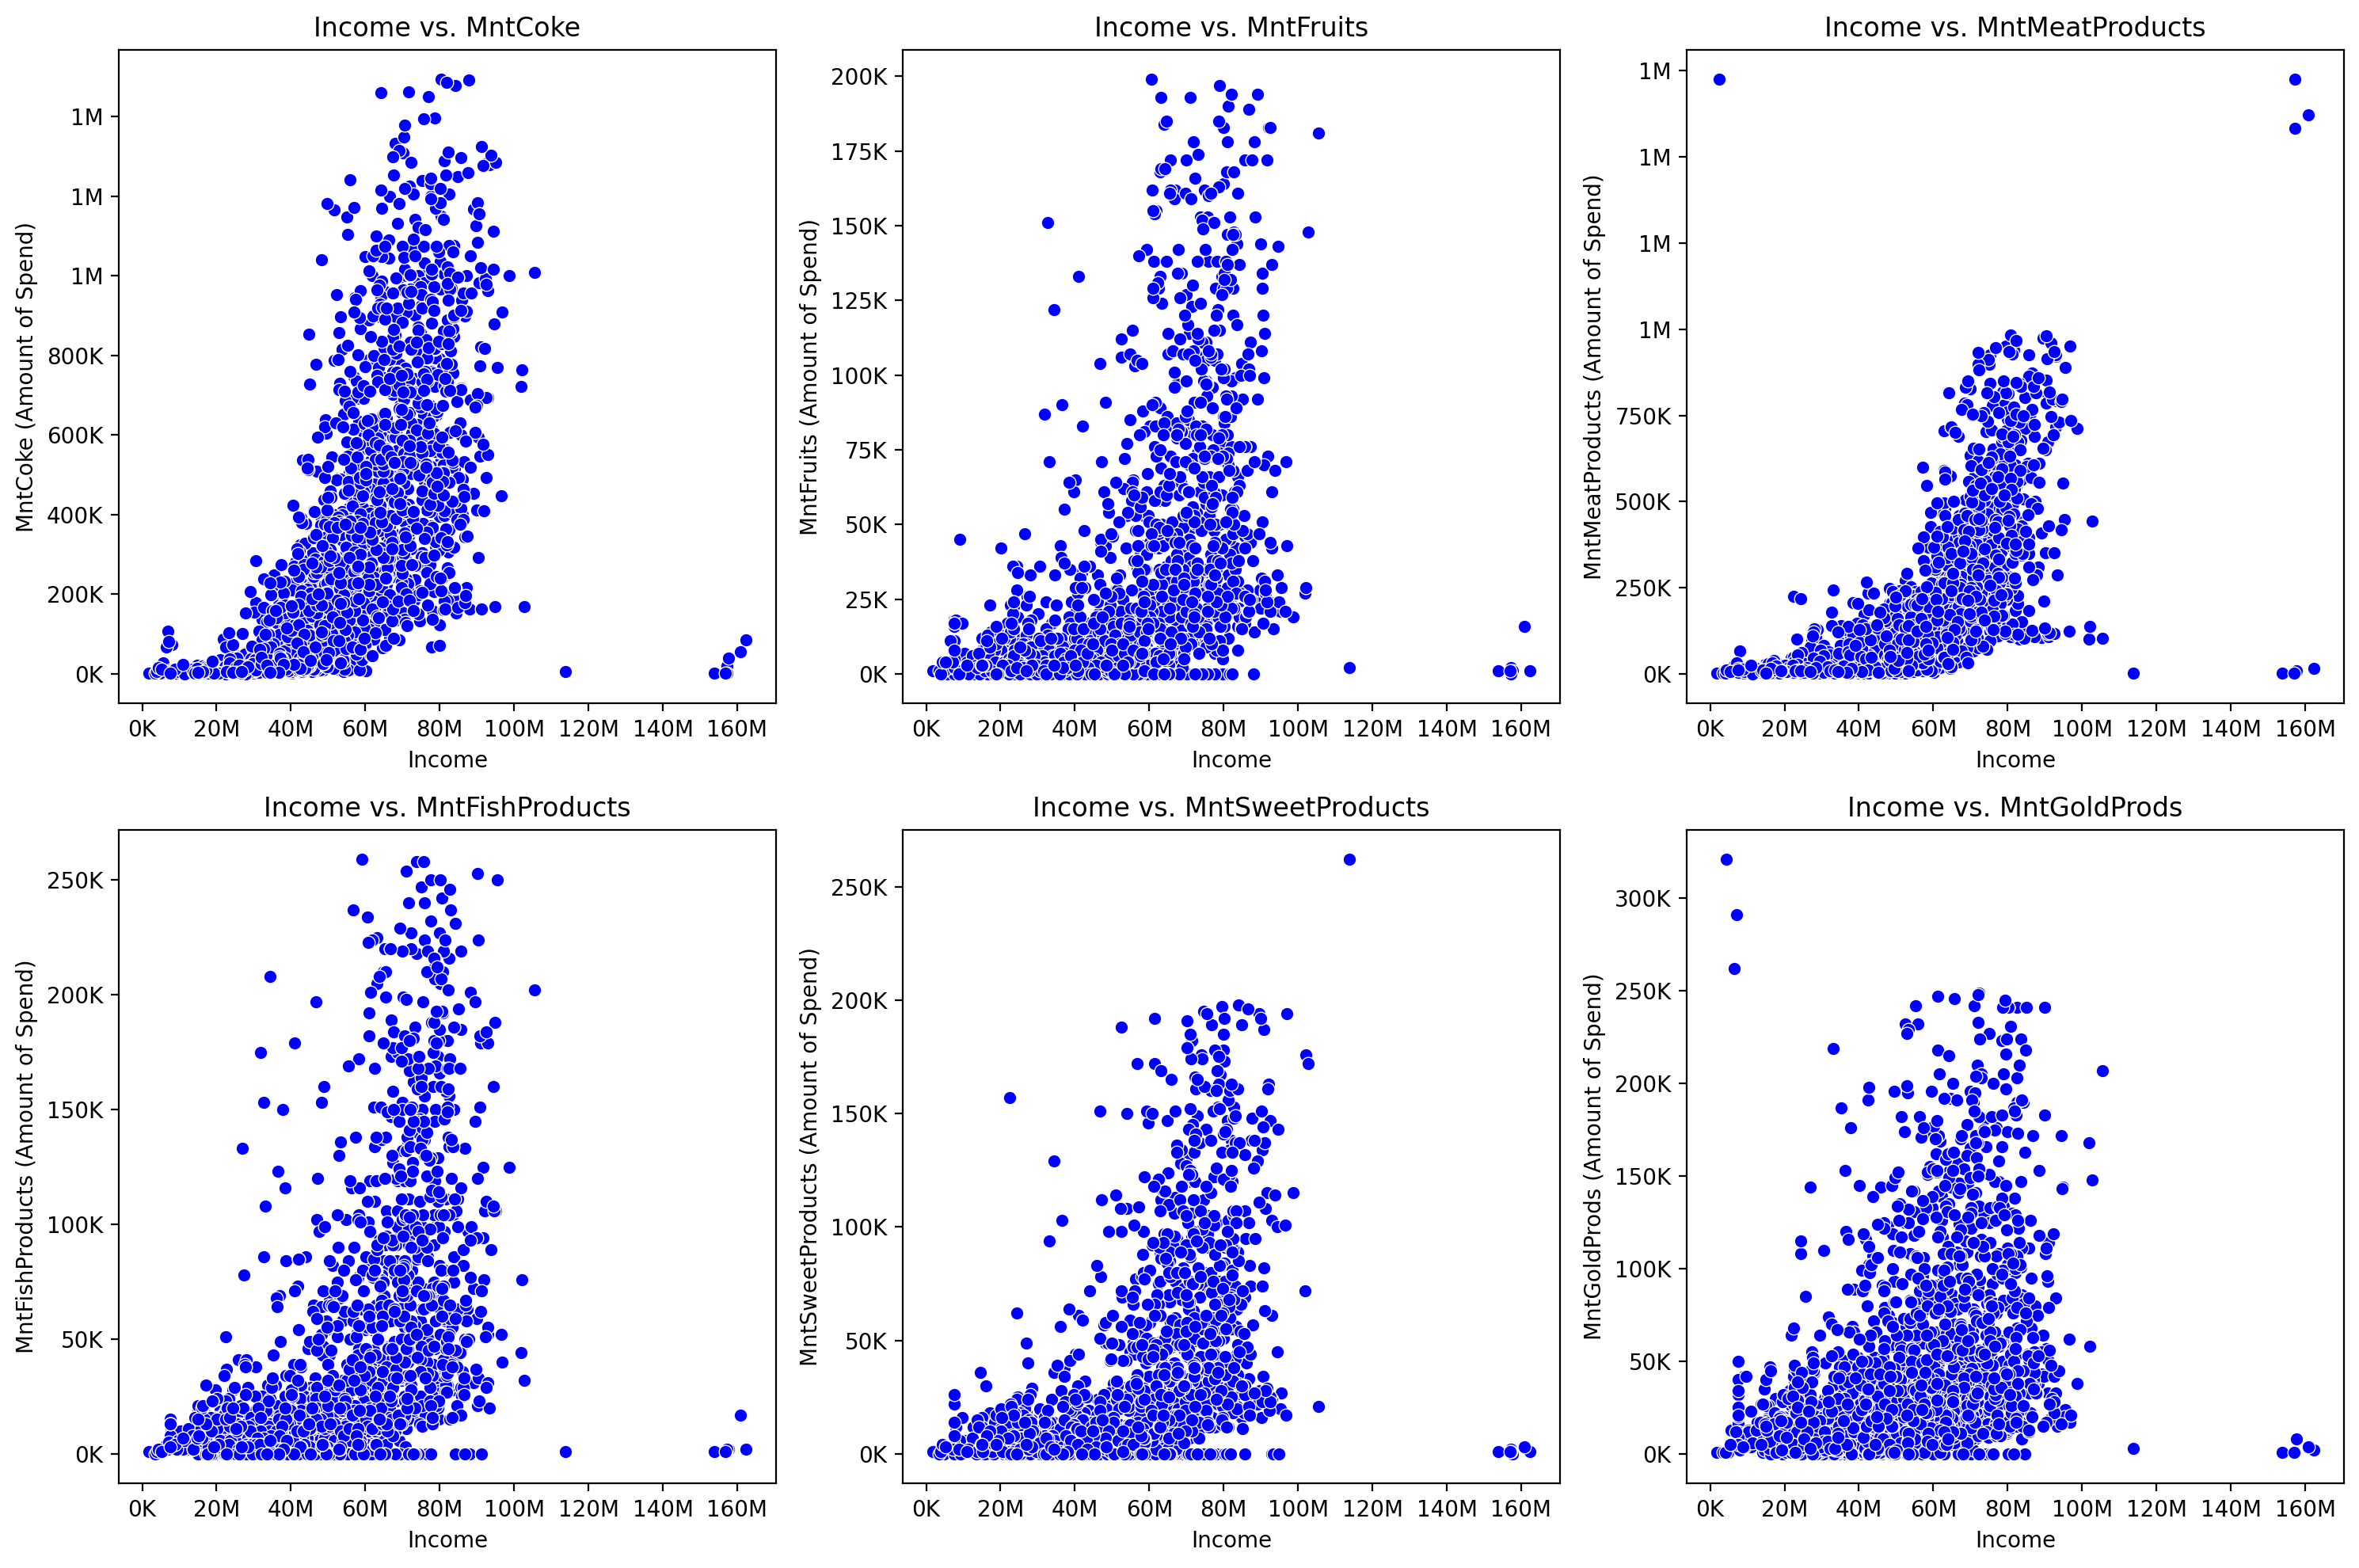

In [42]:
col = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

num_cols = 3
num_rows = (len(col) // num_cols) + (len(col) % num_cols > 0)

df_drop = df.copy()
df_drop = df_drop.drop(df_drop[df_drop['Income'] == df_drop['Income'].max()].index)

plt.figure(figsize=(15, num_rows * 5), dpi=200)

for i, product in enumerate(col):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=df_drop, x='Income', y=product, color='blue')
    plt.title(f'Income vs. {product}')
    plt.xlabel('Income')
    plt.ylabel(f'{product} (Amount of Spend)')
    
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M' if x >= 1e6 else f'{int(x / 1e3)}K'))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y / 1e6)}M' if y >= 1e6 else f'{int(y / 1e3)}K'))

plt.tight_layout()
plt.savefig("Customer's Spend Amount on Products (Drop Extreme Outliers)", dpi=300, bbox_inches='tight')
plt.show()

By dropping the max value (outlier), there are still some outliers with **income** around **150M - 160M** and there is interesting finding where some people with these income have a high amount of purchase on **meat products**.

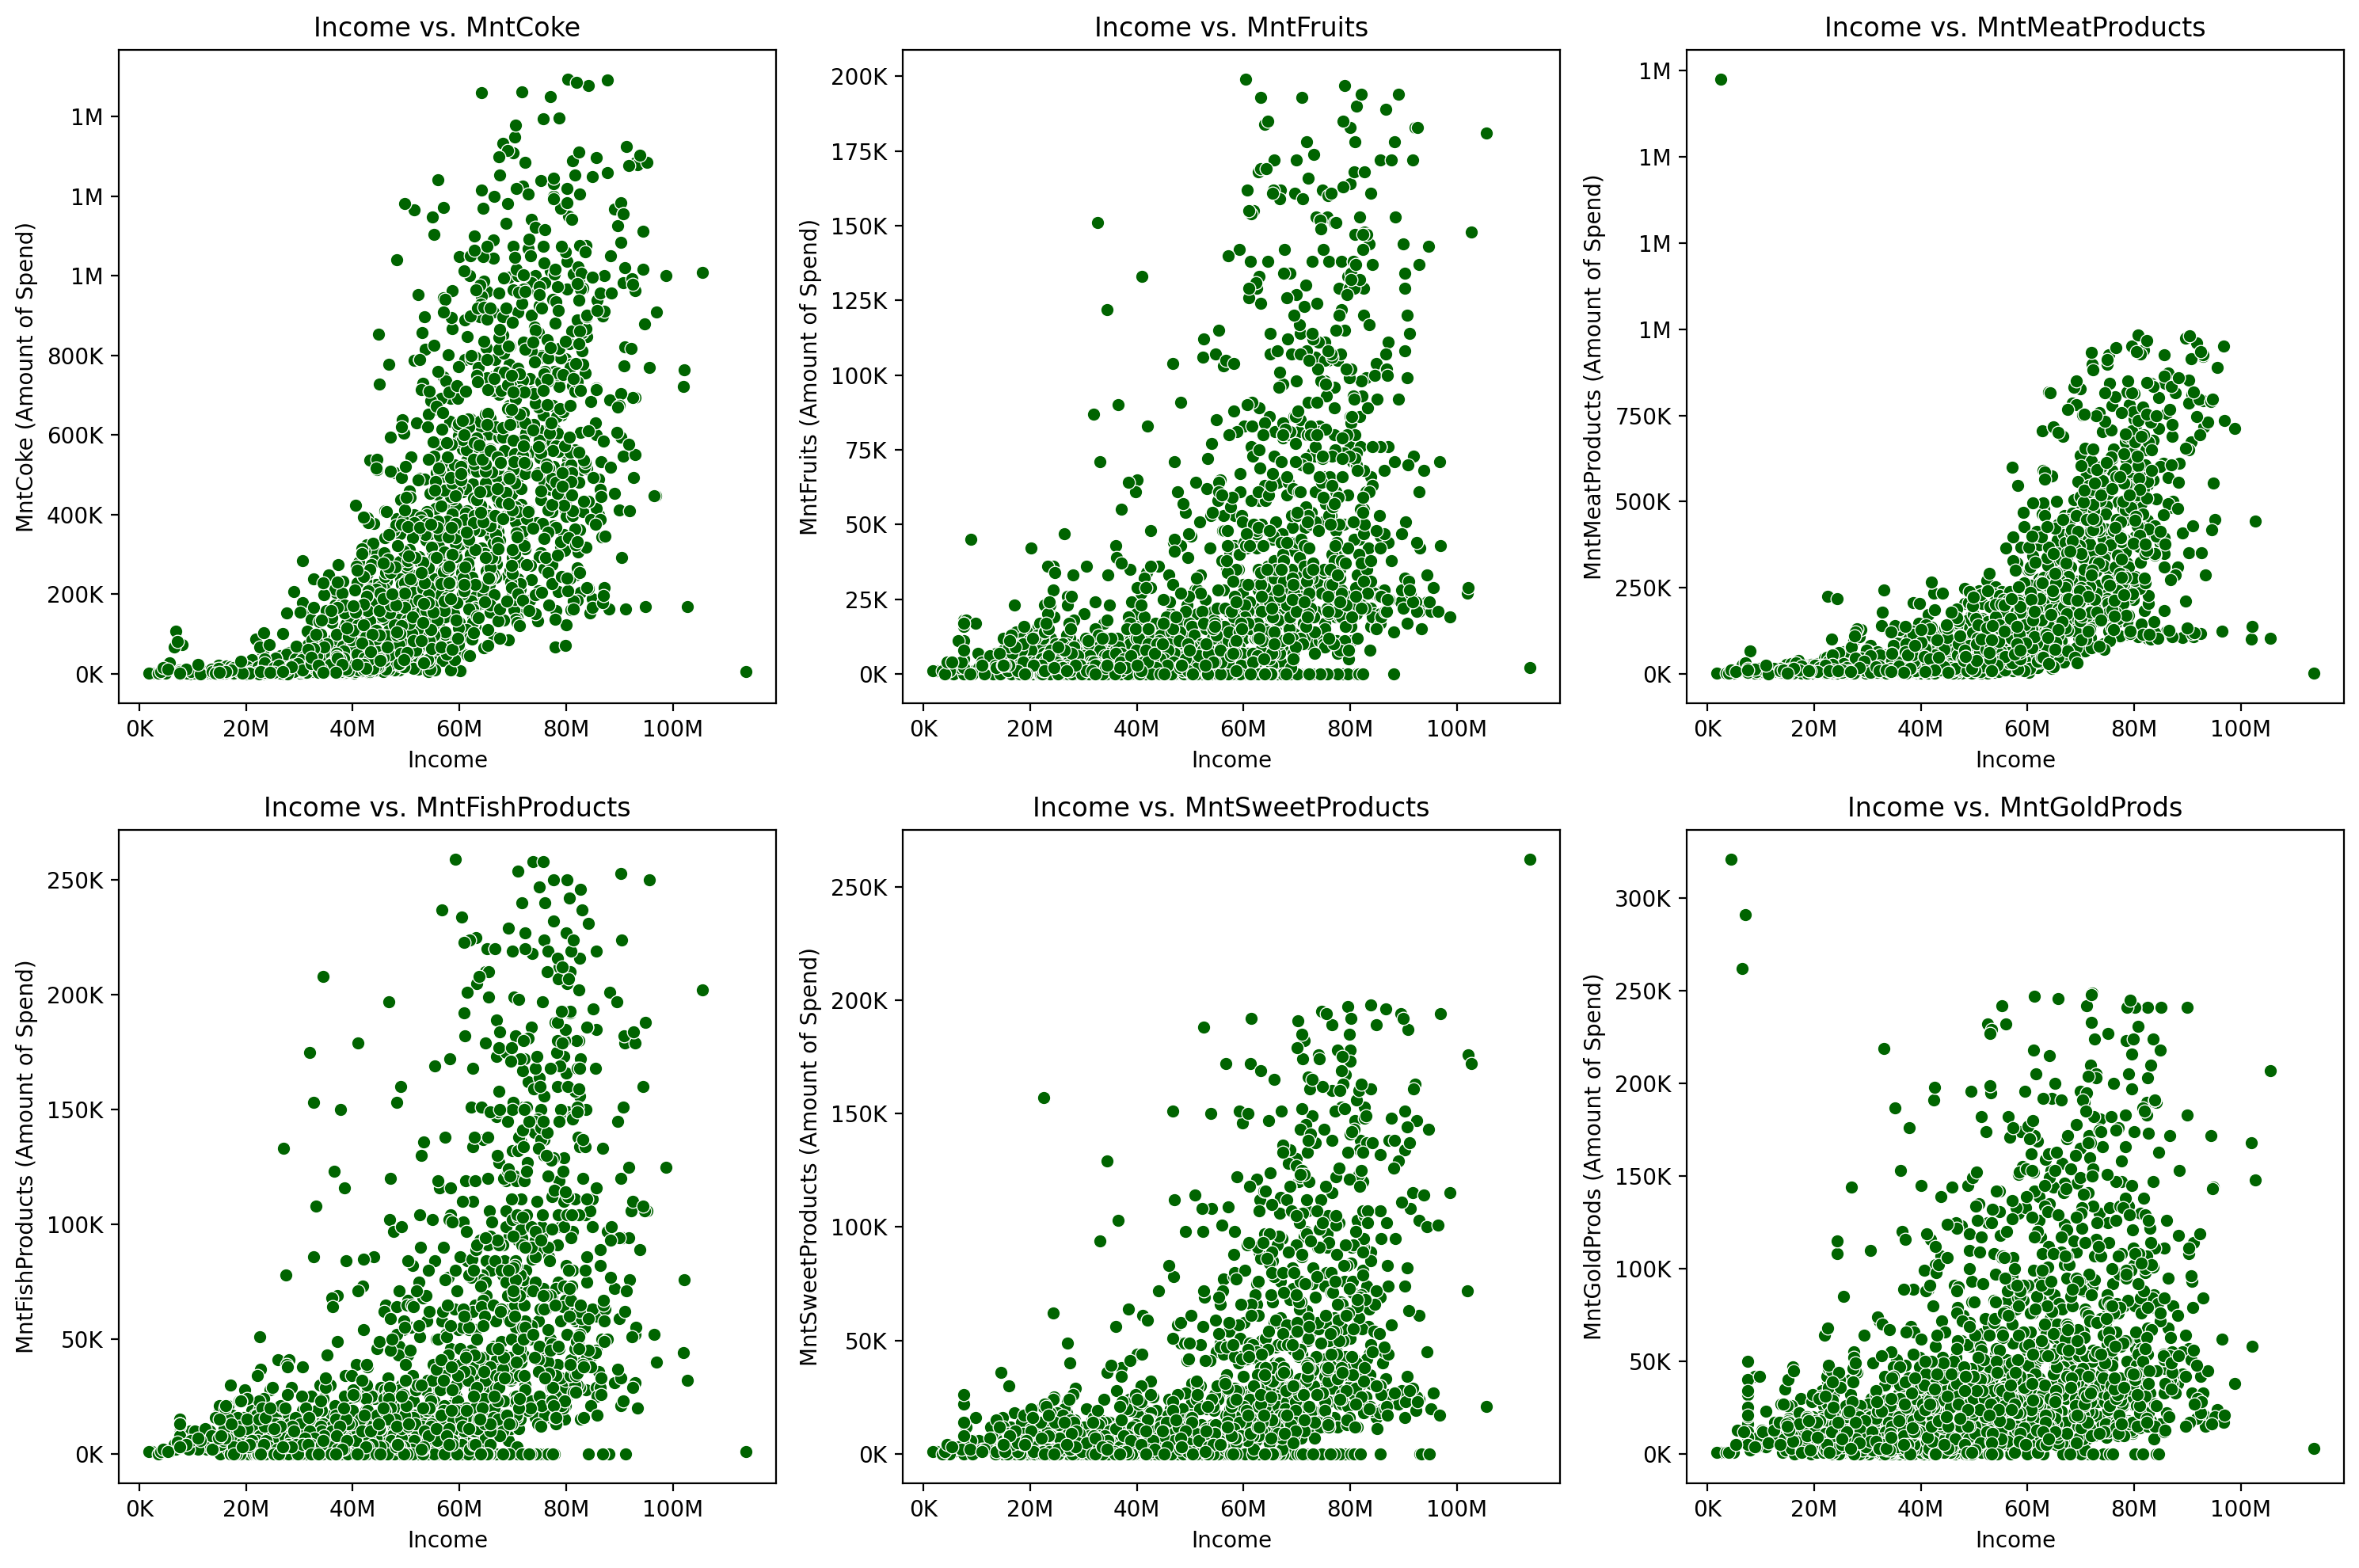

In [43]:
col = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

num_cols = 3
num_rows = (len(col) // num_cols) + (len(col) % num_cols > 0)

df_drop = df.copy()
df_drop = df_drop.drop(df_drop[df_drop['Income'].isin(df_drop['Income'].nlargest(8))].index)

plt.figure(figsize=(15, num_rows * 5), dpi=200)

for i, product in enumerate(col):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=df_drop, x='Income', y=product, color='darkgreen')
    plt.title(f'Income vs. {product}')
    plt.xlabel('Income')
    plt.ylabel(f'{product} (Amount of Spend)')

    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M' if x >= 1e6 else f'{int(x / 1e3)}K'))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y / 1e6)}M' if y >= 1e6 else f'{int(y / 1e3)}K'))
    
plt.tight_layout()
plt.savefig("Customer's Spend Amount on Products (Drop Outliers)", dpi=300, bbox_inches='tight')
plt.show()

Looking at these scatter plot, we can see that people tend to buy products with income around 60M - 80M.

**Findings:**
- Customers with incomes between **60M and 80M** tend to purchase a **variety of products**. This indicates that this **income bracket** is a **key demographic** for **targeted marketing** efforts.
- A customer with an income of** 666M** shows a **lower spending amount** across **all product categories**. This raises questions about whether this income level is an anomaly or if the customer is simply not engaging much with our platform over the past two years.
- Customers with incomes between **150M and 160M** demonstrate a **high purchasing volume** for **meat products**. This segment could be targeted as a **special market** for tailored promotions and offerings.
- All product categories display **a positive correlation** with income, suggesting that higher income levels are associated with increased spending across all products. However, the variability in purchases differs by product category, with MntGoldProds showing the highest concentration of spending among customers in the 60M to 80M income range.

## Purchase Platform (Website vs Catalogue vs Offline Store)

In [44]:
print(f'Number of purchase on web: {df['NumWebPurchases'].unique()}')
print(f'Number of purchase on catalogue: {df['NumCatalogPurchases'].unique()}')
print(f'Number of purchase on Store: {df['NumStorePurchases'].unique()}')

Number of purchase on web: [ 8  1  2  5  6  7  4  3 11  0 27 10  9 23 25]
Number of purchase on catalogue: [10  1  2  0  3  4  6 28  9  5  8  7 11 22]
Number of purchase on Store: [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]


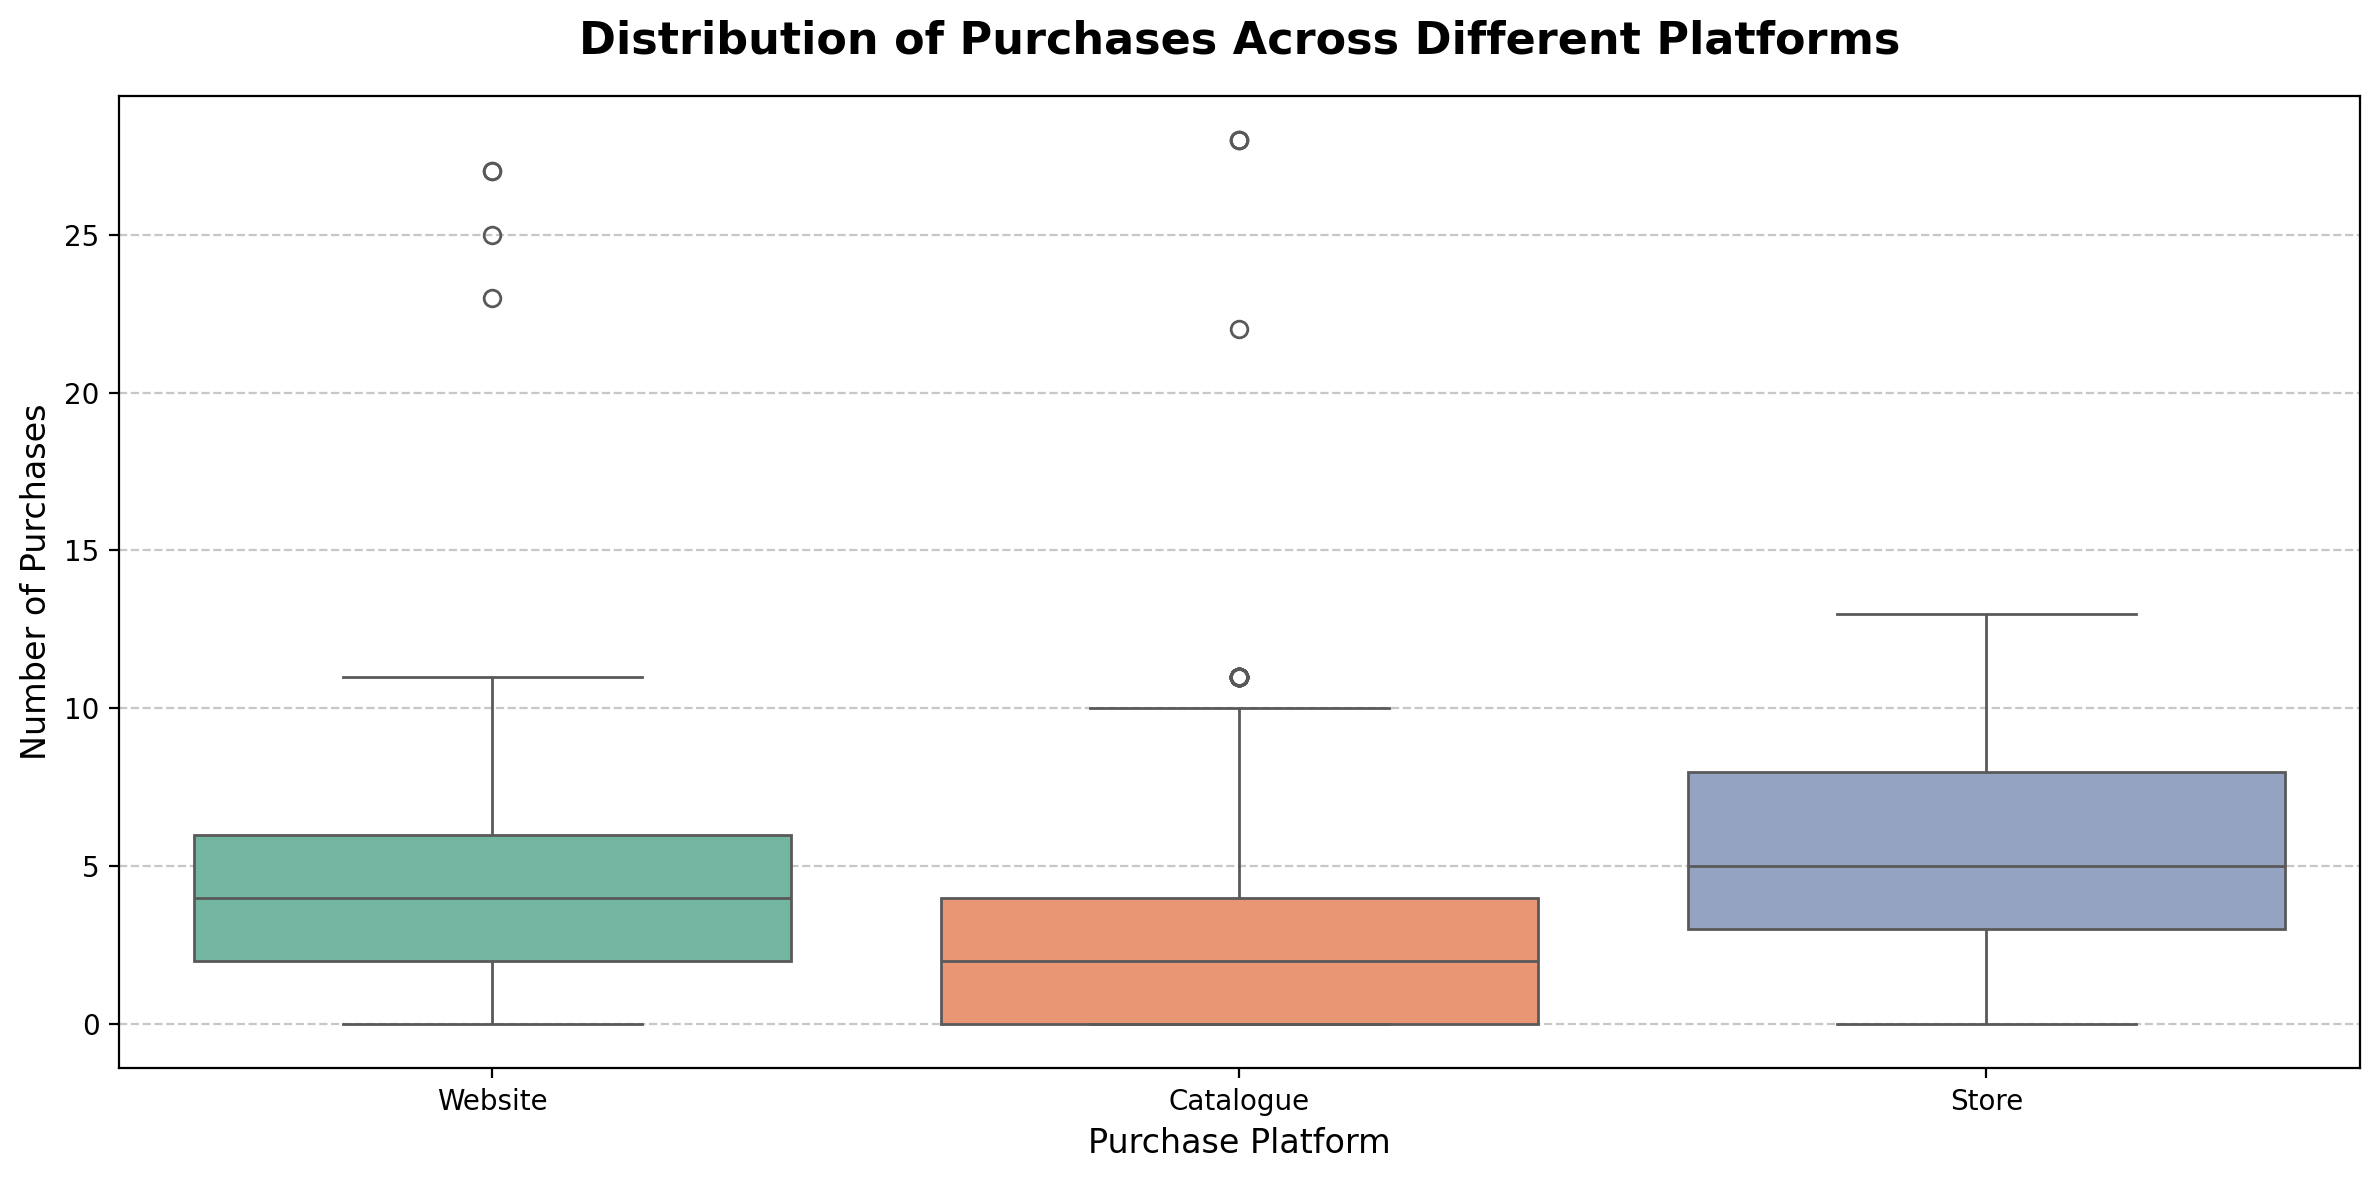

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(12,6), dpi=200)

# Create box plot
sns.boxplot(data=[
    df['NumWebPurchases'],
    df['NumCatalogPurchases'],
    df['NumStorePurchases']
], palette='Set2')

# Customize the plot
plt.title('Distribution of Purchases Across Different Platforms', fontsize=16, pad=15, fontweight='bold')
plt.xlabel('Purchase Platform', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks([0, 1, 2], ['Website', 'Catalogue', 'Store'])

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Distribution of Pruchases Across Different Platform (Box Plot)", dpi=300, bbox_inches='tight')
plt.show()


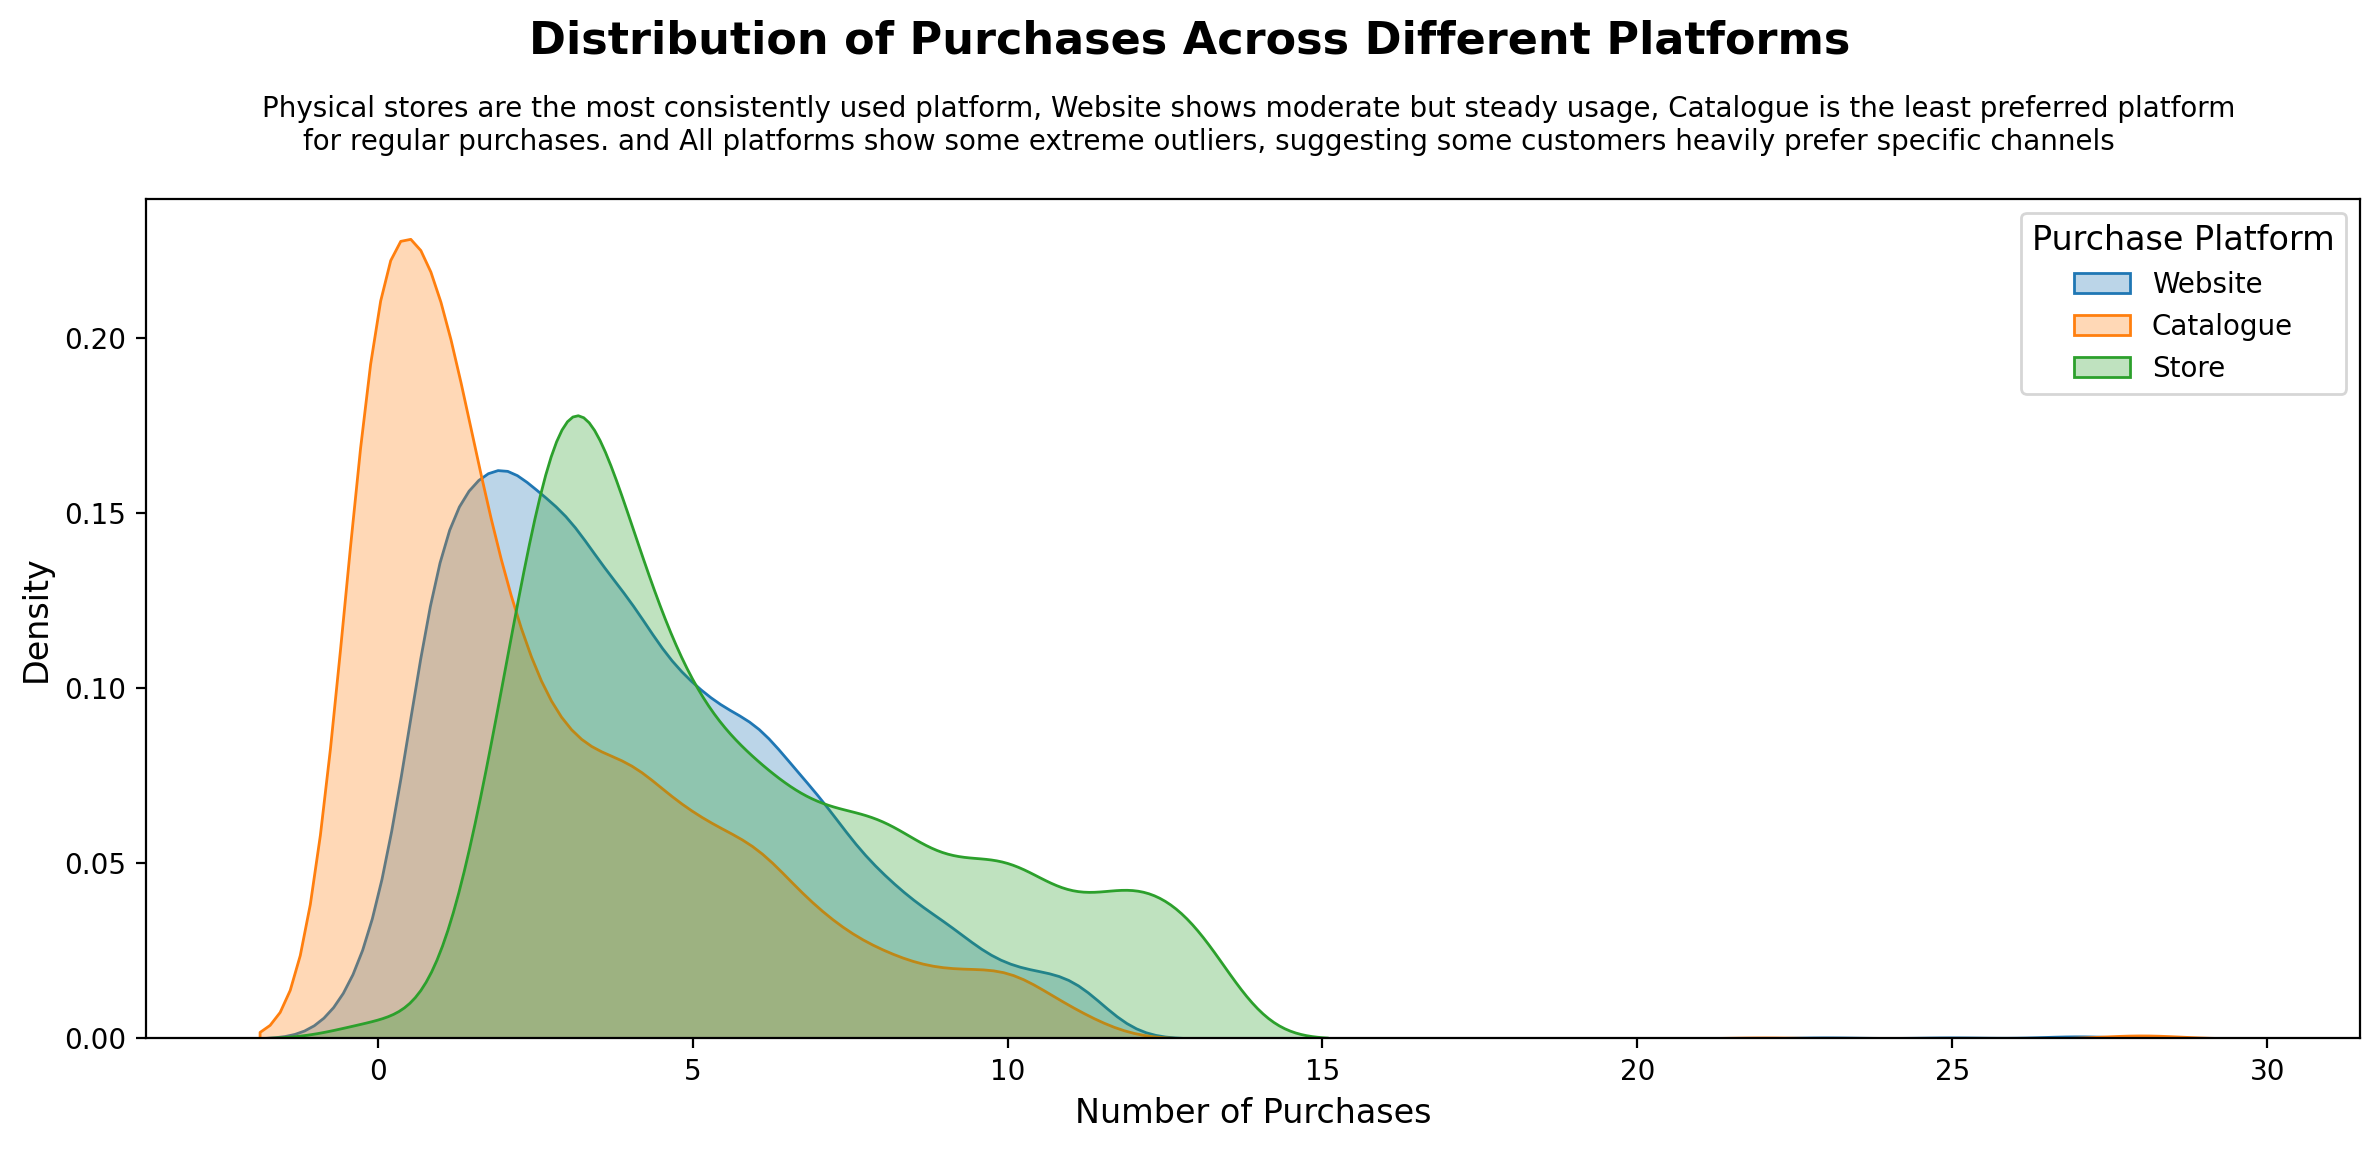

In [46]:
plt.figure(figsize=(12,6), dpi=200)

# Create KDE plot
sns.kdeplot(data=df['NumWebPurchases'], label='Website', fill=True, alpha=0.3)
sns.kdeplot(data=df['NumCatalogPurchases'], label='Catalogue', fill=True, alpha=0.3)
sns.kdeplot(data=df['NumStorePurchases'], label='Store', fill=True, alpha=0.3)

# Customize the plot
plt.suptitle('Distribution of Purchases Across Different Platforms', fontsize=16, fontweight='bold', y=0.95)
plt.title("""
Physical stores are the most consistently used platform, Website shows moderate but steady usage, Catalogue is the least preferred platform 
for regular purchases. and All platforms show some extreme outliers, suggesting some customers heavily prefer specific channels          
""", fontsize=10)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend(title='Purchase Platform', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.savefig("Distribution of Purchases Across Different Platforms (KDE Plot)", dpi=300, bbox_inches='tight')
plt.show()


# Multivariate Analysis

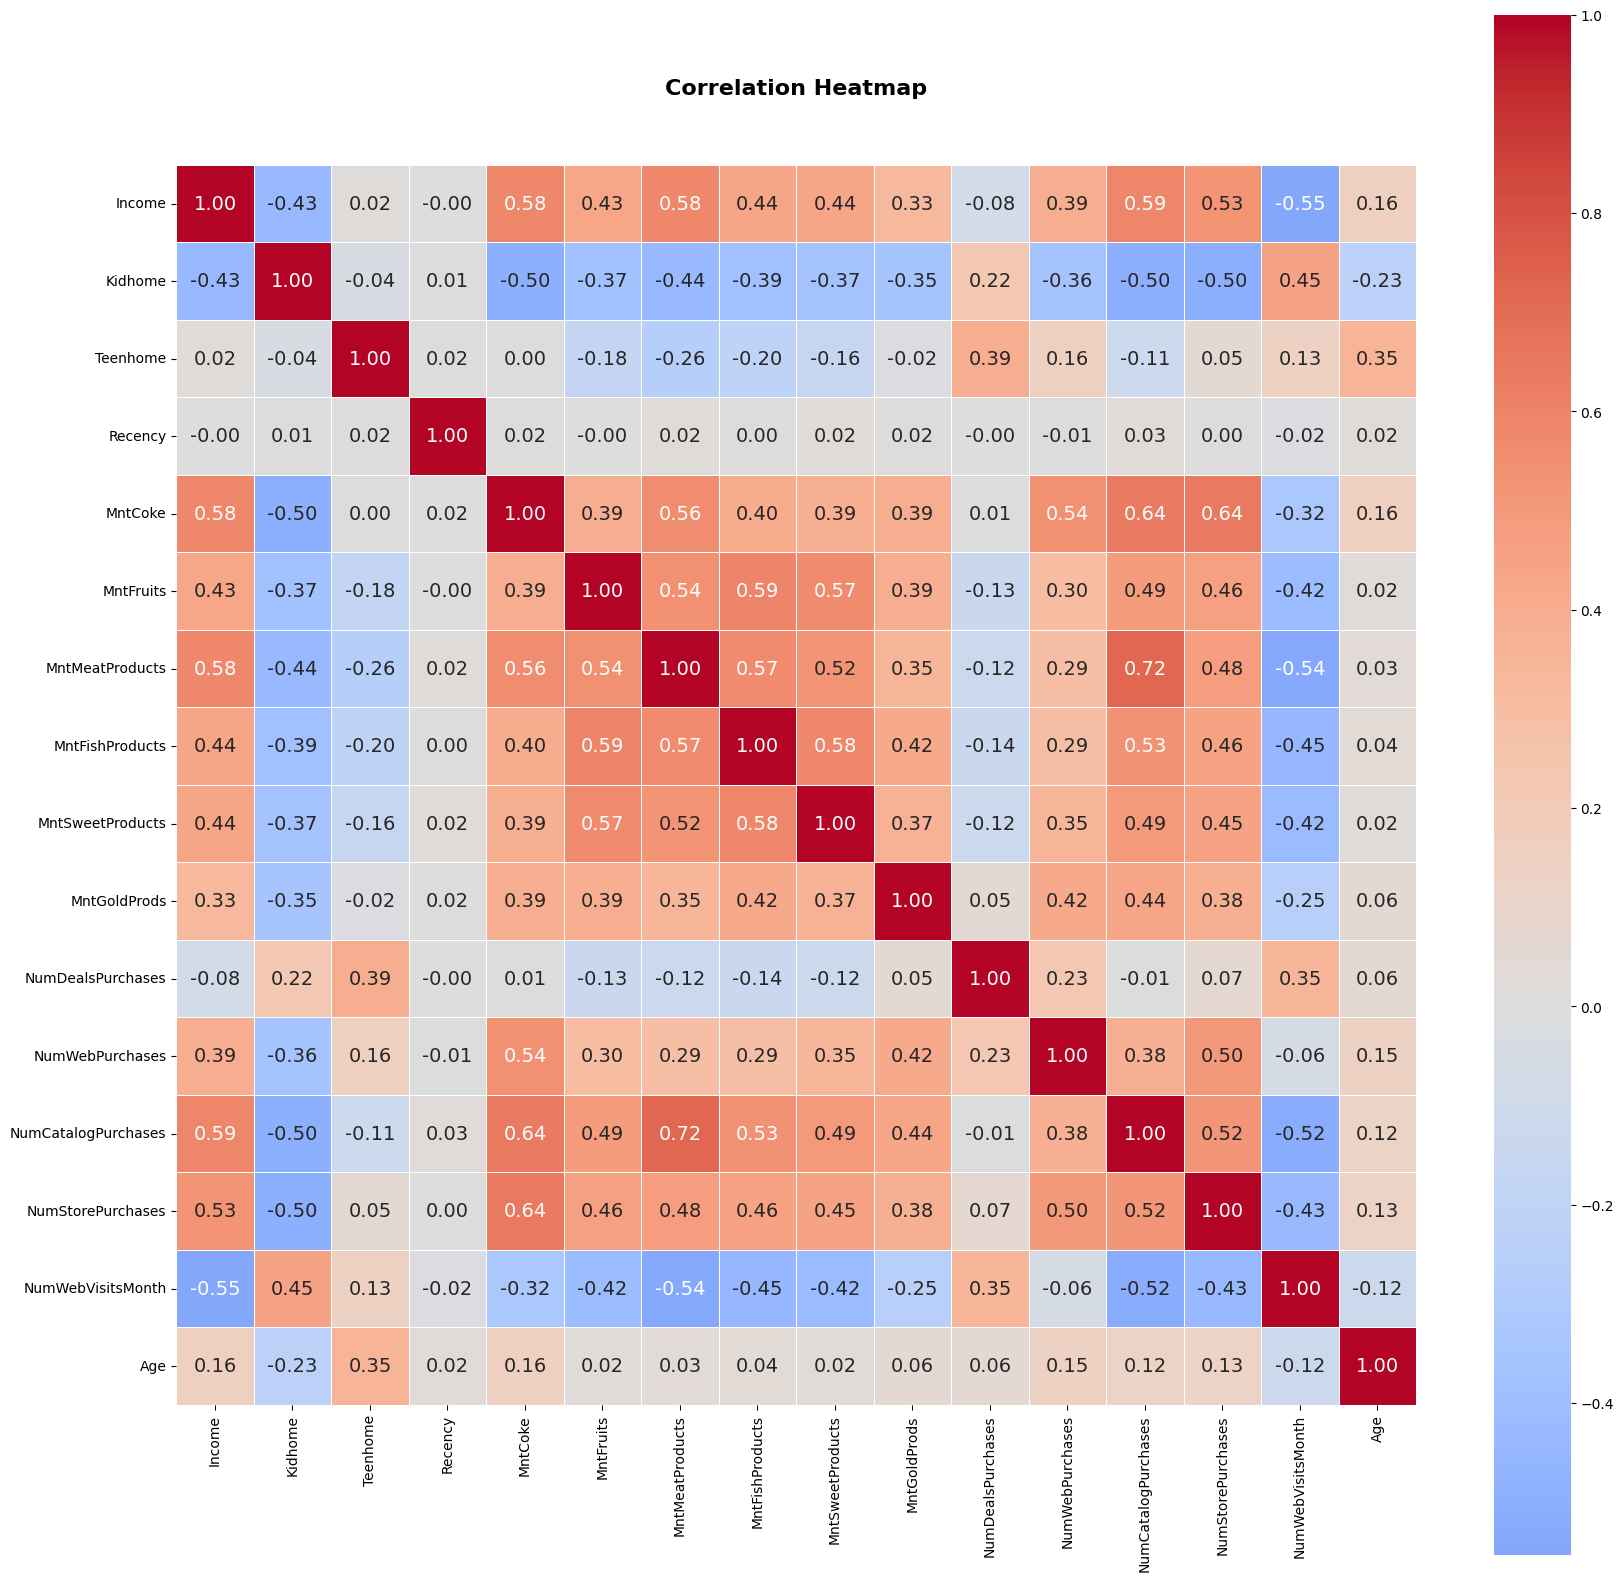


Pasangan fitur dengan korelasi tinggi (>0.7):
MntMeatProducts - NumCatalogPurchases: 0.72


In [47]:
numerical_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']
plt.figure(figsize=(20, 20))
correlation_matrix = df[numerical_cols].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=0.5, annot_kws={'size': 14},
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap', fontweight='bold', fontsize = 16, y=1.05)
#plt.tight_layout()
plt.savefig("Correlation Heatmap", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

threshold = 0.7
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x,y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nPasangan fitur dengan korelasi tinggi (>0.7):")
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.2f}")

**Findings:**

1. Income:
    - Positively correlated with spending on meat products (0.58), fish products (0.44), and gold products (0.39).
    - Negatively correlated with the number of kids at home (−0.43) and website visits (−0.55).

2. Kidhome and Teenhome:
    - Both show negative correlations with most spending categories, suggesting that households with more children tend to spend less on these items.

3. Spending Patterns:
    - Strong positive correlations exist among different spending categories, such as meat, fish, and sweet products, indicating that customers who spend more in one category tend to spend more in others.
    - Meat products have a particularly strong correlation with fish (0.57) and sweet products (0.58).

4. Purchasing Channels:
    - Catalogue purchases are positively correlated with income (0.59) and negatively correlated with the number of kids at home (−0.50).
    - Store purchases also correlate positively with income (0.53).

5. Website Visits:
    - Negatively correlated with income (−0.55) and catalogue purchases (−0.52), suggesting that higher-income individuals may prefer offline or catalogue hopping.

6. Age:
    - Shows a moderate positive correlation with income (0.16) and a slight negative correlation with the number of deals purchased (−0.12).

**Overall Insights:**
- Higher income tends to be associated with increased spending across various product categories and a preference for catalogue and store purchases.
- Households with more children tend to spend less across product categories and prefer fewer catalogue purchases.
- There is a notable preference for offline or catalogue shopping among higher-income individuals, while online activity is lower.
- Spending habits are interconnected across categories, indicating that targeting one category might influence others.